# Separate runs by HKLE due to size limits

# Positions rounded to 1,000

In [1]:
data="TCGA/focused.1000.T.csv.gz"

In [2]:
hkle='HERVK113'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [3]:
threshold=4   # 1

In [4]:
import numpy as np
np.__version__

'1.20.3'

In [5]:
import pandas as pd
pd.__version__

'1.2.4'

In [6]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [9]:
import scipy
scipy.__version__

'1.6.3'

In [10]:
from scipy import stats

In [11]:
import seaborn as sns
sns.__version__

'0.11.1'

In [12]:
from datetime import datetime

In [13]:
default_max_columns=pd.get_option('display.max_columns')

In [14]:
default_max_rows=pd.get_option('display.max_rows')

In [15]:
default_precision=pd.get_option('display.precision')

In [16]:
pd.set_option('display.precision', 2)

In [17]:
#default_threshold=np.get_printoptions()['threshold']

In [18]:
#np.set_printoptions(threshold=10000000)

# Read Metadata 1

In [19]:
mt1=pd.read_csv("TCGA/metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [20]:
mt1.shape

(127, 5)

In [21]:
mt1.rename(columns={"submitter": "subject"},inplace=True)
mt1.rename(columns={"gender": "gender1"},inplace=True)

In [22]:
mt1.head()

subject  days_to_death gender1             disease_type  \
0  02-2483            NaN    male  Glioblastoma Multiforme   
1  02-2485            NaN    male  Glioblastoma Multiforme   
2  06-0125         1448.0  female  Glioblastoma Multiforme   
3  06-0152          375.0    male  Glioblastoma Multiforme   
4  06-0157           97.0  female  Glioblastoma Multiforme   

                          center_name  
0  Broad Institute of MIT and Harvard  
1  Broad Institute of MIT and Harvard  
2  Broad Institute of MIT and Harvard  
3  Broad Institute of MIT and Harvard  
4  Broad Institute of MIT and Harvard

In [23]:
list(mt1)

['subject', 'days_to_death', 'gender1', 'disease_type', 'center_name']

# Read Metadata 2

In [24]:
mt2=pd.read_csv("TCGA/TCGA.Glioma.metadata.tsv",sep="\t")

In [25]:
mt2.shape

(1114, 18)

In [26]:
mt2.head()

case_submitter_id project_id primary_diagnosis   race  \
0      TCGA-02-0001   TCGA-GBM      Glioblastoma  white   
1      TCGA-02-0003   TCGA-GBM      Glioblastoma  white   
2      TCGA-02-0004   TCGA-GBM      Glioblastoma  white   
3      TCGA-02-0006   TCGA-GBM      Glioblastoma  white   
4      TCGA-02-0007   TCGA-GBM      Glioblastoma  white   

                ethnicity  gender RE_names IDH     x1p19q TERT  \
0  not hispanic or latino  female      NaN  WT  non-codel  NaN   
1  not hispanic or latino    male      NaN  WT  non-codel  NaN   
2  not hispanic or latino    male      NaN  WT        NaN  NaN   
3  not hispanic or latino  female      NaN  WT  non-codel  NaN   
4  not hispanic or latino  female      NaN  WT  non-codel  NaN   

         IDH_1p19q_status                           WHO_groups  \
0  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
1  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
2         IDH-WT:1p19q-NA                                  NaN   
3  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
4  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   

                     Triple_group     Tissue_sample_location          MGMT  \
0  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
1  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
2         IDH-WT:1p19q-NA:TERT-NA  MD Anderson Cancer Center           NaN   
3  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
4  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   

    Age  Survival_months  Vital_status  
0  44.0            11.76           1.0  
1  50.0             4.73           1.0  
2  59.0            11.33           1.0  
3  56.0            18.33           1.0  
4  40.0            23.16           1.0

In [27]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [28]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [29]:
mt2[['subject','case_submitter_id']].head()

subject case_submitter_id
0  02-0001      TCGA-02-0001
1  02-0003      TCGA-02-0003
2  02-0004      TCGA-02-0004
3  02-0006      TCGA-02-0006
4  02-0007      TCGA-02-0007

In [30]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [31]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

# Merge Metadata

In [32]:
#meta=mt2.merge(mt1,left_on='subject2',right_on='subject1',suffixes=["_mt2","_mt1"],how='inner')
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')

In [33]:
del mt1
del mt2

In [34]:
meta.head()

project_id primary_diagnosis                       race  \
0   TCGA-GBM      Glioblastoma                      asian   
1   TCGA-GBM      Glioblastoma  black or african american   
2   TCGA-GBM      Glioblastoma                      white   
3   TCGA-GBM      Glioblastoma                      white   
4   TCGA-GBM      Glioblastoma                      white   

                ethnicity gender2                   RE_names     IDH  \
0  not hispanic or latino    male  02-2483-01A-01R-1849-01+1  Mutant   
1  not hispanic or latino    male  02-2485-01A-01R-1849-01+1      WT   
2  not hispanic or latino  female  06-0125-01A-01R-1849-01+1      WT   
3  not hispanic or latino    male                        NaN      WT   
4  not hispanic or latino  female  06-0157-01A-01R-1849-01+1      WT   

      x1p19q    TERT            IDH_1p19q_status  ...  \
0  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...   
1  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   
2  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   
3  non-codel     NaN      IDH-WT:1p19q-non-codel  ...   
4  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   

      Tissue_sample_location          MGMT   Age Survival_months  \
0  MD Anderson Cancer Center    Methylated  43.0           15.31   
1  MD Anderson Cancer Center  Unmethylated  53.0           15.44   
2        Henry Ford Hospital    Methylated  63.0           47.57   
3        Henry Ford Hospital           NaN  68.0           12.32   
4        Henry Ford Hospital           NaN  63.0            3.19   

   Vital_status  subject  days_to_death gender1             disease_type  \
0           0.0  02-2483            NaN    male  Glioblastoma Multiforme   
1           0.0  02-2485            NaN    male  Glioblastoma Multiforme   
2           1.0  06-0125         1448.0  female  Glioblastoma Multiforme   
3           1.0  06-0152          375.0    male  Glioblastoma Multiforme   
4           1.0  06-0157           97.0  female  Glioblastoma Multiforme   

                          center_name  
0  Broad Institute of MIT and Harvard  
1  Broad Institute of MIT and Harvard  
2  Broad Institute of MIT and Harvard  
3  Broad Institute of MIT and Harvard  
4  Broad Institute of MIT and Harvard  

[5 rows x 22 columns]

In [35]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [36]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [37]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name'],
      dtype='object')

In [38]:
meta['primary_diagnosis'].value_counts()

Glioblastoma                     35
Oligodendroglioma, NOS           33
Astrocytoma, anaplastic          24
Mixed glioma                     16
Astrocytoma, NOS                  9
Oligodendroglioma, anaplastic     8
Name: primary_diagnosis, dtype: int64

In [39]:
meta['TERT'].value_counts()

Mutant    68
WT        54
Name: TERT, dtype: int64

In [40]:
meta['IDH'].value_counts()

Mutant    74
WT        50
Name: IDH, dtype: int64

In [41]:
meta['x1p19q'].value_counts()

non-codel    102
codel         23
Name: x1p19q, dtype: int64

In [42]:
meta['disease_type'].value_counts()

Brain Lower Grade Glioma    90
Glioblastoma Multiforme     35
Name: disease_type, dtype: int64

In [43]:
meta['gender1'].value_counts()

male      72
female    53
Name: gender1, dtype: int64

In [44]:
meta['race'].value_counts()

white                        114
black or african american      7
not reported                   3
asian                          1
Name: race, dtype: int64

In [45]:
meta['ethnicity'].value_counts()

not hispanic or latino    108
not reported               11
hispanic or latino          6
Name: ethnicity, dtype: int64

In [46]:
meta['IDH_1p19q_status'].value_counts()

IDH-Mutant:1p19q-non-codel    51
IDH-WT:1p19q-non-codel        50
IDH-Mutant:1p19q-codel        23
IDH-NA:1p19q-non-codel         1
Name: IDH_1p19q_status, dtype: int64

In [47]:
meta['WHO_groups'].value_counts()

glioblastoma:IDH-WT:1p19q-non-codel             29
oligodendroglioma:IDH-Mutant:1p19q-codel        23
astrocytoma:IDH-Mutant:1p19q-non-codel          18
oligodendroglioma:IDH-Mutant:1p19q-non-codel    13
astrocytoma:IDH-WT:1p19q-non-codel              13
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     11
glioblastoma:IDH-Mutant:1p19q-non-codel          5
oligodendroglioma:IDH-WT:1p19q-non-codel         4
oligoastrocytoma:IDH-WT:1p19q-non-codel          4
Name: WHO_groups, dtype: int64

In [48]:
meta['Triple_group'].value_counts()

IDH-Mutant:1p19q-non-codel:TERT-WT        49
IDH-WT:1p19q-non-codel:TERT-Mutant        44
IDH-Mutant:1p19q-codel:TERT-Mutant        22
IDH-WT:1p19q-non-codel:TERT-WT             4
IDH-WT:1p19q-non-codel:TERT-NA             2
IDH-Mutant:1p19q-non-codel:TERT-Mutant     1
IDH-Mutant:1p19q-non-codel:TERT-NA         1
IDH-NA:1p19q-non-codel:TERT-Mutant         1
IDH-Mutant:1p19q-codel:TERT-WT             1
Name: Triple_group, dtype: int64

In [49]:
meta['MGMT'].value_counts()

Methylated      87
Unmethylated    27
Name: MGMT, dtype: int64

In [50]:
meta['center_name'].value_counts()

Broad Institute of MIT and Harvard    75
Harvard Medical School                50
Name: center_name, dtype: int64

## We need a multi-level index to merge with df later so adding an empty index level

In [51]:
meta.columns=[meta.columns,[''] * len(meta.columns)]

In [52]:
#meta.columns.names=['chromosome','position']

In [53]:
meta.columns

MultiIndex([(            'project_id', ''),
            (     'primary_diagnosis', ''),
            (                  'race', ''),
            (             'ethnicity', ''),
            (               'gender2', ''),
            (              'RE_names', ''),
            (                   'IDH', ''),
            (                'x1p19q', ''),
            (                  'TERT', ''),
            (      'IDH_1p19q_status', ''),
            (            'WHO_groups', ''),
            (          'Triple_group', ''),
            ('Tissue_sample_location', ''),
            (                  'MGMT', ''),
            (                   'Age', ''),
            (       'Survival_months', ''),
            (          'Vital_status', ''),
            (               'subject', ''),
            (         'days_to_death', ''),
            (               'gender1', ''),
            (          'disease_type', ''),
            (           'center_name', '')],
           )

# Read raw data and cleanup

In [54]:
#df=pd.read_csv("focused.csv.gz",header=[0,1,2,3],index_col=[0,1])
#df.columns.names=['sample','pup','hkle','q']
#df=df.T
df=pd.read_csv(data,header=[0,1],index_col=[0,1,2,3])

df.reset_index(inplace=True)
df.head()


chromosome       sample     pup      hkle mapq    chr1                  \
position                                       1048000 1190000 1308000   
0           02-2483-01A  paired  HERVK113  Q20       0       0       0   
1           02-2483-01A  paired     SVA_A  Q20       0       0       0   
2           02-2483-01A  paired     SVA_B  Q20       0       0       0   
3           02-2483-01A  paired     SVA_C  Q20       0       0       0   
4           02-2483-01A  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1409000 1410000 1580000  ... 19535000 19536000 19699000 19700000   
0                4       1       4  ...        0        0        2        0   
1                0       0       0  ...        0        0        0        0   
2                0       0       0  ...        0        0        0        0   
3                0       0       0  ...        0        0        0        0   
4                0       0       0  ...        0        0        0        0   

chromosome                                                        
position   20552000 20553000 20976000 21047000 21217000 21639000  
0                 0        0        0        0        0        0  
1                 0        0        0        0        0        0  
2                 0        0        0        0        0        0  
3                 0        0        0        0        0        0  
4                 0        0        0        0        0        0  

[5 rows x 17413 columns]

In [55]:
df['subject']=df['sample'].str[0:7]
df['subject']

0       02-2483
1       02-2483
2       02-2483
3       02-2483
4       02-2483
         ...   
1913    TQ-A8XE
1914    TQ-A8XE
1915    TQ-A8XE
1916    TQ-A8XE
1917    TQ-A8XE
Name: subject, Length: 1918, dtype: object

In [56]:
df.columns

MultiIndex([( 'sample',         ''),
            (    'pup',         ''),
            (   'hkle',         ''),
            (   'mapq',         ''),
            (   'chr1',  '1048000'),
            (   'chr1',  '1190000'),
            (   'chr1',  '1308000'),
            (   'chr1',  '1409000'),
            (   'chr1',  '1410000'),
            (   'chr1',  '1580000'),
            ...
            (   'chrY', '19536000'),
            (   'chrY', '19699000'),
            (   'chrY', '19700000'),
            (   'chrY', '20552000'),
            (   'chrY', '20553000'),
            (   'chrY', '20976000'),
            (   'chrY', '21047000'),
            (   'chrY', '21217000'),
            (   'chrY', '21639000'),
            ('subject',         '')],
           names=['chromosome', 'position'], length=17414)

In [57]:
df.head()

chromosome       sample     pup      hkle mapq    chr1                  \
position                                       1048000 1190000 1308000   
0           02-2483-01A  paired  HERVK113  Q20       0       0       0   
1           02-2483-01A  paired     SVA_A  Q20       0       0       0   
2           02-2483-01A  paired     SVA_B  Q20       0       0       0   
3           02-2483-01A  paired     SVA_C  Q20       0       0       0   
4           02-2483-01A  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1409000 1410000 1580000  ... 19536000 19699000 19700000 20552000   
0                4       1       4  ...        0        2        0        0   
1                0       0       0  ...        0        0        0        0   
2                0       0       0  ...        0        0        0        0   
3                0       0       0  ...        0        0        0        0   
4                0       0       0  ...        0        0        0        0   

chromosome                                               subject  
position   20553000 20976000 21047000 21217000 21639000           
0                 0        0        0        0        0  02-2483  
1                 0        0        0        0        0  02-2483  
2                 0        0        0        0        0  02-2483  
3                 0        0        0        0        0  02-2483  
4                 0        0        0        0        0  02-2483  

[5 rows x 17414 columns]

In [58]:
df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)

In [59]:
df.head()

chromosome                                  chr1                          \
position                                 1048000 1190000 1308000 1409000   
subject sample      pup    hkle     mapq                                   
02-2483 02-2483-01A paired HERVK113 Q20        0       0       0       4   
                           SVA_A    Q20        0       0       0       0   
                           SVA_B    Q20        0       0       0       0   
                           SVA_C    Q20        0       0       0       0   
                           SVA_D    Q20        0       0       0       0   

chromosome                                                                \
position                                 1410000 1580000 1581000 2211000   
subject sample      pup    hkle     mapq                                   
02-2483 02-2483-01A paired HERVK113 Q20        1       4       0       0   
                           SVA_A    Q20        0       0       0       0   
                           SVA_B    Q20        0       0       0       0   
                           SVA_C    Q20        0       0       0       0   
                           SVA_D    Q20        0       0       0       0   

chromosome                                                ...     chrY  \
position                                 2513000 2581000  ... 19535000   
subject sample      pup    hkle     mapq                  ...            
02-2483 02-2483-01A paired HERVK113 Q20        0       0  ...        0   
                           SVA_A    Q20        0       0  ...        0   
                           SVA_B    Q20        0       0  ...        0   
                           SVA_C    Q20        0       0  ...        0   
                           SVA_D    Q20        0       0  ...        0   

chromosome                                                                    \
position                                 19536000 19699000 19700000 20552000   
subject sample      pup    hkle     mapq                                       
02-2483 02-2483-01A paired HERVK113 Q20         0        2        0        0   
                           SVA_A    Q20         0        0        0        0   
                           SVA_B    Q20         0        0        0        0   
                           SVA_C    Q20         0        0        0        0   
                           SVA_D    Q20         0        0        0        0   

chromosome                                                                    \
position                                 20553000 20976000 21047000 21217000   
subject sample      pup    hkle     mapq                                       
02-2483 02-2483-01A paired HERVK113 Q20         0        0        0        0   
                           SVA_A    Q20         0        0        0        0   
                           SVA_B    Q20         0        0        0        0   
                           SVA_C    Q20         0        0        0        0   
                           SVA_D    Q20         0        0        0        0   

chromosome                                         
position                                 21639000  
subject sample      pup    hkle     mapq           
02-2483 02-2483-01A paired HERVK113 Q20         0  
                           SVA_A    Q20         0  
                           SVA_B    Q20         0  
                           SVA_C    Q20         0  
                           SVA_D    Q20         0  

[5 rows x 17409 columns]

In [60]:
df.shape

(1918, 17409)

## Remove "pup" and "q" as they are useless in this dataset.

In [61]:
df=df.droplevel('pup',axis='index').droplevel('mapq',axis='index')

In [62]:
df.head()

chromosome                      chr1                                          \
position                     1048000 1190000 1308000 1409000 1410000 1580000   
subject sample      hkle                                                       
02-2483 02-2483-01A HERVK113       0       0       0       4       1       4   
                    SVA_A          0       0       0       0       0       0   
                    SVA_B          0       0       0       0       0       0   
                    SVA_C          0       0       0       0       0       0   
                    SVA_D          0       0       0       0       0       0   

chromosome                                                    ...     chrY  \
position                     1581000 2211000 2513000 2581000  ... 19535000   
subject sample      hkle                                      ...            
02-2483 02-2483-01A HERVK113       0       0       0       0  ...        0   
                    SVA_A          0       0       0       0  ...        0   
                    SVA_B          0       0       0       0  ...        0   
                    SVA_C          0       0       0       0  ...        0   
                    SVA_D          0       0       0       0  ...        0   

chromosome                                                                 \
position                     19536000 19699000 19700000 20552000 20553000   
subject sample      hkle                                                    
02-2483 02-2483-01A HERVK113        0        2        0        0        0   
                    SVA_A           0        0        0        0        0   
                    SVA_B           0        0        0        0        0   
                    SVA_C           0        0        0        0        0   
                    SVA_D           0        0        0        0        0   

chromosome                                                        
position                     20976000 21047000 21217000 21639000  
subject sample      hkle                                          
02-2483 02-2483-01A HERVK113        0        0        0        0  
                    SVA_A           0        0        0        0  
                    SVA_B           0        0        0        0  
                    SVA_C           0        0        0        0  
                    SVA_D           0        0        0        0  

[5 rows x 17409 columns]

In [63]:
df.shape

(1918, 17409)

## Drop recurrent tumor (-02?)

In [64]:
df.loc[df.index.get_level_values('sample').str.contains("-02.$")].index

MultiIndex([('06-0125', '06-0125-02A', 'HERVK113'),
            ('06-0125', '06-0125-02A',    'SVA_A'),
            ('06-0125', '06-0125-02A',    'SVA_B'),
            ('06-0125', '06-0125-02A',    'SVA_C'),
            ('06-0125', '06-0125-02A',    'SVA_D'),
            ('06-0125', '06-0125-02A',    'SVA_E'),
            ('06-0125', '06-0125-02A',    'SVA_F'),
            ('06-0152', '06-0152-02A', 'HERVK113'),
            ('06-0152', '06-0152-02A',    'SVA_A'),
            ('06-0152', '06-0152-02A',    'SVA_B'),
            ...
            ('TQ-A7RV', 'TQ-A7RV-02A',    'SVA_D'),
            ('TQ-A7RV', 'TQ-A7RV-02A',    'SVA_E'),
            ('TQ-A7RV', 'TQ-A7RV-02A',    'SVA_F'),
            ('TQ-A8XE', 'TQ-A8XE-02A', 'HERVK113'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_A'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_B'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_C'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_D'),
            ('TQ-A8XE', 'TQ-A8XE-02A',    'SVA_E

In [65]:
df.drop(df.loc[df.index.get_level_values('sample').str.contains("-02.$")].index,axis='index',inplace=True)

In [66]:
df.loc[df.index.get_level_values('sample').str.contains("-02.$")].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

## Drop solid normal (-11?) (I've seen a couple)

In [67]:
df.loc[df.index.get_level_values('sample').str.contains("-11.$")].index

MultiIndex([('FG-5963', 'FG-5963-11A', 'HERVK113'),
            ('FG-5963', 'FG-5963-11A',    'SVA_A'),
            ('FG-5963', 'FG-5963-11A',    'SVA_B'),
            ('FG-5963', 'FG-5963-11A',    'SVA_C'),
            ('FG-5963', 'FG-5963-11A',    'SVA_D'),
            ('FG-5963', 'FG-5963-11A',    'SVA_E'),
            ('FG-5963', 'FG-5963-11A',    'SVA_F')],
           names=['subject', 'sample', 'hkle'])

In [68]:
df.drop(df.loc[df.index.get_level_values('sample').str.contains("-11.$")].index,axis='index',inplace=True)

In [69]:
df.loc[df.index.get_level_values('sample').str.contains("-11.$")].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

## Drop solitary tumor / normal ( not sure how to do this programmatically )

* FG-5963-01A
* CS-5390-10A

In [70]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([('FG-5963', 'FG-5963-01A', 'HERVK113'),
            ('FG-5963', 'FG-5963-01A',    'SVA_A'),
            ('FG-5963', 'FG-5963-01A',    'SVA_B'),
            ('FG-5963', 'FG-5963-01A',    'SVA_C'),
            ('FG-5963', 'FG-5963-01A',    'SVA_D'),
            ('FG-5963', 'FG-5963-01A',    'SVA_E'),
            ('FG-5963', 'FG-5963-01A',    'SVA_F')],
           names=['subject', 'sample', 'hkle'])

In [71]:
df.drop(df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index,axis='index',inplace=True)

In [72]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

In [73]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([('CS-5390', 'CS-5390-10A', 'HERVK113'),
            ('CS-5390', 'CS-5390-10A',    'SVA_A'),
            ('CS-5390', 'CS-5390-10A',    'SVA_B'),
            ('CS-5390', 'CS-5390-10A',    'SVA_C'),
            ('CS-5390', 'CS-5390-10A',    'SVA_D'),
            ('CS-5390', 'CS-5390-10A',    'SVA_E'),
            ('CS-5390', 'CS-5390-10A',    'SVA_F')],
           names=['subject', 'sample', 'hkle'])

In [74]:
df.drop(df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index,axis='index',inplace=True)

In [75]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

# Match earlier HERVK113 notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

In [76]:
df[df[df.columns]>0].count(axis='columns')['CS-6186','CS-6186-01A']

hkle
HERVK113    1100
SVA_A       2224
SVA_B       2141
SVA_C       2174
SVA_D       2200
SVA_E       2159
SVA_F       1784
dtype: int64

In [77]:
df[df[df.columns]>0].count(axis='columns')['CS-6186','CS-6186-10A']

hkle
HERVK113     950
SVA_A       1962
SVA_B       1839
SVA_C       1845
SVA_D       1868
SVA_E       1827
SVA_F       1512
dtype: int64

In [78]:
df[df[df.columns]>0].count(axis='columns')['DU-5872','DU-5872-01A']

hkle
HERVK113    1108
SVA_A       2744
SVA_B       2640
SVA_C       2625
SVA_D       2644
SVA_E       2614
SVA_F       2285
dtype: int64

In [79]:
df[df[df.columns]>0].count(axis='columns')['DU-5872','DU-5872-10A']

hkle
HERVK113     776
SVA_A       2008
SVA_B       1904
SVA_C       1908
SVA_D       1926
SVA_E       1884
SVA_F       1547
dtype: int64

## Keep only Broad and drop Harvard Medical School

### Harvard's samples were really low coverage?

In [80]:
meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique()


array(['02-2483', '02-2485', '06-0125', '06-0152', '06-0157', '06-0171',
       '06-0190', '06-0210', '06-0211', '06-0214', '06-0221', '06-0686',
       '06-0744', '06-0745', '06-2557', '06-2570', '06-5411', '06-5415',
       '14-1034', '14-1402', '14-1823', '14-2554', '15-1444', '19-1389',
       '19-2620', '19-2624', '19-2629', '19-5960', '26-5132', '26-5135',
       '27-1831', '27-2523', '27-2528', '32-1970', '41-5651', 'CS-5390',
       'CS-5395', 'CS-6186', 'CS-6665', 'CS-6668', 'CS-6669', 'DB-5278',
       'DH-A669', 'DU-5870', 'DU-5872', 'DU-5874', 'DU-6397', 'DU-6401',
       'DU-6404', 'DU-6407', 'DU-7009', 'DU-7013', 'DU-7301', 'DU-7304',
       'E1-5318', 'E1-5319', 'EZ-7264', 'FG-5964', 'FG-5965', 'FG-7643',
       'FG-8182', 'FG-A4MT', 'HT-7602', 'HT-7689', 'HT-7695', 'HT-8104',
       'HT-A5R7', 'HT-A61B', 'HW-7486', 'HW-7487', 'IK-7675', 'TM-A7CF',
       'TQ-A7RK', 'TQ-A7RV', 'TQ-A8XE'], dtype=object)

In [81]:
df.index.get_level_values('subject')


Index(['02-2483', '02-2483', '02-2483', '02-2483', '02-2483', '02-2483',
       '02-2483', '02-2483', '02-2483', '02-2483',
       ...
       'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE',
       'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE', 'TQ-A8XE'],
      dtype='object', name='subject', length=1708)

In [82]:
df.index.get_level_values('subject').isin(
    meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())


array([ True,  True,  True, ...,  True,  True,  True])

In [83]:
df=df[df.index.get_level_values('subject').isin(
    meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())]
df.head()


chromosome                      chr1                                          \
position                     1048000 1190000 1308000 1409000 1410000 1580000   
subject sample      hkle                                                       
02-2483 02-2483-01A HERVK113       0       0       0       4       1       4   
                    SVA_A          0       0       0       0       0       0   
                    SVA_B          0       0       0       0       0       0   
                    SVA_C          0       0       0       0       0       0   
                    SVA_D          0       0       0       0       0       0   

chromosome                                                    ...     chrY  \
position                     1581000 2211000 2513000 2581000  ... 19535000   
subject sample      hkle                                      ...            
02-2483 02-2483-01A HERVK113       0       0       0       0  ...        0   
                    SVA_A          0       0       0       0  ...        0   
                    SVA_B          0       0       0       0  ...        0   
                    SVA_C          0       0       0       0  ...        0   
                    SVA_D          0       0       0       0  ...        0   

chromosome                                                                 \
position                     19536000 19699000 19700000 20552000 20553000   
subject sample      hkle                                                    
02-2483 02-2483-01A HERVK113        0        2        0        0        0   
                    SVA_A           0        0        0        0        0   
                    SVA_B           0        0        0        0        0   
                    SVA_C           0        0        0        0        0   
                    SVA_D           0        0        0        0        0   

chromosome                                                        
position                     20976000 21047000 21217000 21639000  
subject sample      hkle                                          
02-2483 02-2483-01A HERVK113        0        0        0        0  
                    SVA_A           0        0        0        0  
                    SVA_B           0        0        0        0  
                    SVA_C           0        0        0        0  
                    SVA_D           0        0        0        0  

[5 rows x 17409 columns]

In [84]:
df.shape

(1022, 17409)

## Search for the presence of HKLE insertions with positions unique to tumor or normal

### Copy raw dataframe, remove sample level and clear out the values

compdf2=df.copy()
compdf2.drop(compdf2.loc[compdf2.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)
compdf2=compdf2.droplevel('sample',axis='index')
compdf2.loc[:,:] = 0
compdf2.head(10)

## Ok. This is some dark magic I think. Gotta be a better, cleaner way to do this.

* Loop over the subjects and hkles. (Loops aren't really pythony.)
* Do an "XOR-AND" for the first (tumor 01) and second (normal 10) samples.
* This returns a Boolean mask
* Change it to 0/1
* Subtract the tumor array from the normal array and assign it to the subject/hkle

### This will create a dataframe of positions representing "tumor - normal" so with values of only

* -1 : normal only
*  0 : both or neither
* +1 : tumor only


for subject in df.index.get_level_values('subject').unique():
    for hkle in df.index.get_level_values('hkle').unique():
        tm=(((  df.loc[subject,:,hkle].iloc[0]>0)^(
                df.loc[subject,:,hkle].iloc[1]>0))&(
                df.loc[subject,:,hkle].iloc[0]>0))
        tm.replace([False,True],[0,1],inplace=True)
        nm=(((  df.loc[subject,:,hkle].iloc[0]>0)^(
                df.loc[subject,:,hkle].iloc[1]>0))&(
                df.loc[subject,:,hkle].iloc[1]>0))
        nm.replace([False,True],[0,1],inplace=True)
        compdf2.loc[subject,hkle]=tm.values-nm.values

compdf.equals(compdf2)

# New technique. Separate the tumor and normal counts.
### Remove the sample column
### DO NOT RESHAPE

In [85]:
n=df.copy()    # NORMAL
t=df.copy()    # TUMOR

In [86]:
n.drop(n.loc[n.index.get_level_values('sample').str.contains("-01.$")].index,axis='index',inplace=True)
t.drop(t.loc[t.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)

In [87]:
n=n.droplevel('sample',axis='index')
t=t.droplevel('sample',axis='index')

In [88]:
n.head()

chromosome          chr1                                                  \
position         1048000 1190000 1308000 1409000 1410000 1580000 1581000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       2       3       3       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2211000 2513000 2581000  ... 19535000 19536000 19699000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        1   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19700000 20552000 20553000 20976000 21047000 21217000   
subject hkle                                                             
02-2483 HERVK113        1        0        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   

chromosome                 
position         21639000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  

[5 rows x 17409 columns]

In [89]:
t.head()

chromosome          chr1                                                  \
position         1048000 1190000 1308000 1409000 1410000 1580000 1581000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       4       1       4       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2211000 2513000 2581000  ... 19535000 19536000 19699000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        2   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19700000 20552000 20553000 20976000 21047000 21217000   
subject hkle                                                             
02-2483 HERVK113        0        0        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   

chromosome                 
position         21639000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  

[5 rows x 17409 columns]

In [90]:
n_index=n.index
t_index=t.index

### Compare the indexes. An empty array shows that the indexes are the same. Yay.

In [91]:
n_index[n_index != t_index]

MultiIndex([], names=['subject', 'hkle'])

In [92]:
#ngtet=(n>=threshold)
#tgtet=(t>=threshold)
#
#compdf=((((ngtet)^(tgtet))&(tgtet)).replace([False,True],[0,1]) - 
#        (((ngtet)^(tgtet))&(ngtet)).replace([False,True],[0,1]))

# Tumor only. Could have filtered earlier but here is good too.

In [93]:
#compdf=(t>=threshold).replace([False,True],[0,1])

# Normal only. Could have filtered earlier but here is good too.

In [94]:
compdf=(n>=threshold).replace([False,True],[0,1])

In [95]:
compdf

chromosome          chr1                                                  \
position         1048000 1190000 1308000 1409000 1410000 1580000 1581000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       0       0       0       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   
...                  ...     ...     ...     ...     ...     ...     ...   
TQ-A8XE SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   
        SVA_E          0       0       0       0       0       0       0   
        SVA_F          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2211000 2513000 2581000  ... 19535000 19536000 19699000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        0   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   
...                  ...     ...     ...  ...      ...      ...      ...   
TQ-A8XE SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   
        SVA_E          0       0       0  ...        0        0        0   
        SVA_F          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19700000 20552000 20553000 20976000 21047000 21217000   
subject hkle                                                             
02-2483 HERVK113        0        0        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
TQ-A8XE SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
        SVA_E           0        0        0        0        0        0   
        SVA_F           0        0        0        0        0        0   

chromosome                 
position         21639000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  
...                   ...  
TQ-A8XE SVA_B           0  
        SVA_C           0  
        SVA_D           0  
        SVA_E           0  
        SVA_F           0  

[511 rows x 17409 columns]

This is cleaner, faster and more pythonic than what follows for compdf.


In [96]:
compdf.head()

chromosome          chr1                                                  \
position         1048000 1190000 1308000 1409000 1410000 1580000 1581000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       0       0       0       0   
        SVA_A          0       0       0       0       0       0       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   

chromosome                                ...     chrY                    \
position         2211000 2513000 2581000  ... 19535000 19536000 19699000   
subject hkle                              ...                              
02-2483 HERVK113       0       0       0  ...        0        0        0   
        SVA_A          0       0       0  ...        0        0        0   
        SVA_B          0       0       0  ...        0        0        0   
        SVA_C          0       0       0  ...        0        0        0   
        SVA_D          0       0       0  ...        0        0        0   

chromosome                                                              \
position         19700000 20552000 20553000 20976000 21047000 21217000   
subject hkle                                                             
02-2483 HERVK113        0        0        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   

chromosome                 
position         21639000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  

[5 rows x 17409 columns]

In [97]:
compdf.shape

(511, 17409)

### Keep only positions with any sample with something other than 0

### We lose over 3000 positions

In [98]:
compdf=compdf.loc[:, (compdf != 0).any(axis=0)]

In [99]:
compdf.shape

(511, 3748)

In [100]:
compdf

chromosome          chr1                                                  \
position         1409000 1410000 1580000 1581000 6306000 6716000 7600000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       0       0       0       0   
        SVA_A          0       0       0       0       0       1       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   
...                  ...     ...     ...     ...     ...     ...     ...   
TQ-A8XE SVA_B          0       0       0       0       1       1       0   
        SVA_C          0       0       0       0       1       1       0   
        SVA_D          0       0       0       0       1       1       0   
        SVA_E          0       0       0       0       1       1       0   
        SVA_F          0       0       0       0       0       0       0   

chromosome                                ...    chrY                  \
position         7601000 7952000 8912000  ... 6749000 7179000 7180000   
subject hkle                              ...                           
02-2483 HERVK113       0       0       0  ...       0       0       0   
        SVA_A          0       0       0  ...       0       0       0   
        SVA_B          0       0       0  ...       0       0       1   
        SVA_C          0       0       0  ...       0       0       0   
        SVA_D          0       0       0  ...       0       0       0   
...                  ...     ...     ...  ...     ...     ...     ...   
TQ-A8XE SVA_B          0       0       0  ...       0       0       0   
        SVA_C          0       0       0  ...       0       0       0   
        SVA_D          0       0       0  ...       0       0       0   
        SVA_E          0       0       0  ...       0       0       0   
        SVA_F          0       0       0  ...       0       0       0   

chromosome                                                              \
position         12352000 12452000 12463000 12878000 12879000 13104000   
subject hkle                                                             
02-2483 HERVK113        0        0        0        0        0        0   
        SVA_A           0        0        0        0        0        0   
        SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
TQ-A8XE SVA_B           0        0        0        0        0        0   
        SVA_C           0        0        0        0        0        0   
        SVA_D           0        0        0        0        0        0   
        SVA_E           0        0        0        0        0        0   
        SVA_F           0        0        0        0        0        0   

chromosome                 
position         19700000  
subject hkle               
02-2483 HERVK113        0  
        SVA_A           0  
        SVA_B           0  
        SVA_C           0  
        SVA_D           0  
...                   ...  
TQ-A8XE SVA_B           0  
        SVA_C           0  
        SVA_D           0  
        SVA_E           0  
        SVA_F           0  

[511 rows x 3748 columns]

### Get the chromosome columns for analysis after merging with the metadata

In [101]:
chromosome_columns=compdf.columns[compdf.columns.get_level_values('chromosome').str.contains("^chr")]
chromosome_columns

MultiIndex([('chr1',  '1409000'),
            ('chr1',  '1410000'),
            ('chr1',  '1580000'),
            ('chr1',  '1581000'),
            ('chr1',  '6306000'),
            ('chr1',  '6716000'),
            ('chr1',  '7600000'),
            ('chr1',  '7601000'),
            ('chr1',  '7952000'),
            ('chr1',  '8912000'),
            ...
            ('chrY',  '6749000'),
            ('chrY',  '7179000'),
            ('chrY',  '7180000'),
            ('chrY', '12352000'),
            ('chrY', '12452000'),
            ('chrY', '12463000'),
            ('chrY', '12878000'),
            ('chrY', '12879000'),
            ('chrY', '13104000'),
            ('chrY', '19700000')],
           names=['chromosome', 'position'], length=3748)

### Merge with the metadata for later grouping

In [102]:
compdf.reset_index(inplace=True)
compdf=compdf.merge(meta,on='subject')
compdf.set_index(['subject','hkle'],inplace=True)
compdf.head()

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


chromosome          chr1                                                  \
position         1409000 1410000 1580000 1581000 6306000 6716000 7600000   
subject hkle                                                               
02-2483 HERVK113       0       0       0       0       0       0       0   
        SVA_A          0       0       0       0       0       1       0   
        SVA_B          0       0       0       0       0       0       0   
        SVA_C          0       0       0       0       0       0       0   
        SVA_D          0       0       0       0       0       0       0   

chromosome                                ...  \
position         7601000 7952000 8912000  ...   
subject hkle                              ...   
02-2483 HERVK113       0       0       0  ...   
        SVA_A          0       0       0  ...   
        SVA_B          0       0       0  ...   
        SVA_C          0       0       0  ...   
        SVA_D          0       0       0  ...   

chromosome                              Triple_group  \
position                                               
subject hkle                                           
02-2483 HERVK113  IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_A     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_B     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_C     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_D     IDH-Mutant:1p19q-non-codel:TERT-WT   

chromosome           Tissue_sample_location        MGMT   Age Survival_months  \
position                                                                        
subject hkle                                                                    
02-2483 HERVK113  MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_A     MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_B     MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_C     MD Anderson Cancer Center  Methylated  43.0           15.31   
        SVA_D     MD Anderson Cancer Center  Methylated  43.0           15.31   

chromosome       Vital_status days_to_death gender1             disease_type  \
position                                                                       
subject hkle                                                                   
02-2483 HERVK113          0.0           NaN    male  Glioblastoma Multiforme   
        SVA_A             0.0           NaN    male  Glioblastoma Multiforme   
        SVA_B             0.0           NaN    male  Glioblastoma Multiforme   
        SVA_C             0.0           NaN    male  Glioblastoma Multiforme   
        SVA_D             0.0           NaN    male  Glioblastoma Multiforme   

chromosome                               center_name  
position                                              
subject hkle                                          
02-2483 HERVK113  Broad Institute of MIT and Harvard  
        SVA_A     Broad Institute of MIT and Harvard  
        SVA_B     Broad Institute of MIT and Harvard  
        SVA_C     Broad Institute of MIT and Harvard  
        SVA_D     Broad Institute of MIT and Harvard  

[5 rows x 3769 columns]

### More dark magic here. 

* Select all subjects and HERVK113 on the y-axis and all the chromosome columns on the x-axis.
* We will count all the incidence of each of the previously computed "tumor-normal" values
* Then we will transpose and sort descending by "-1". This will put the highest occurence of normal at the top.


In [103]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210526 08:04:04'

In [104]:
#compdf.loc[pd.IndexSlice[:,hkle],chromosome_columns].apply(
#    pd.Series.value_counts, axis=0).T.sort_values(by=[-1],ascending=False).head(10)


In [105]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210526 08:04:04'

### We see that the unique normal positions aren't really that unique.

### If we do the same, but sort by tumor ...

In [106]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210526 08:04:04'

In [107]:
compdf.loc[pd.IndexSlice[:,hkle],chromosome_columns].apply(
    pd.Series.value_counts, axis=0).T.sort_values(by=[1],ascending=False).head(10)


0     1
chromosome       position             
chrUn_GL000219v1 175000      4.0  69.0
chr1             15379000   14.0  59.0
chr10            99256000   16.0  57.0
chr13            49599000   23.0  50.0
chr4             9601000    23.0  50.0
chr11            61655000   25.0  48.0
chr3             127412000  26.0  47.0
chr2             27459000   28.0  45.0
chr3             47259000   28.0  45.0
chr11            10392000   29.0  44.0

In [108]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210526 08:04:07'

### These values seem to be a bit more lopsided.

### Further analysis forthcoming.

compdf.loc[pd.IndexSlice[:,'HERVK113'],chromosome_columns].apply(
    pd.Series.value_counts, axis=0).T.sort_values(by=[1],ascending=False).head(10)


Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name'],

In [109]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
    else:
        print("Not enough data to produce cluster maps")
        

In [110]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210526 08:04:07'

### Flatten the multi-level column names

In [111]:
compdf.columns= [' '.join(col).strip() for col in compdf.columns.values]
compdf.head()

chr1 1409000  chr1 1410000  chr1 1580000  chr1 1581000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             0   
        SVA_A                0             0             0             0   
        SVA_B                0             0             0             0   
        SVA_C                0             0             0             0   
        SVA_D                0             0             0             0   

                  chr1 6306000  chr1 6716000  chr1 7600000  chr1 7601000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             0   
        SVA_A                0             1             0             0   
        SVA_B                0             0             0             0   
        SVA_C                0             0             0             0   
        SVA_D                0             0             0             0   

                  chr1 7952000  chr1 8912000  ...  \
subject hkle                                  ...   
02-2483 HERVK113             0             0  ...   
        SVA_A                0             0  ...   
        SVA_B                0             0  ...   
        SVA_C                0             0  ...   
        SVA_D                0             0  ...   

                                        Triple_group  \
subject hkle                                           
02-2483 HERVK113  IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_A     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_B     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_C     IDH-Mutant:1p19q-non-codel:TERT-WT   
        SVA_D     IDH-Mutant:1p19q-non-codel:TERT-WT   

                     Tissue_sample_location        MGMT   Age  \
subject hkle                                                    
02-2483 HERVK113  MD Anderson Cancer Center  Methylated  43.0   
        SVA_A     MD Anderson Cancer Center  Methylated  43.0   
        SVA_B     MD Anderson Cancer Center  Methylated  43.0   
        SVA_C     MD Anderson Cancer Center  Methylated  43.0   
        SVA_D     MD Anderson Cancer Center  Methylated  43.0   

                  Survival_months  Vital_status  days_to_death  gender1  \
subject hkle                                                              
02-2483 HERVK113            15.31           0.0            NaN     male   
        SVA_A               15.31           0.0            NaN     male   
        SVA_B               15.31           0.0            NaN     male   
        SVA_C               15.31           0.0            NaN     male   
        SVA_D               15.31           0.0            NaN     male   

                             disease_type                         center_name  
subject hkle                                                                   
02-2483 HERVK113  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_A     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_B     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_C     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
        SVA_D     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  

[5 rows x 3769 columns]

### Reset Index

In [112]:
compdf.reset_index(inplace=True)
compdf.head()

subject      hkle  chr1 1409000  chr1 1410000  chr1 1580000  chr1 1581000  \
0  02-2483  HERVK113             0             0             0             0   
1  02-2483     SVA_A             0             0             0             0   
2  02-2483     SVA_B             0             0             0             0   
3  02-2483     SVA_C             0             0             0             0   
4  02-2483     SVA_D             0             0             0             0   

   chr1 6306000  chr1 6716000  chr1 7600000  chr1 7601000  ...  \
0             0             0             0             0  ...   
1             0             1             0             0  ...   
2             0             0             0             0  ...   
3             0             0             0             0  ...   
4             0             0             0             0  ...   

                         Triple_group     Tissue_sample_location        MGMT  \
0  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
1  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
2  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
3  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   
4  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center  Methylated   

    Age  Survival_months  Vital_status  days_to_death  gender1  \
0  43.0            15.31           0.0            NaN     male   
1  43.0            15.31           0.0            NaN     male   
2  43.0            15.31           0.0            NaN     male   
3  43.0            15.31           0.0            NaN     male   
4  43.0            15.31           0.0            NaN     male   

              disease_type                         center_name  
0  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
1  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
2  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
3  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
4  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  

[5 rows x 3771 columns]

In [113]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210526 08:04:07'

In [114]:
#for chromosome in sorted(
#    df.columns[df.columns.get_level_values(
#        'chromosome').str.contains("^chr")].get_level_values('chromosome').unique()):
#    print(chromosome)
#    for column in 'primary_diagnosis','IDH','x1p19q','TERT','disease_type','IDH_1p19q_status','WHO_groups','Triple_group','MGMT','gender1':
#        print(column)
#        ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
#            compdf.columns[compdf.columns.str.contains("^"+chromosome+" ")],column,box_p=0.0000001,heat_p=0.1)

In [115]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210526 08:04:07'

race
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['chr1 108518000' 'chr1 155626000' 'chr1 160690000' 'chr1 160913000'
 'chr1 209141000' 'chr1 227868000' 'chr1 246082000' 'chr1 25587000'
 'chr1 33063000' 'chr1 52006000' 'chr1 66591000' 'chr1 73129000'
 'chr1 89067000' 'chr10 41713000' 'chr10 99820000' 'chr11 101695000'
 'chr11 62194000' 'chr11 62326000' 'chr11 63528000' 'chr11 63531000'
 'chr11 67604000' 'chr12 10572000' 'chr12 29933000' 'chr12 43919000'
 'chr12 6798000' 'chr13 90090000' 'chr14 77795000' 'chr15 75870000'
 'chr15 75871000' 'chr16 8178000' 'chr17 5075000' 'chr17 68604000'
 'chr19 36247000' 'chr19 39479000' 'chr19 51908000' 'chr19 52421000'
 'chr19 52520000' 'chr19 53838000' 'chr19 58015000' 'chr2 218312000'
 'chr20 23861000' 'chr20 7957000' 'chr22 18947000' 'chr3 100273000'
 'chr3 101691000' 'chr3 129642000' 'chr3 14092000' 'chr3 179316000'
 'chr3 189251000' 'chr3 189252000' 'chr3 196944000' 'chr3 53978000'
 'chr3 9847000' 'chr5 120195000' 'chr5 150454000' 'chr5 169997000'
 'chr5 43580000' 'ch

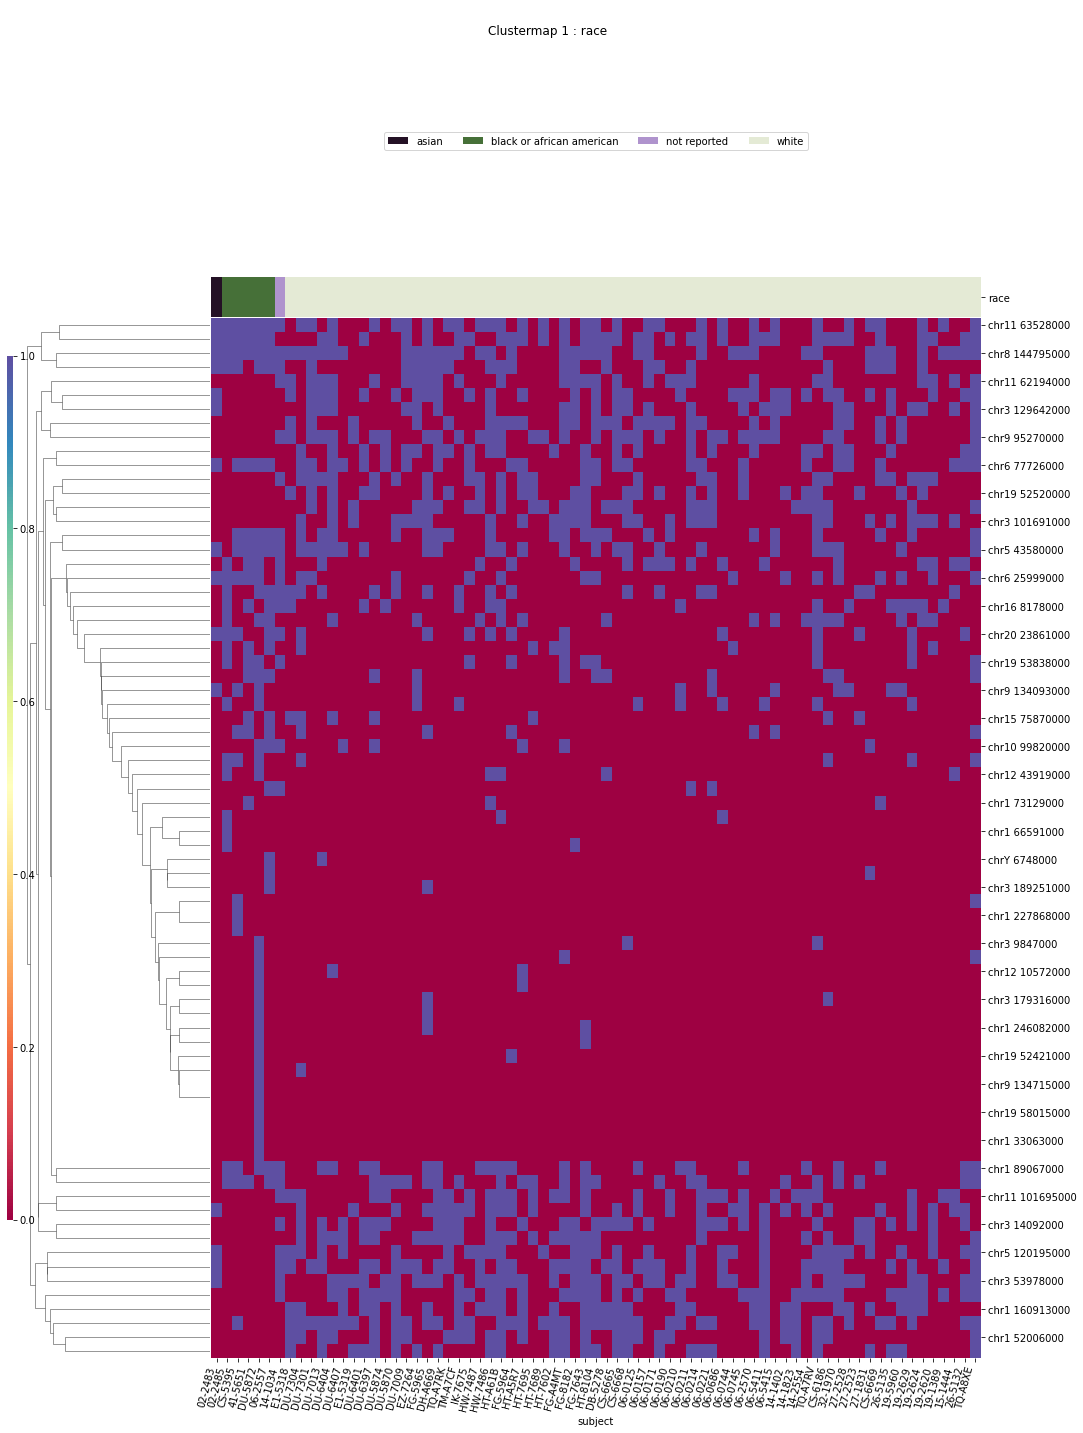

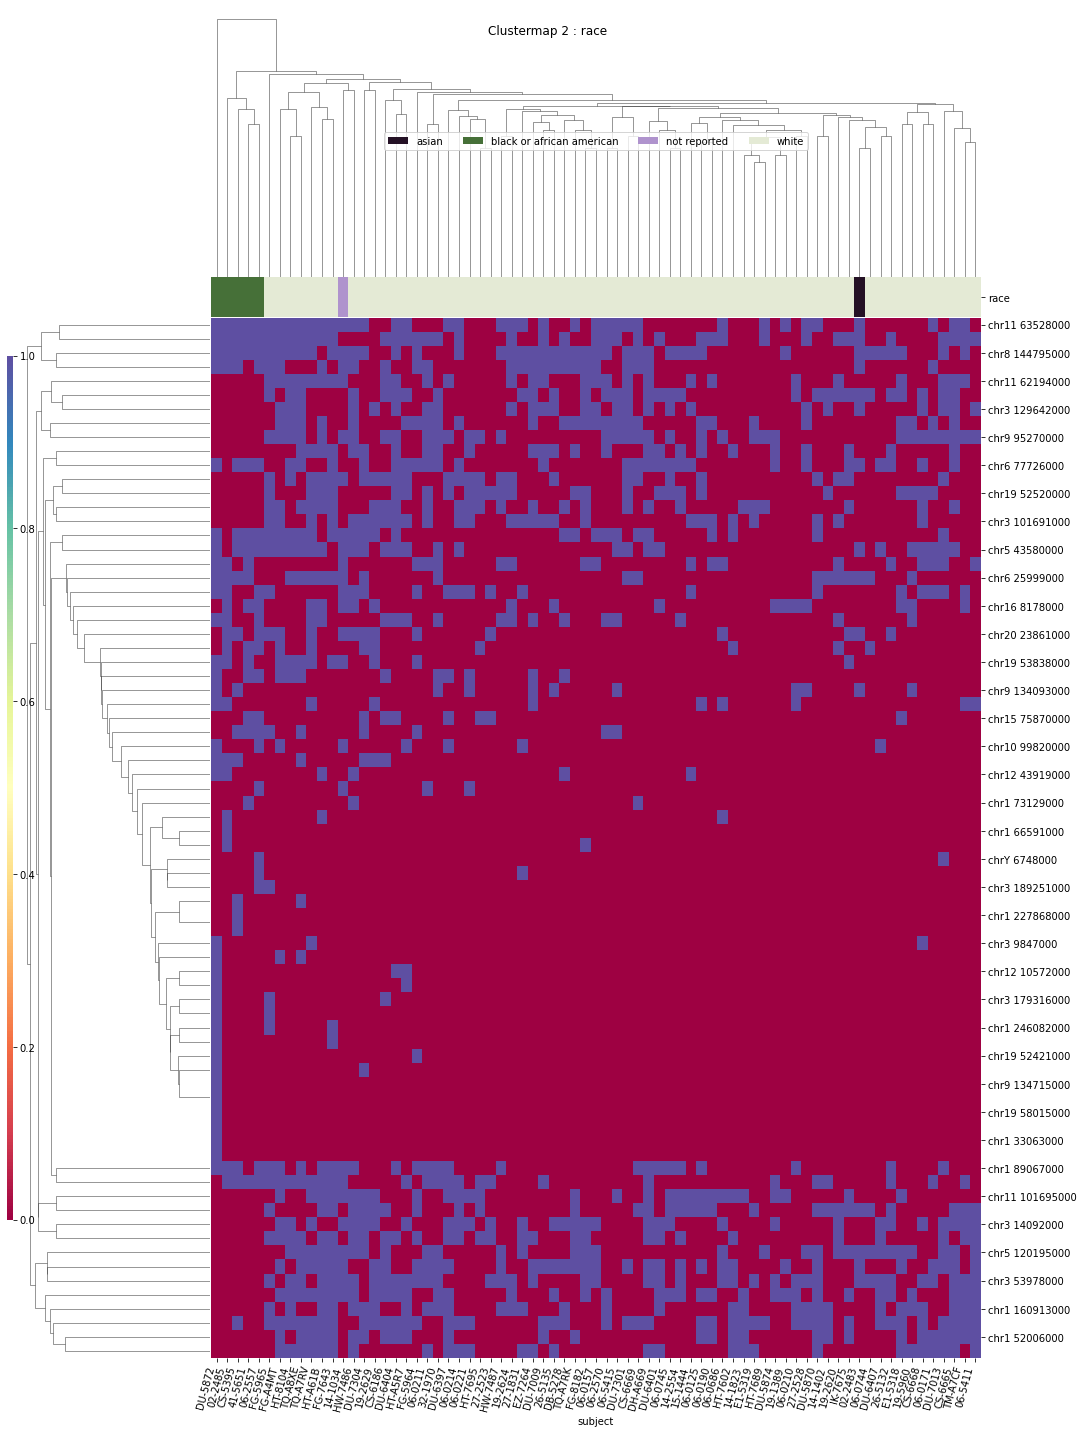

ethnicity
T-Testing
Boxplotting
 p : 8.759897779512837e-11  ( t : 7.753786953560958 ) :  chr22 11556000


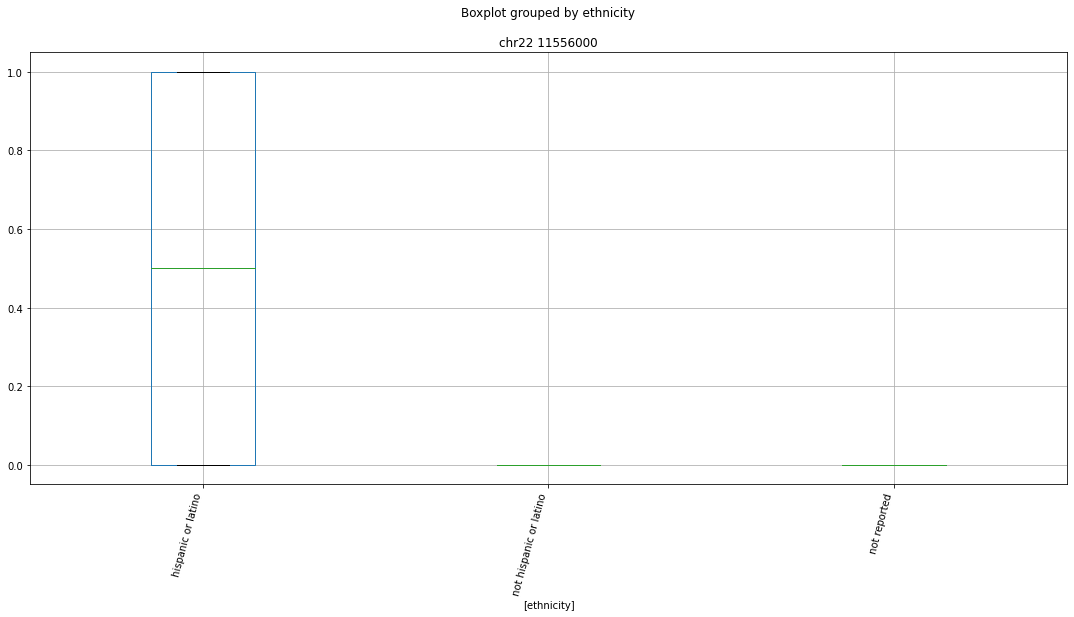

Clustermapping
['chr1 10029000' 'chr1 108518000' 'chr1 111360000' 'chr1 1410000'
 'chr1 156181000' 'chr1 1580000' 'chr1 160913000' 'chr1 161017000'
 'chr1 227607000' 'chr1 227868000' 'chr1 227869000' 'chr1 247016000'
 'chr1 40572000' 'chr1 46320000' 'chr1 52006000' 'chr1 66425000'
 'chr1 70461000' 'chr1 89067000' 'chr1 9001000' 'chr1 93277000'
 'chr10 43337000' 'chr10 68525000' 'chr10 86032000' 'chr11 118730000'
 'chr11 62195000' 'chr11 62356000' 'chr11 62858000' 'chr11 72164000'
 'chr12 105479000' 'chr12 110570000' 'chr12 4722000' 'chr12 51454000'
 'chr12 58336000' 'chr12 6192000' 'chr12 73009000' 'chr12 85469000'
 'chr12 93074000' 'chr14 100312000' 'chr14 77662000' 'chr14 77795000'
 'chr15 100773000' 'chr15 101860000' 'chr16 2928000' 'chr16 35204000'
 'chr16 75815000' 'chr16 75816000' 'chr16 8179000' 'chr17 30564000'
 'chr17 43355000' 'chr17 5075000' 'chr17 64930000' 'chr17 82745000'
 'chr18 31810000' 'chr18 46088000' 'chr19 12232000' 'chr19 20466000'
 'chr19 21568000' 'chr19 2177600

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


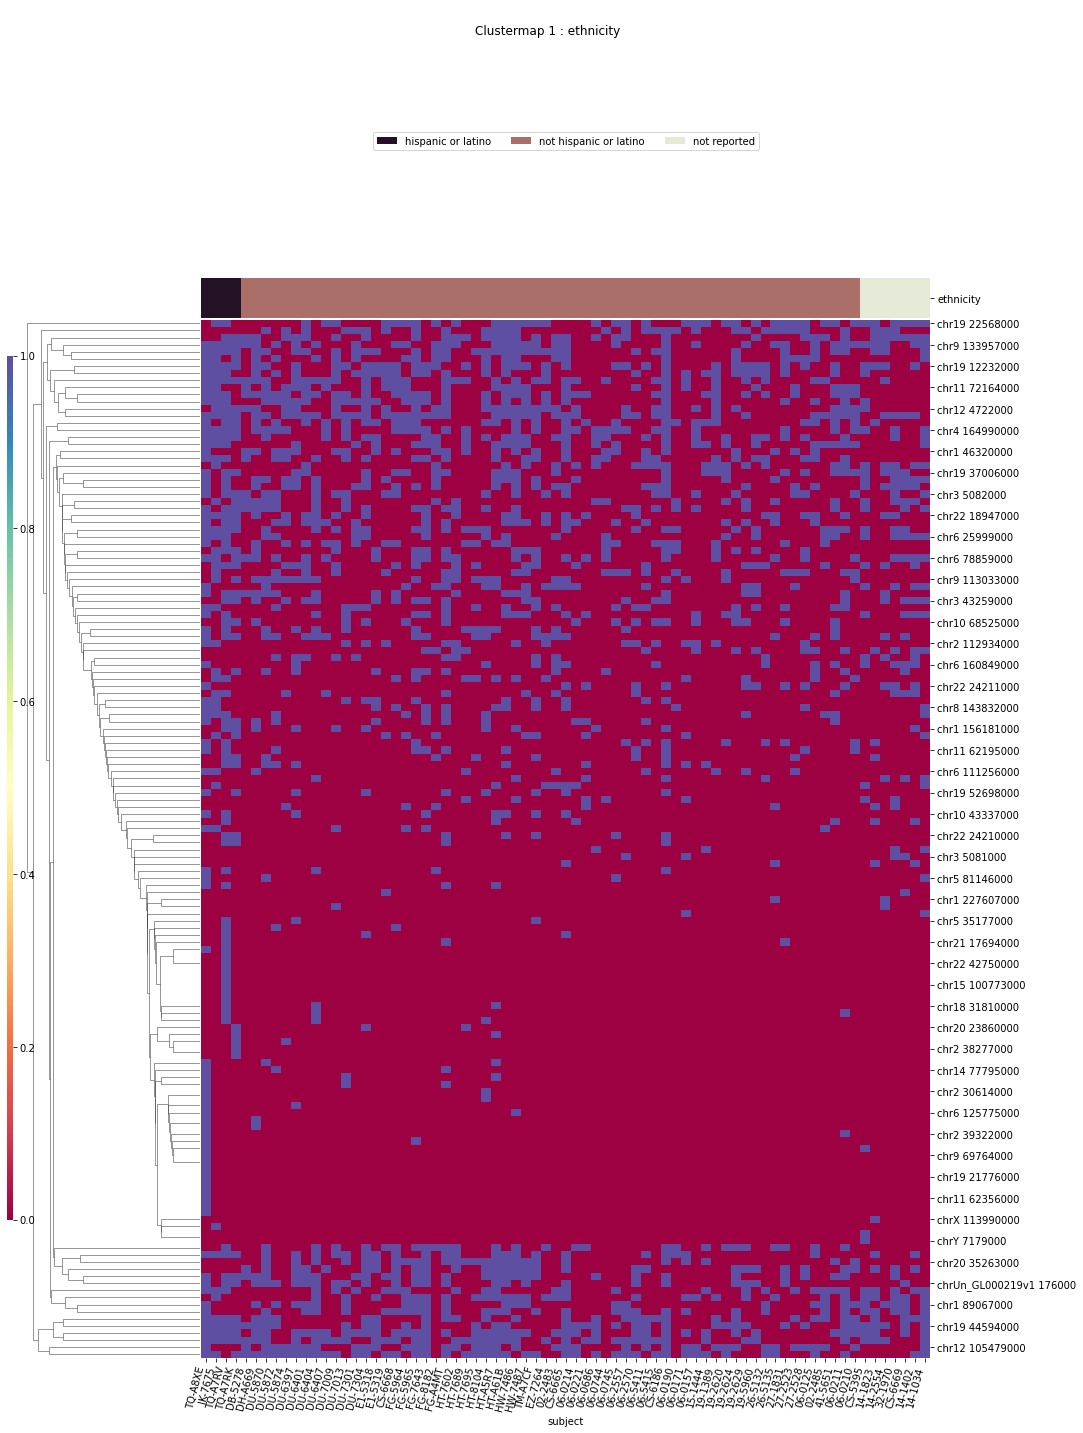

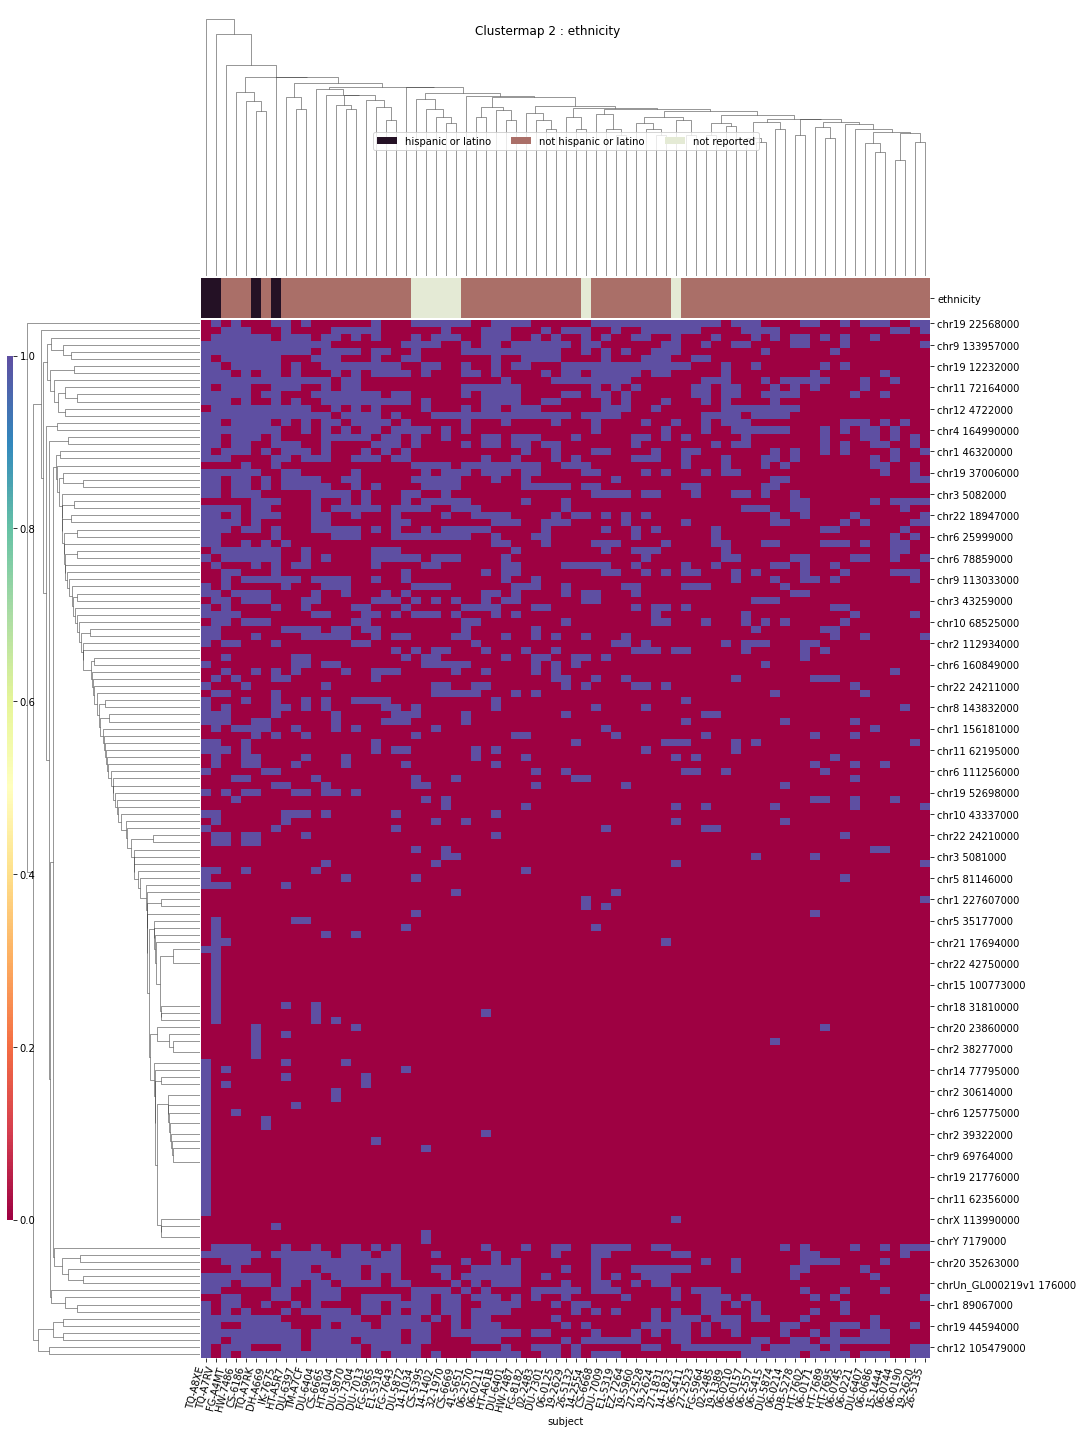

primary_diagnosis
T-Testing
Boxplotting
 p : 1.2735213637763784e-13  ( t : 11.358945418727963 ) :  chr12 56401000


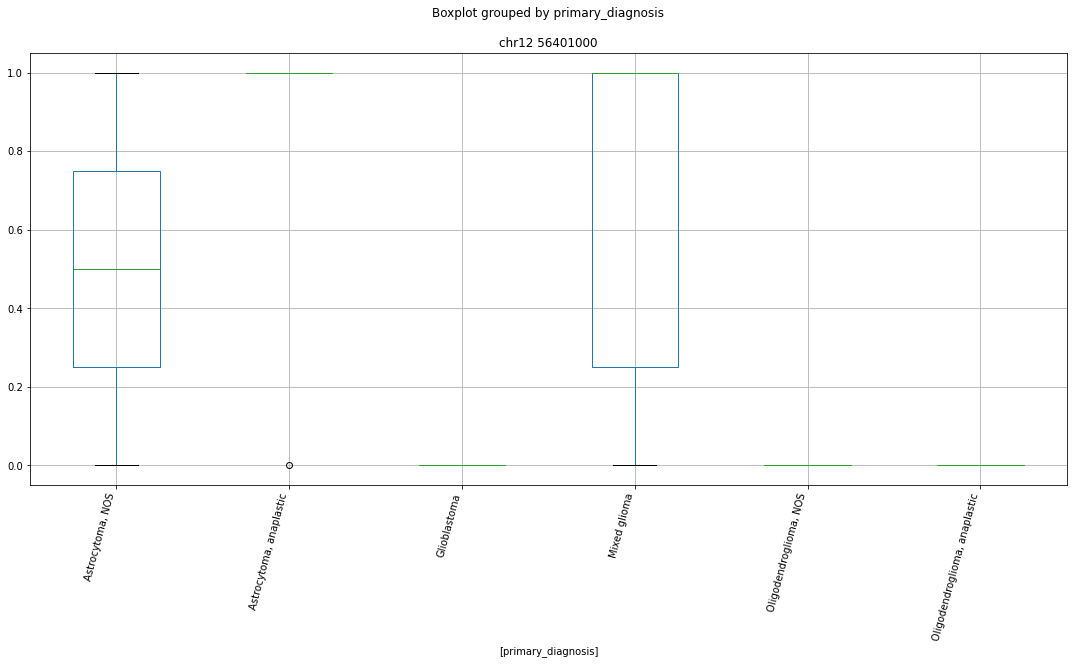

Clustermapping
['chr1 10029000' 'chr1 104135000' 'chr1 108518000' 'chr1 111360000'
 'chr1 114058000' 'chr1 1409000' 'chr1 1410000' 'chr1 144451000'
 'chr1 145932000' 'chr1 146948000' 'chr1 147106000' 'chr1 147107000'
 'chr1 147240000' 'chr1 152456000' 'chr1 155626000' 'chr1 155635000'
 'chr1 156179000' 'chr1 156181000' 'chr1 1580000' 'chr1 159767000'
 'chr1 159768000' 'chr1 160913000' 'chr1 160947000' 'chr1 161315000'
 'chr1 209141000' 'chr1 224339000' 'chr1 227868000' 'chr1 227869000'
 'chr1 246082000' 'chr1 247016000' 'chr1 25587000' 'chr1 29339000'
 'chr1 29359000' 'chr1 33063000' 'chr1 45513000' 'chr1 45528000'
 'chr1 46320000' 'chr1 48174000' 'chr1 52006000' 'chr1 52007000'
 'chr1 54637000' 'chr1 65140000' 'chr1 66425000' 'chr1 70461000'
 'chr1 73130000' 'chr1 75377000' 'chr1 75383000' 'chr1 77983000'
 'chr1 86899000' 'chr1 89066000' 'chr1 89067000' 'chr1 93277000'
 'chr1 99836000' 'chr10 102391000' 'chr10 102455000' 'chr10 130627000'
 'chr10 26893000' 'chr10 26894000' 'chr10 4171

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


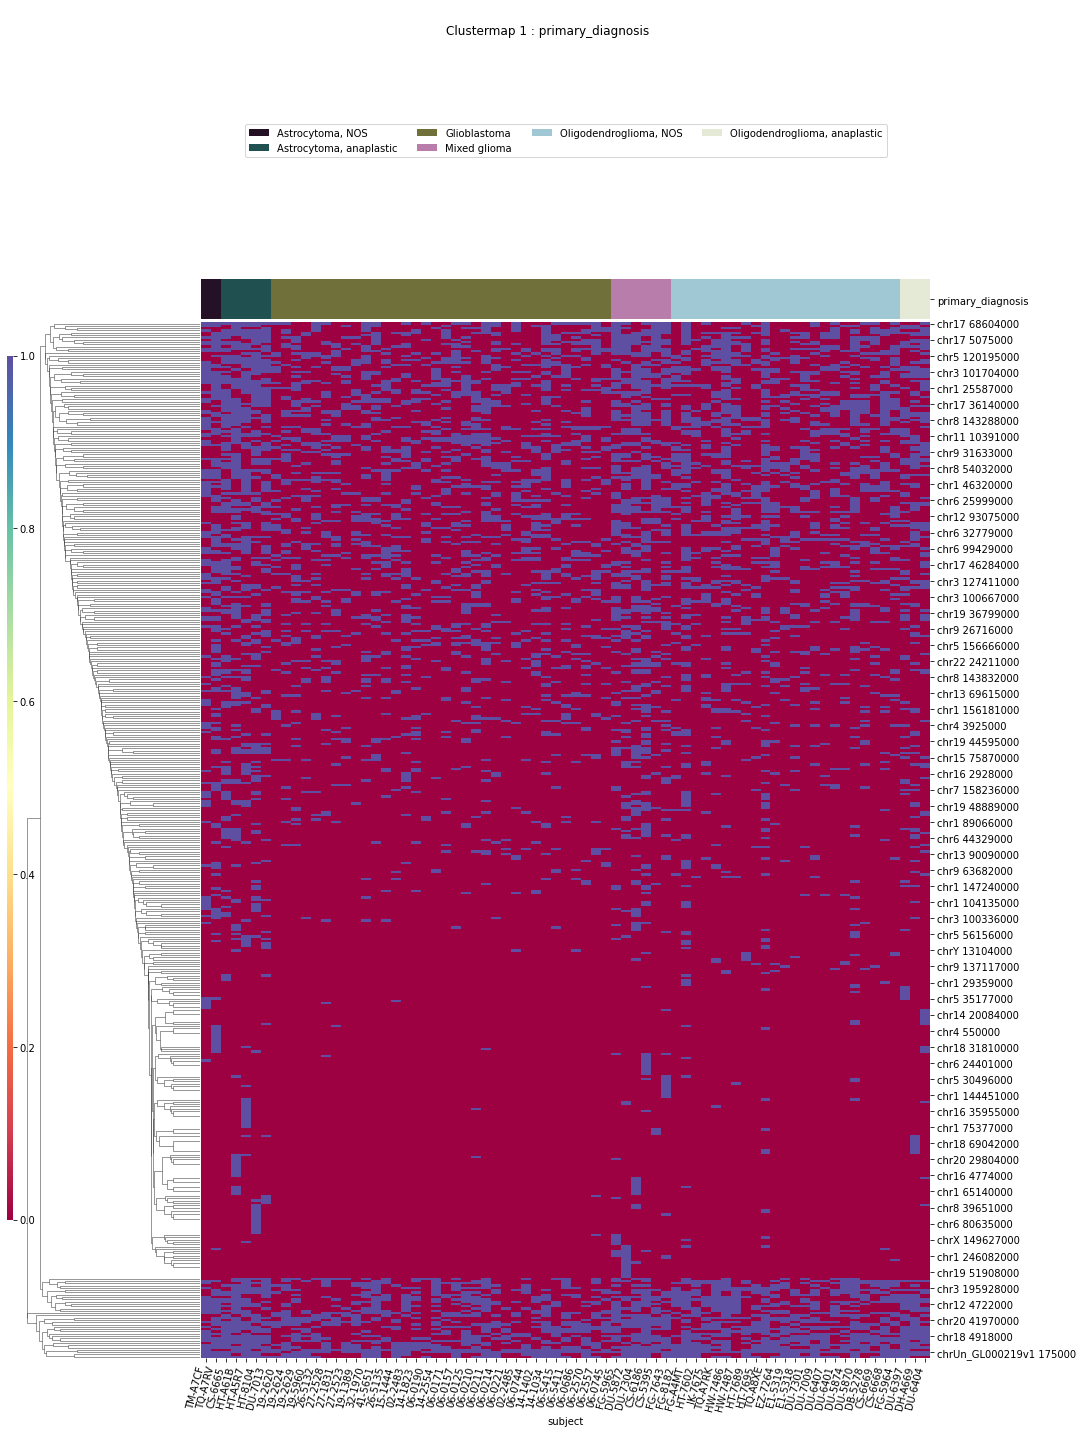

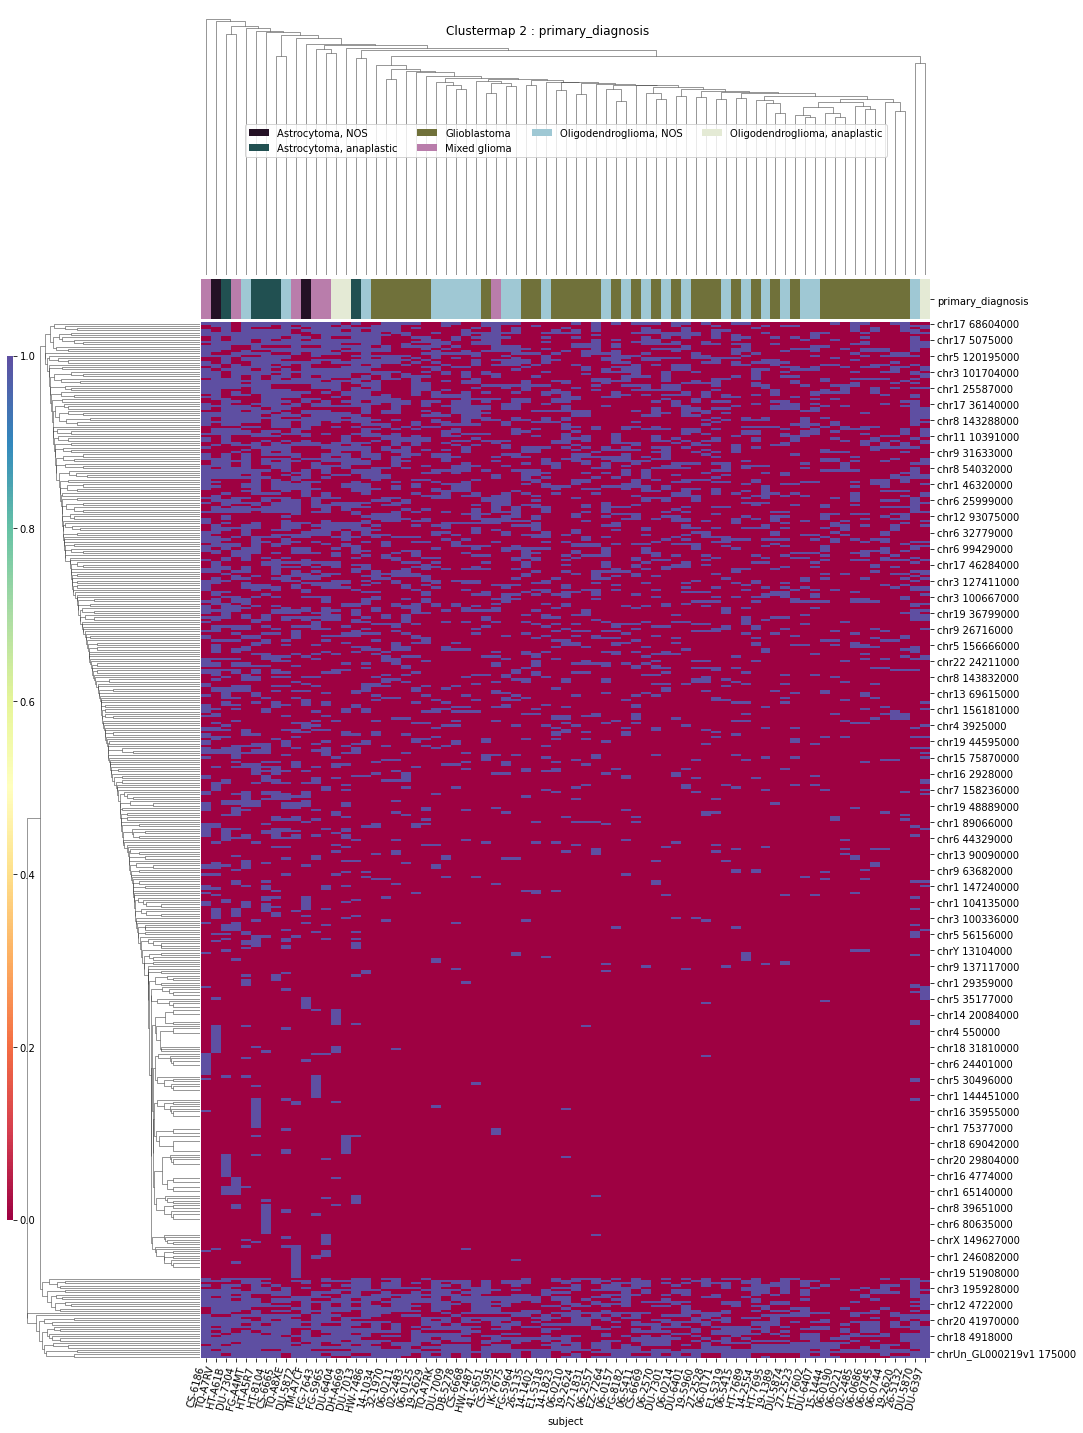

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr1 1409000' 'chr1 155626000' 'chr1 156179000' 'chr1 161017000'
 'chr1 209141000' 'chr1 224339000' 'chr1 247015000' 'chr1 52006000'
 'chr10 102391000' 'chr10 43337000' 'chr11 118730000' 'chr11 24446000'
 'chr11 63527000' 'chr11 67604000' 'chr11 72164000' 'chr12 32099000'
 'chr12 32100000' 'chr12 42329000' 'chr12 4722000' 'chr12 51455000'
 'chr12 59108000' 'chr12 6885000' 'chr13 18719000' 'chr13 49599000'
 'chr14 100312000' 'chr14 38118000' 'chr14 64978000' 'chr14 77795000'
 'chr16 74800000' 'chr16 75816000' 'chr16 8179000' 'chr17 68604000'
 'chr18 2000000' 'chr19 20466000' 'chr19 28130000' 'chr19 37530000'
 'chr19 39689000' 'chr19 48889000' 'chr19 52698000' 'chr19 54951000'
 'chr2 142696000' 'chr2 192542000' 'chr2 201139000' 'chr2 207036000'
 'chr2 231576000' 'chr2 231577000' 'chr2 30613000' 'chr2 32276000'
 'chr2 37225000' 'chr20 23860000' 'chr20 35262000' 'chr20 35263000'
 'chr20 41970000' 'chr21 14281000' 'chr21 41420000' 'chr22 1155

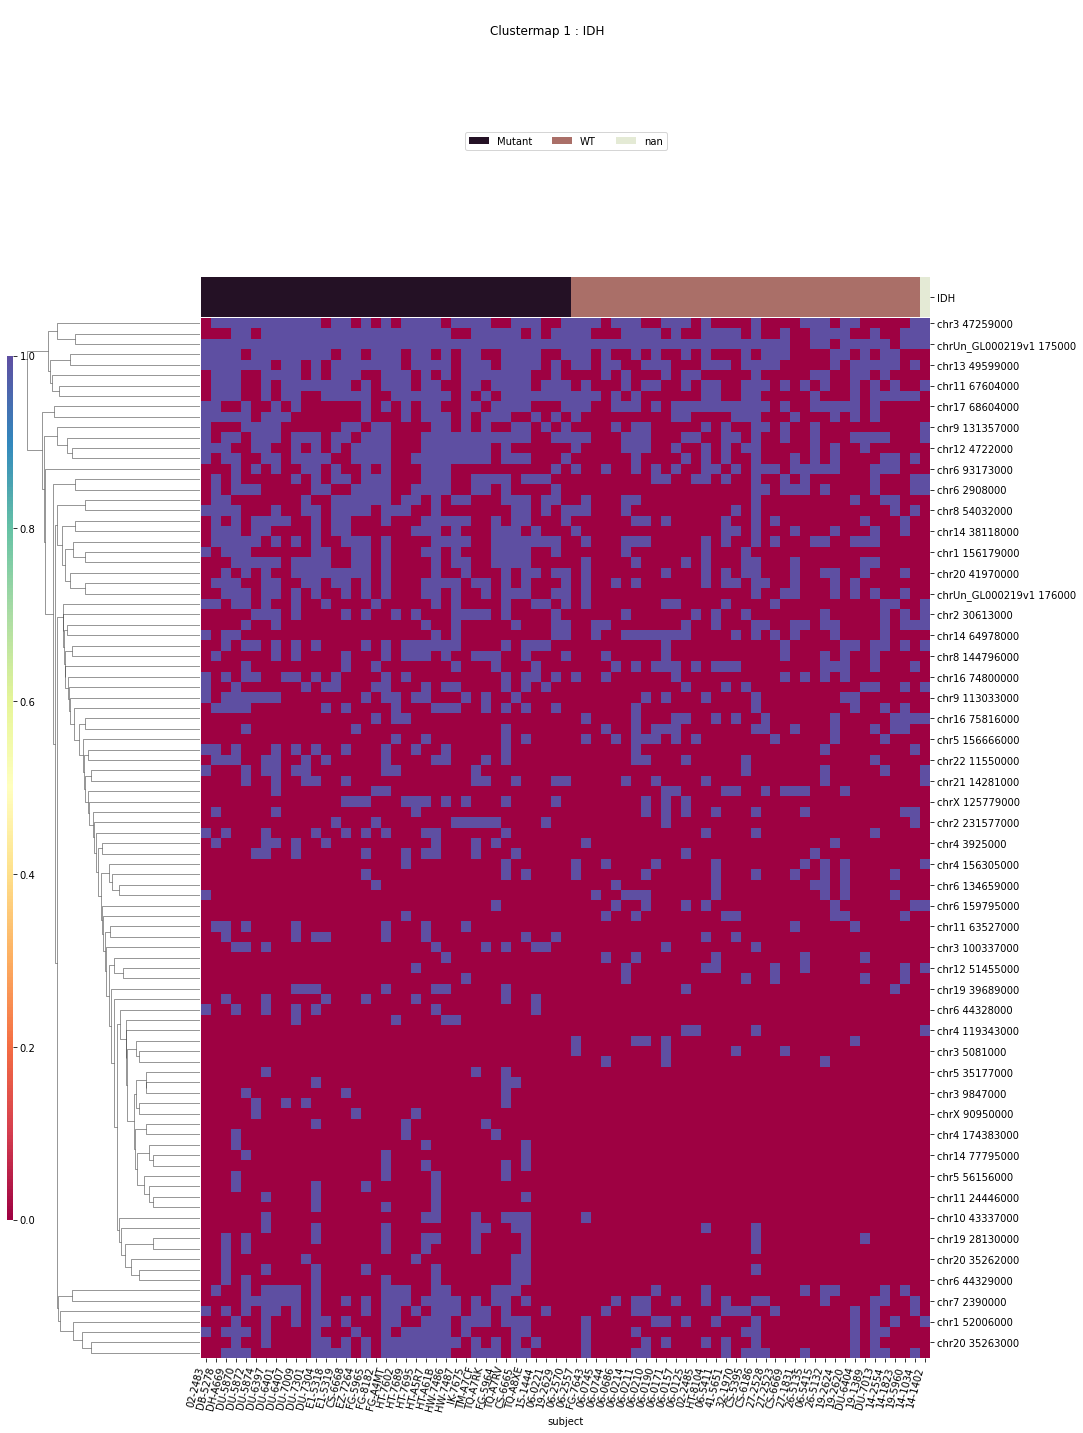

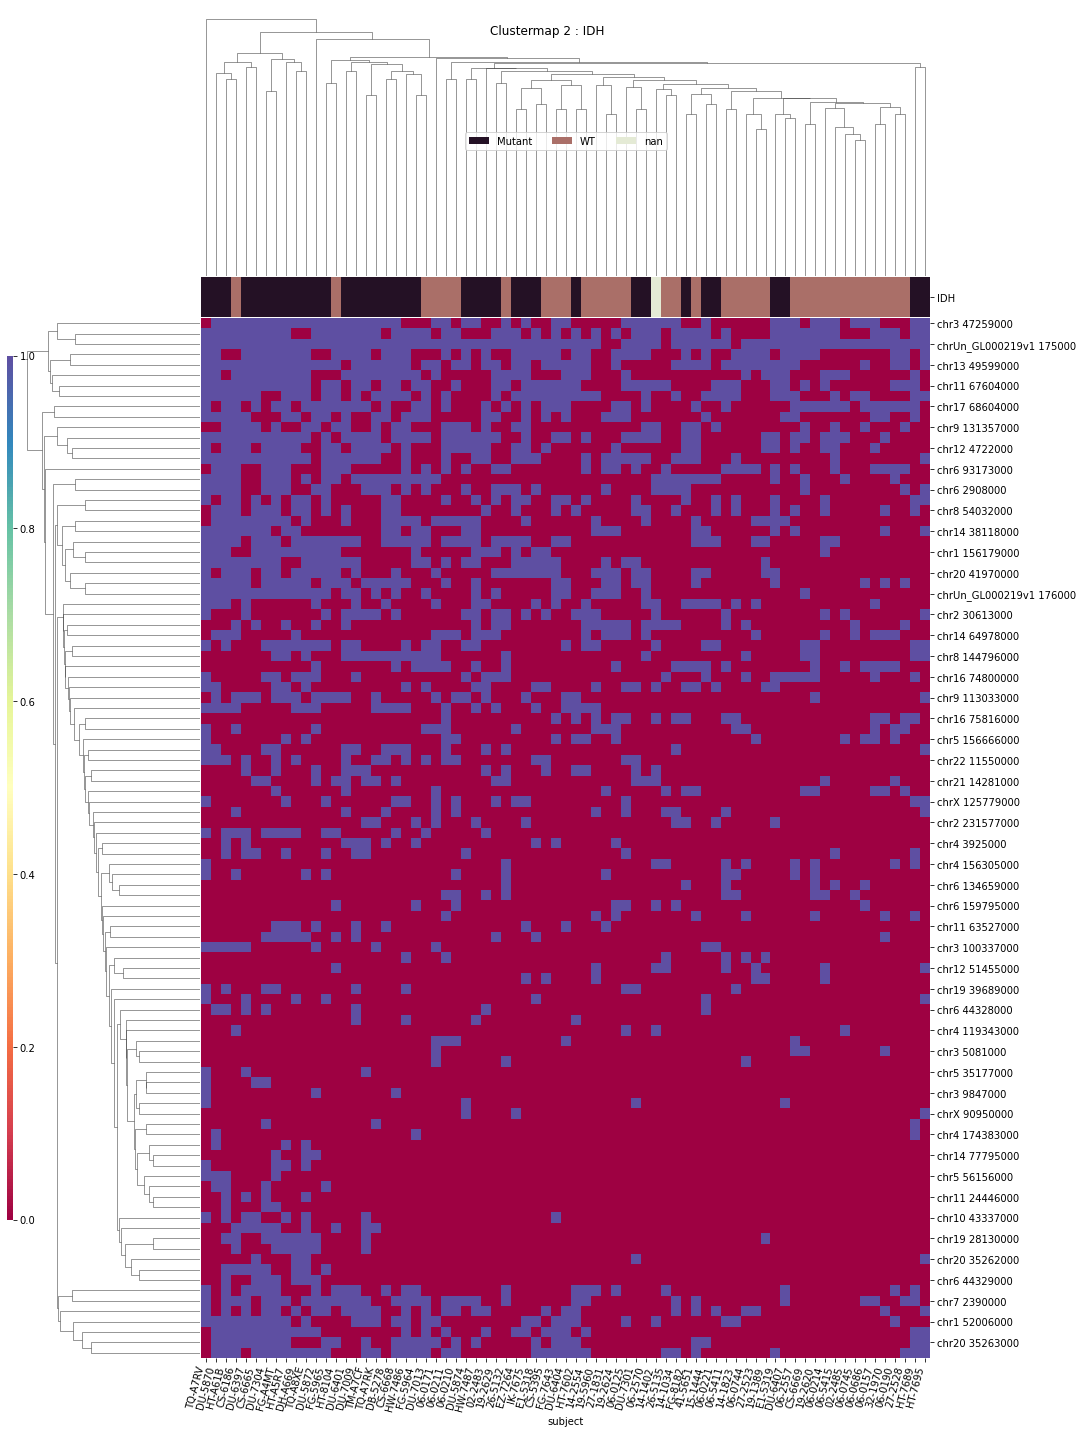

x1p19q
T-Testing
Boxplotting
Clustermapping
['chr1 152455000' 'chr1 152456000' 'chr1 247015000' 'chr1 40572000'
 'chr1 45528000' 'chr1 46320000' 'chr1 48174000' 'chr1 66424000'
 'chr10 102391000' 'chr10 26894000' 'chr11 118730000' 'chr11 62195000'
 'chr11 72164000' 'chr12 32100000' 'chr12 4722000' 'chr12 73853000'
 'chr12 85468000' 'chr13 18719000' 'chr14 38118000' 'chr14 64979000'
 'chr15 39893000' 'chr16 21222000' 'chr16 35204000' 'chr16 75816000'
 'chr16 8179000' 'chr17 36141000' 'chr17 54201000' 'chr17 68604000'
 'chr18 41183000' 'chr18 69042000' 'chr19 22284000' 'chr19 23724000'
 'chr19 36247000' 'chr19 52558000' 'chr19 53460000' 'chr2 214803000'
 'chr2 232422000' 'chr20 35263000' 'chr22 11550000' 'chr22 23907000'
 'chr22 24211000' 'chr3 110368000' 'chr3 118539000' 'chr3 127411000'
 'chr3 175906000' 'chr3 186887000' 'chr3 196945000' 'chr3 39419000'
 'chr4 156305000' 'chr4 159976000' 'chr4 174383000' 'chr4 3925000'
 'chr5 100983000' 'chr5 151426000' 'chr5 156666000' 'chr5 180828000

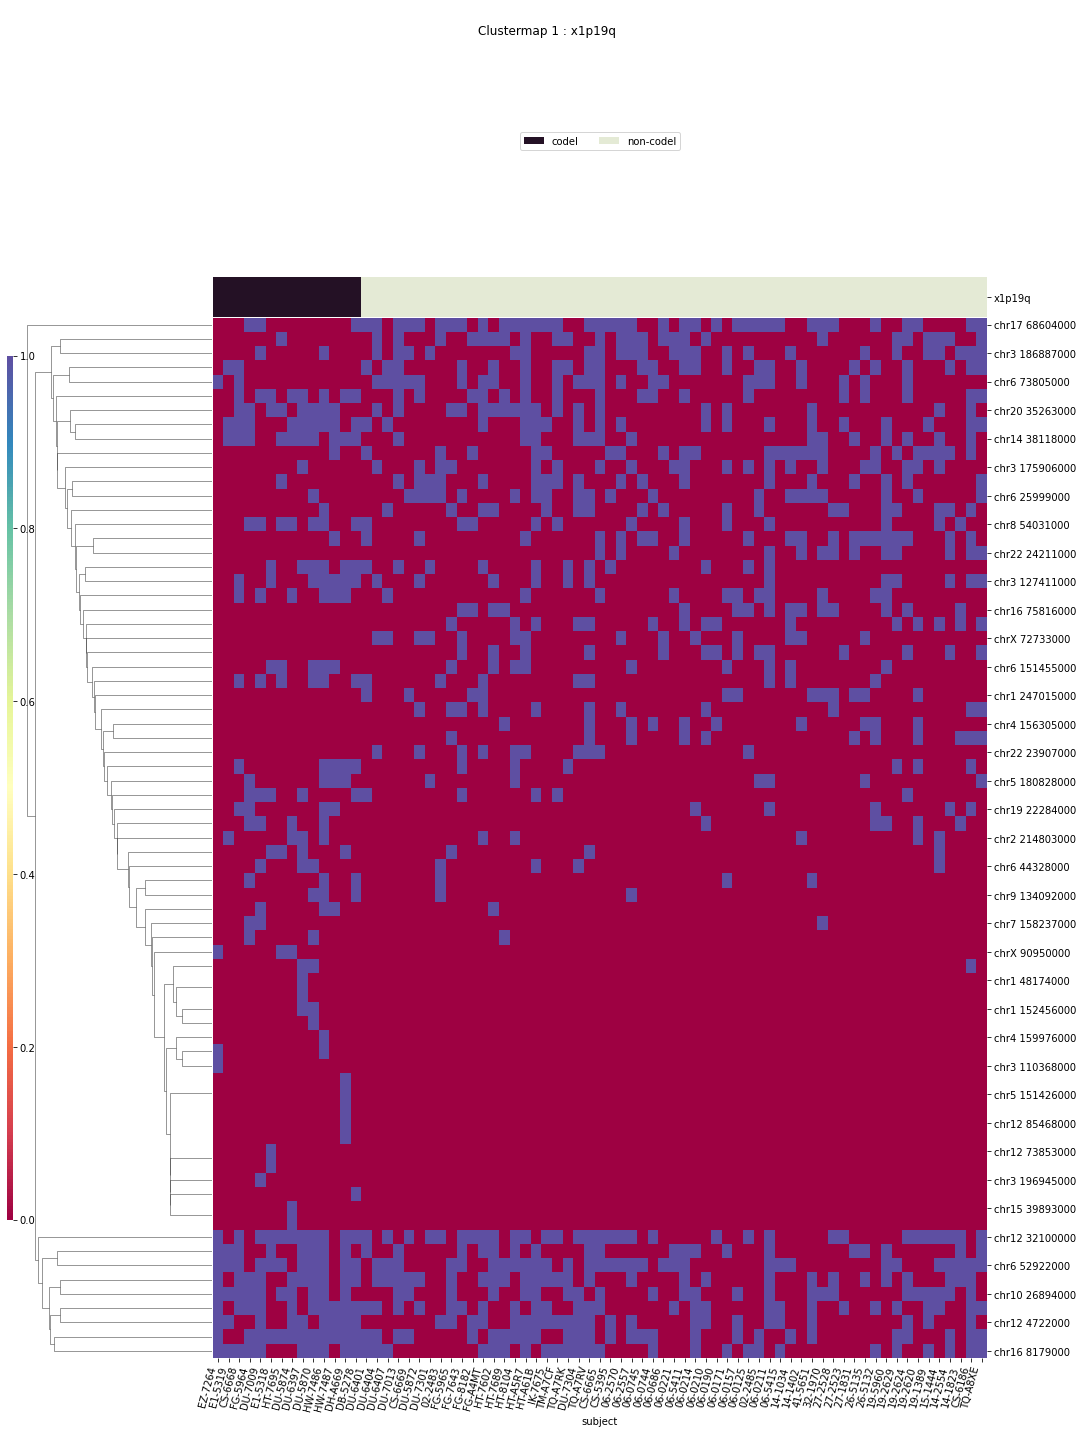

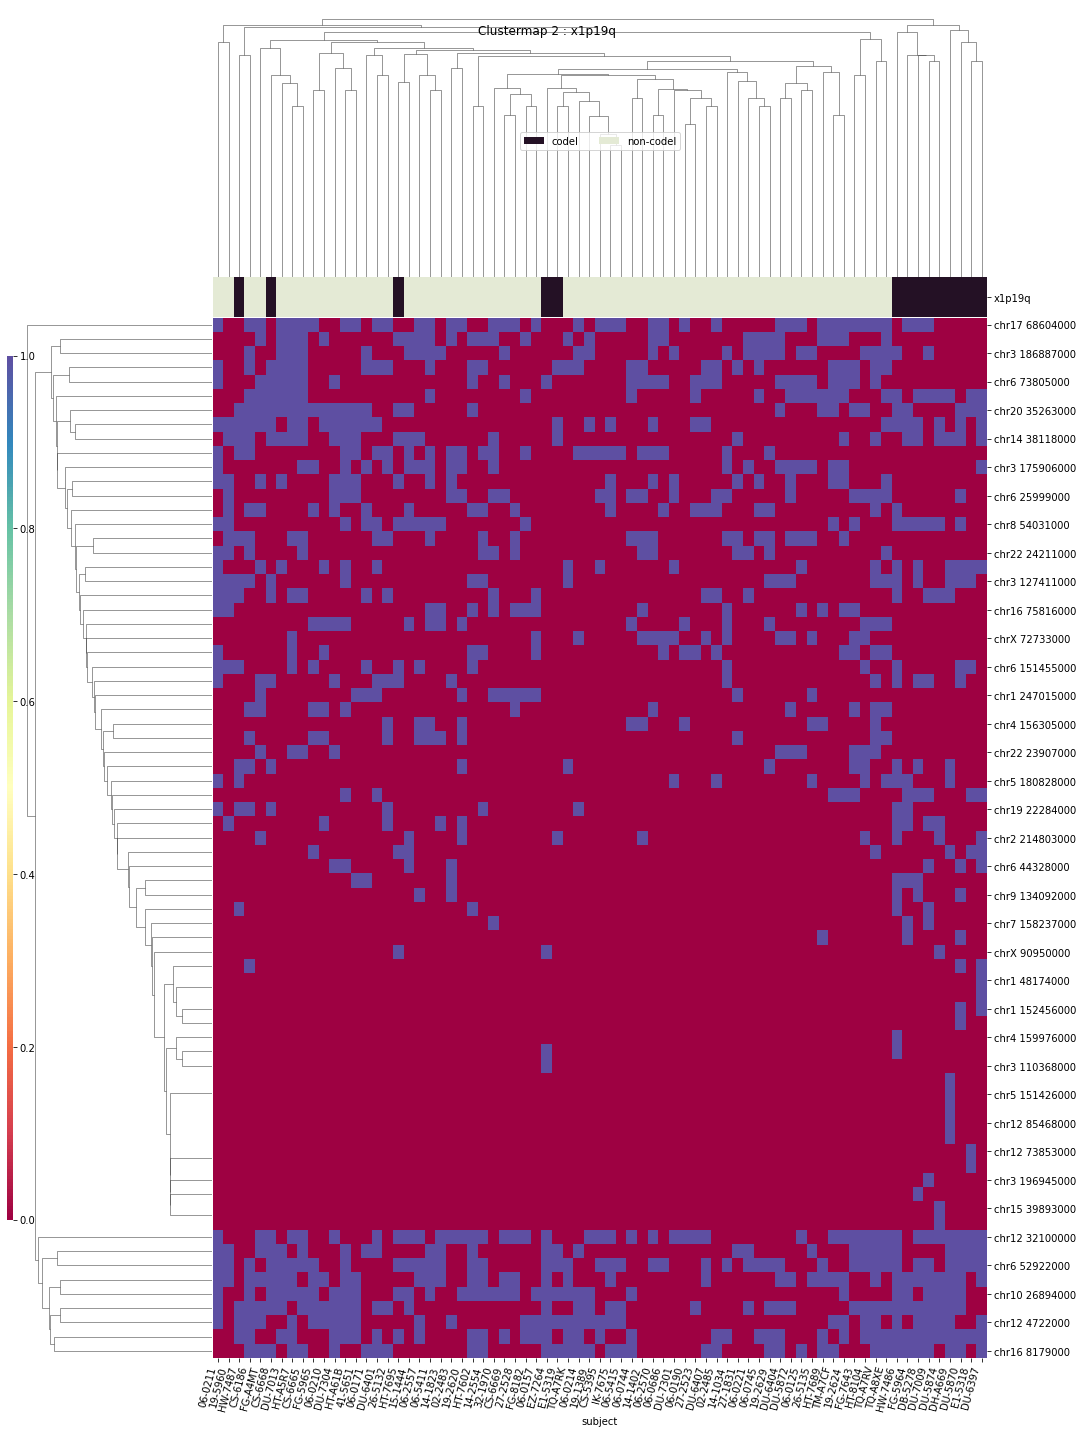

TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'chr1 1410000' 'chr1 155626000' 'chr1 156179000' 'chr1 209141000'
 'chr1 224339000' 'chr1 247016000' 'chr1 40572000' 'chr1 65140000'
 'chr10 133542000' 'chr10 43337000' 'chr11 18900000' 'chr11 24446000'
 'chr11 62195000' 'chr11 62368000' 'chr11 62859000' 'chr11 63527000'
 'chr11 63528000' 'chr11 67604000' 'chr12 10572000' 'chr12 21644000'
 'chr12 42329000' 'chr12 43919000' 'chr12 51455000' 'chr13 43041000'
 'chr13 95268000' 'chr14 64978000' 'chr14 77795000' 'chr16 23599000'
 'chr16 47864000' 'chr16 74800000' 'chr16 8179000' 'chr17 43354000'
 'chr17 5075000' 'chr17 54201000' 'chr17 82745000' 'chr18 31810000'
 'chr18 69043000' 'chr19 21568000' 'chr19 22284000' 'chr19 28130000'
 'chr19 37530000' 'chr19 39479000' 'chr19 48889000' 'chr19 52698000'
 'chr2 192542000' 'chr2 207036000' 'chr2 214802000' 'chr2 231576000'
 'chr2 37225000' 'chr2 86261000' 'chr20 23860000' 'chr20 29804000'
 'chr21 14281000' 'chr22 11556000' 'chr22 23907000' 'chr22 24

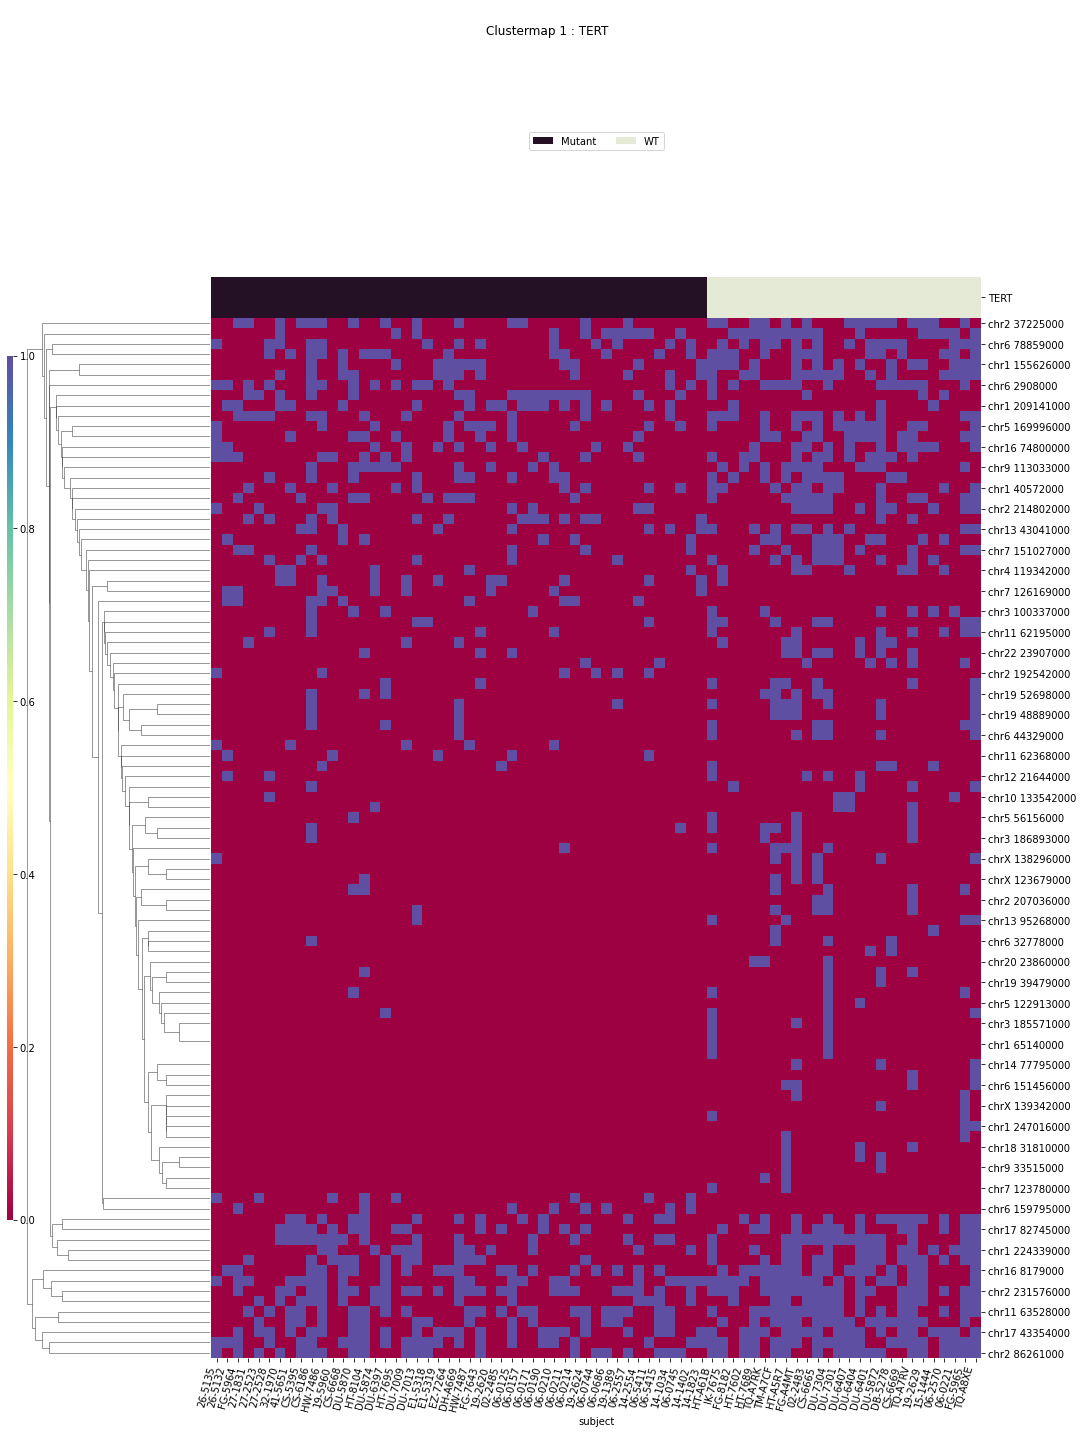

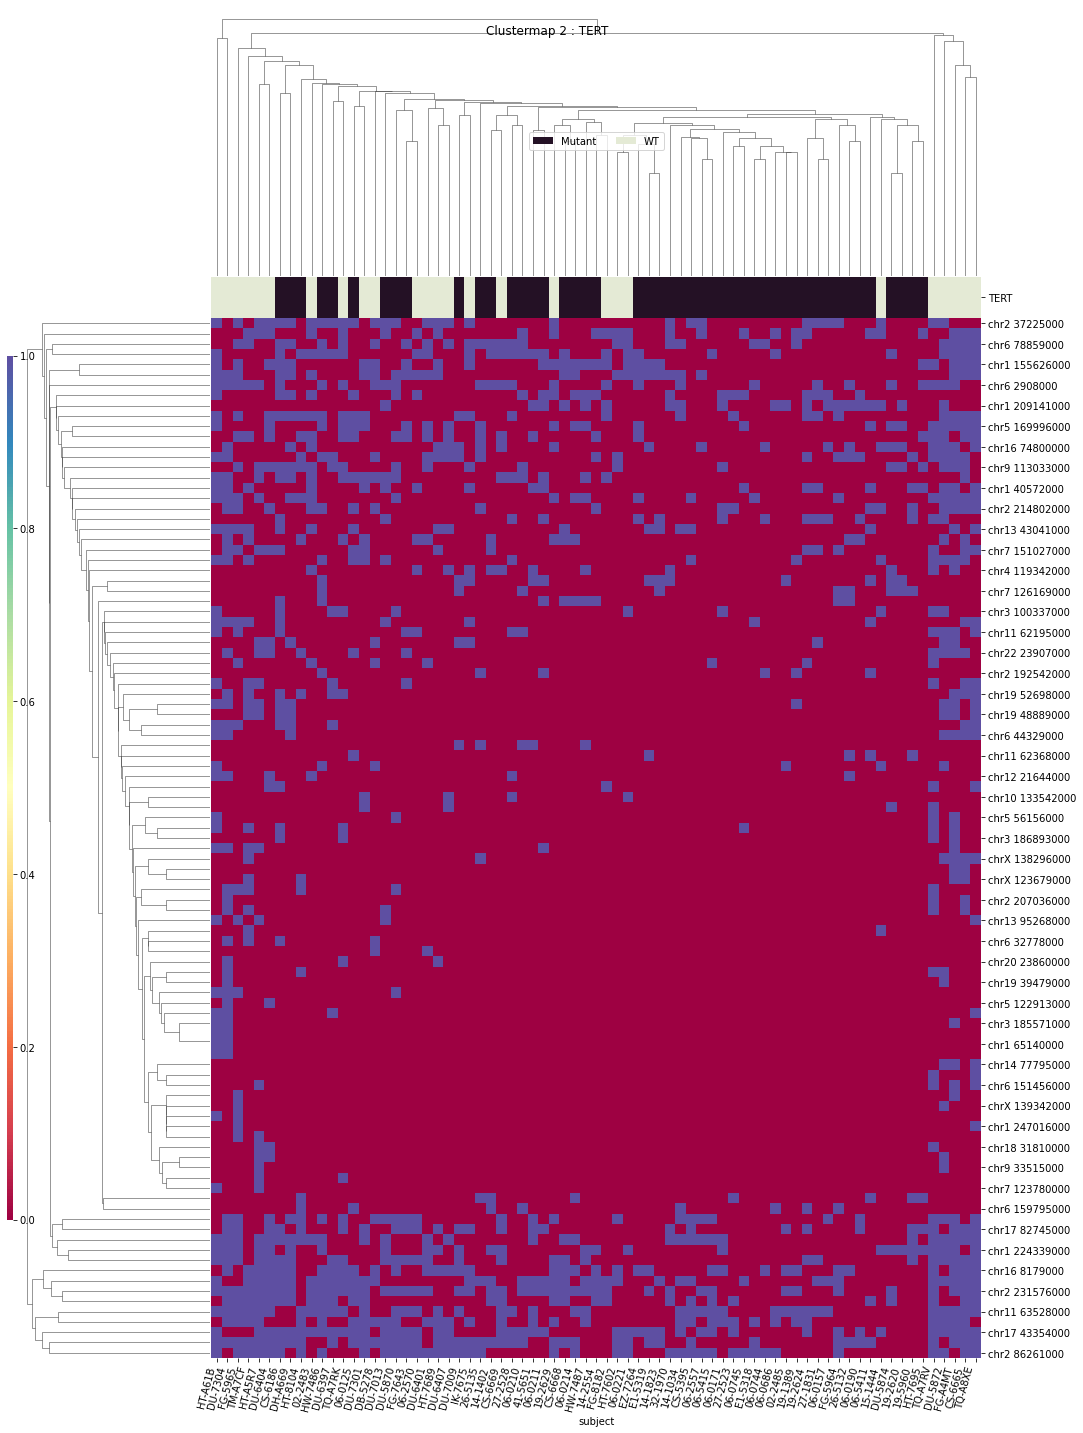

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 104135000' 'chr1 1409000' 'chr1 1410000' 'chr1 145932000'
 'chr1 147240000' 'chr1 155626000' 'chr1 156179000' 'chr1 156181000'
 'chr1 209141000' 'chr1 224339000' 'chr1 227869000' 'chr1 29339000'
 'chr1 45528000' 'chr1 46320000' 'chr1 52006000' 'chr1 89066000'
 'chr10 102391000' 'chr10 130627000' 'chr10 43337000' 'chr10 65410000'
 'chr10 6833000' 'chr10 99256000' 'chr11 118730000' 'chr11 24446000'
 'chr11 60714000' 'chr11 61655000' 'chr11 62194000' 'chr11 63527000'
 'chr11 67604000' 'chr11 72164000' 'chr12 32100000' 'chr12 42329000'
 'chr12 4722000' 'chr12 51455000' 'chr12 56401000' 'chr12 59108000'
 'chr13 49599000' 'chr13 90090000' 'chr13 95268000' 'chr14 100312000'
 'chr14 22725000' 'chr14 38118000' 'chr14 64978000' 'chr14 64979000'
 'chr14 77794000' 'chr15 65227000' 'chr15 88540000' 'chr16 23599000'
 'chr16 35204000' 'chr16 5755000' 'chr16 74799000' 'chr16 75816000'
 'chr16 8179000' 'chr17 30701000' 'chr17 36140000' 'chr17 507

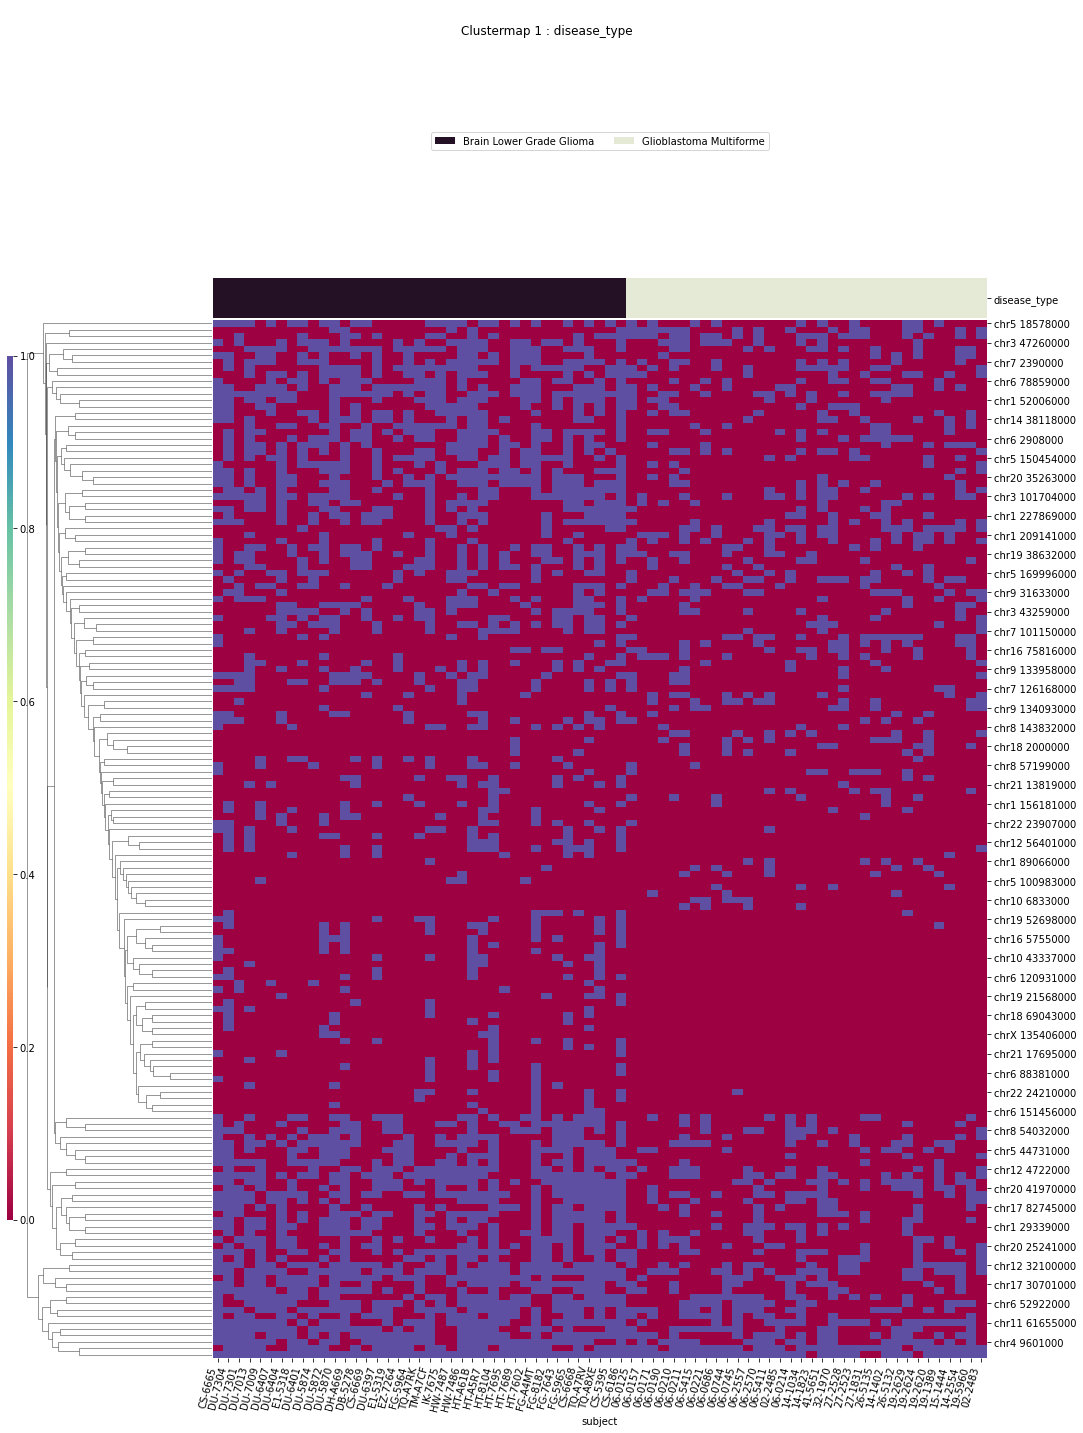

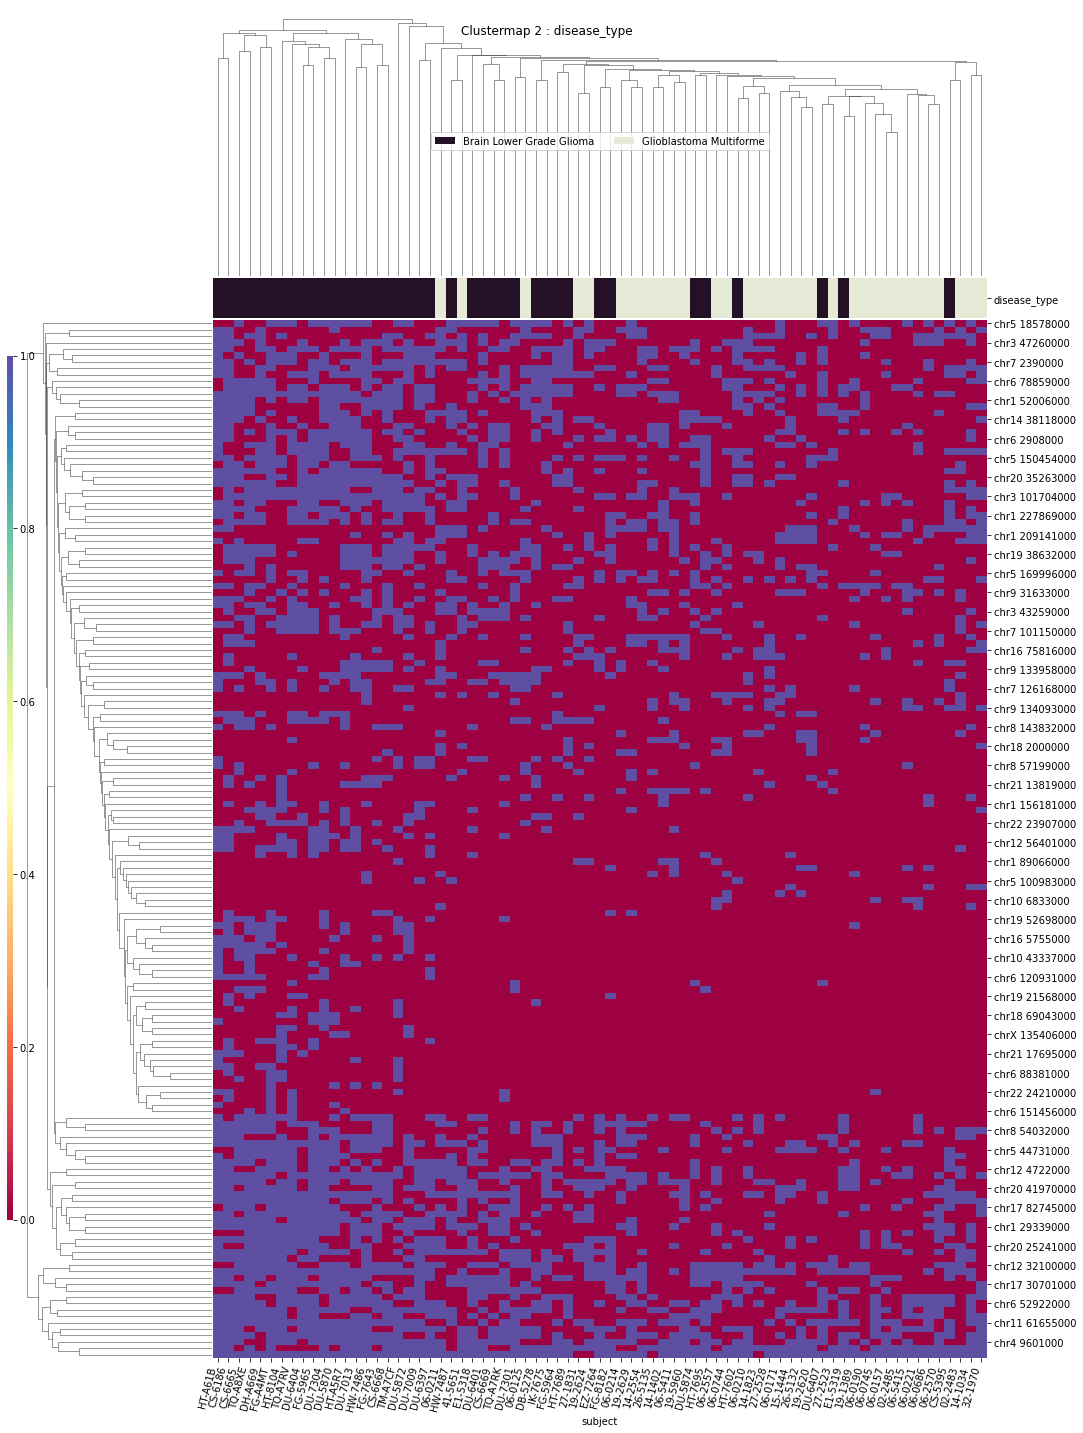

IDH_1p19q_status
T-Testing


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 1409000' 'chr1 1410000' 'chr1 15136000'
 'chr1 152456000' 'chr1 155626000' 'chr1 156179000' 'chr1 156181000'
 'chr1 1580000' 'chr1 161017000' 'chr1 209141000' 'chr1 224339000'
 'chr1 247015000' 'chr1 247016000' 'chr1 40572000' 'chr1 45528000'
 'chr1 46320000' 'chr1 52006000' 'chr1 65140000' 'chr1 66424000'
 'chr10 102391000' 'chr10 26894000' 'chr10 43337000' 'chr11 118730000'
 'chr11 18900000' 'chr11 24446000' 'chr11 62195000' 'chr11 62368000'
 'chr11 62859000' 'chr11 63528000' 'chr11 67603000' 'chr11 67604000'
 'chr11 72164000' 'chr12 32099000' 'chr12 32100000' 'chr12 42329000'
 'chr12 4722000' 'chr12 51455000' 'chr12 56401000' 'chr12 59108000'
 'chr13 18719000' 'chr13 43041000' 'chr13 95268000' 'chr14 100312000'
 'chr14 38118000' 'chr14 64978000' 'chr14 64979000' 'chr14 77795000'
 'chr16 35204000' 'chr16 47864000' 'chr16 74800000' 'chr16 75816000'
 'chr16 8179000' 'chr17 54201000' 'chr17 68604000' 'chr18 2000000'
 'chr18 69043000' 

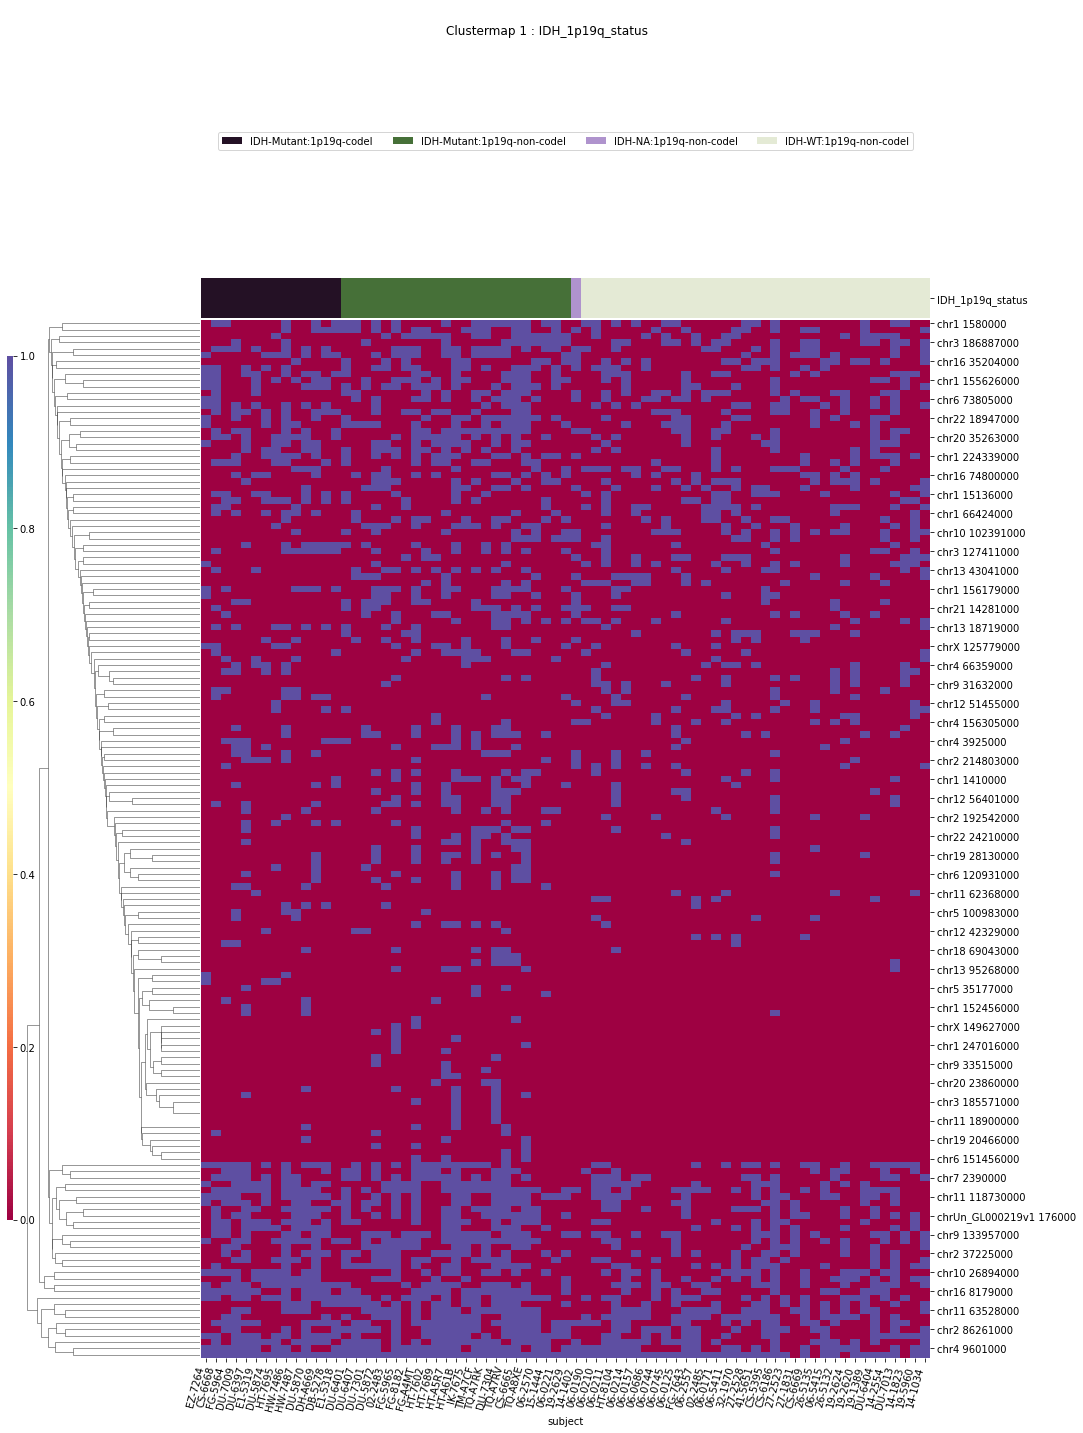

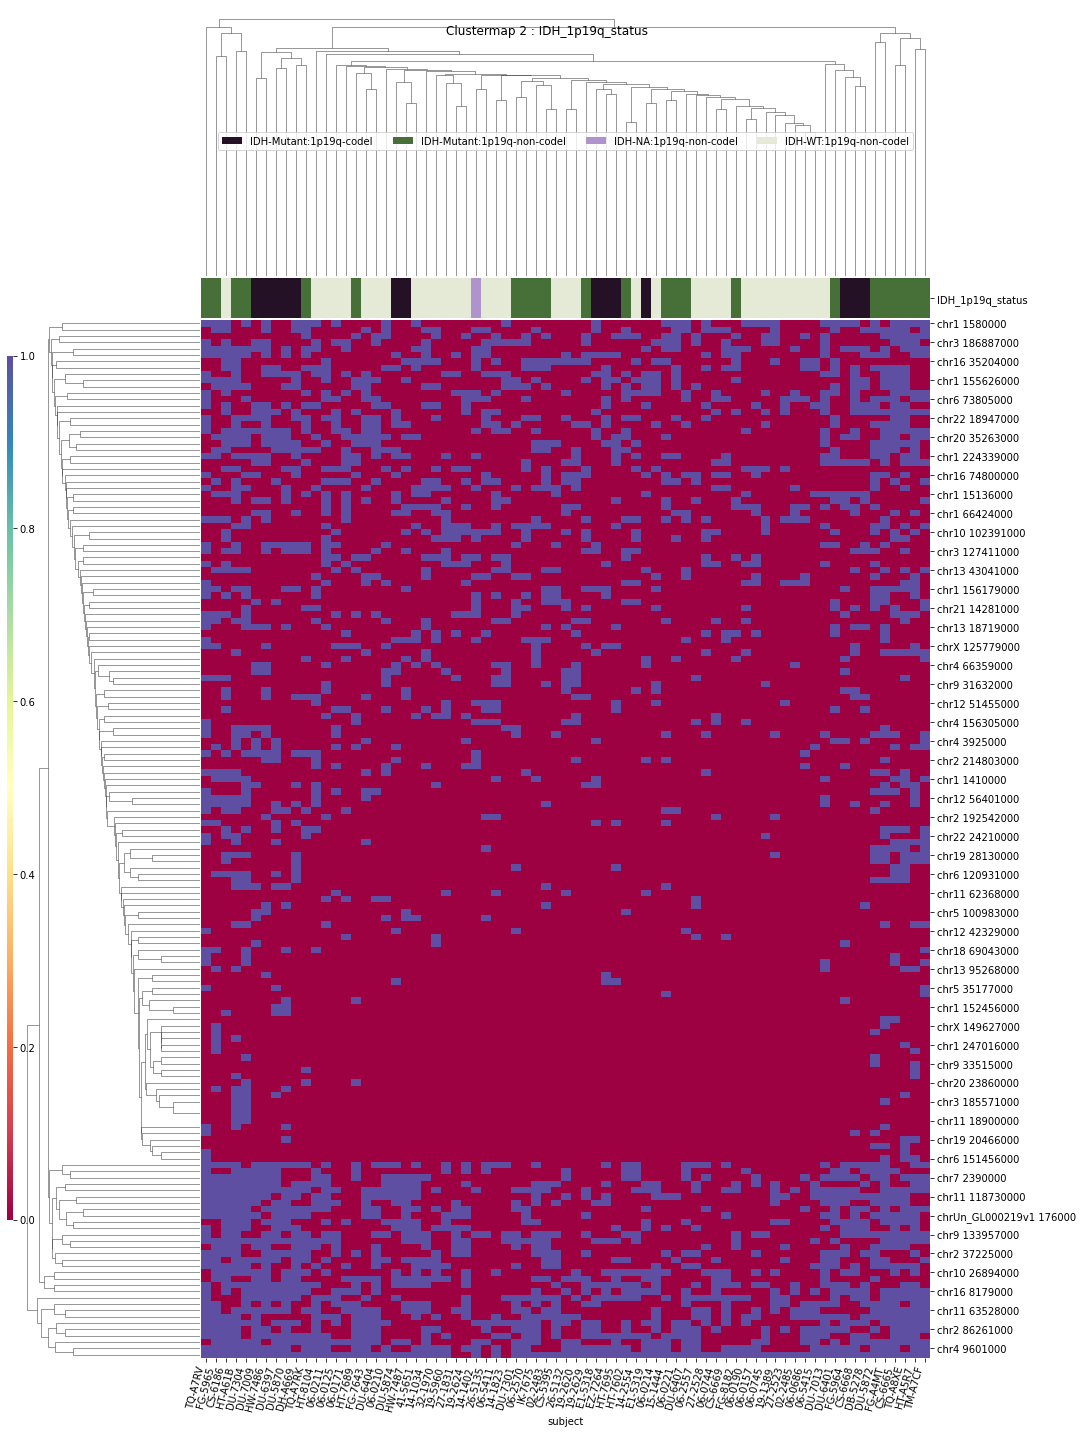

WHO_groups
T-Testing
Boxplotting
Clustermapping
['WHO_groups' 'chr1 104135000' 'chr1 10427000' 'chr1 108517000'
 'chr1 108518000' 'chr1 114058000' 'chr1 1409000' 'chr1 1410000'
 'chr1 144451000' 'chr1 145932000' 'chr1 147106000' 'chr1 147107000'
 'chr1 147240000' 'chr1 147733000' 'chr1 15136000' 'chr1 152456000'
 'chr1 155600000' 'chr1 155626000' 'chr1 155635000' 'chr1 156179000'
 'chr1 156181000' 'chr1 1580000' 'chr1 159767000' 'chr1 160690000'
 'chr1 160913000' 'chr1 160947000' 'chr1 161017000' 'chr1 161315000'
 'chr1 165092000' 'chr1 165093000' 'chr1 209141000' 'chr1 224339000'
 'chr1 227868000' 'chr1 227869000' 'chr1 246082000' 'chr1 247015000'
 'chr1 247016000' 'chr1 25587000' 'chr1 29339000' 'chr1 29359000'
 'chr1 33063000' 'chr1 40572000' 'chr1 45513000' 'chr1 45528000'
 'chr1 46320000' 'chr1 52006000' 'chr1 52007000' 'chr1 65140000'
 'chr1 66424000' 'chr1 66425000' 'chr1 70461000' 'chr1 73129000'
 'chr1 73130000' 'chr1 75377000' 'chr1 75383000' 'chr1 77983000'
 'chr1 89066000' 

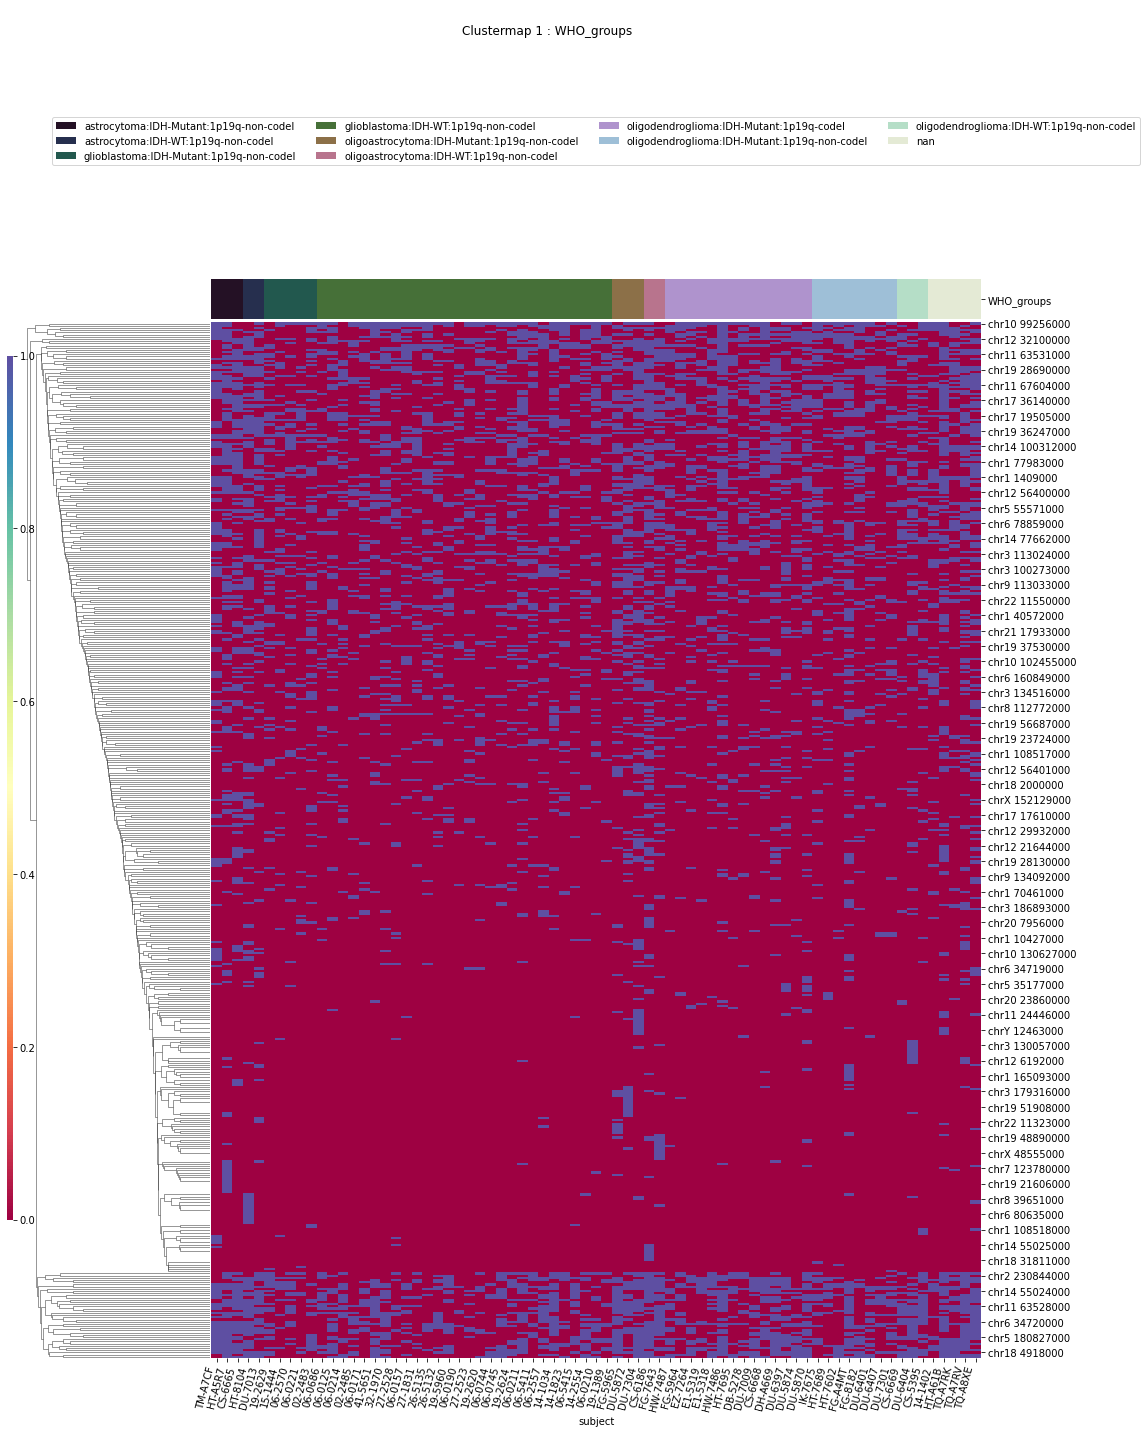

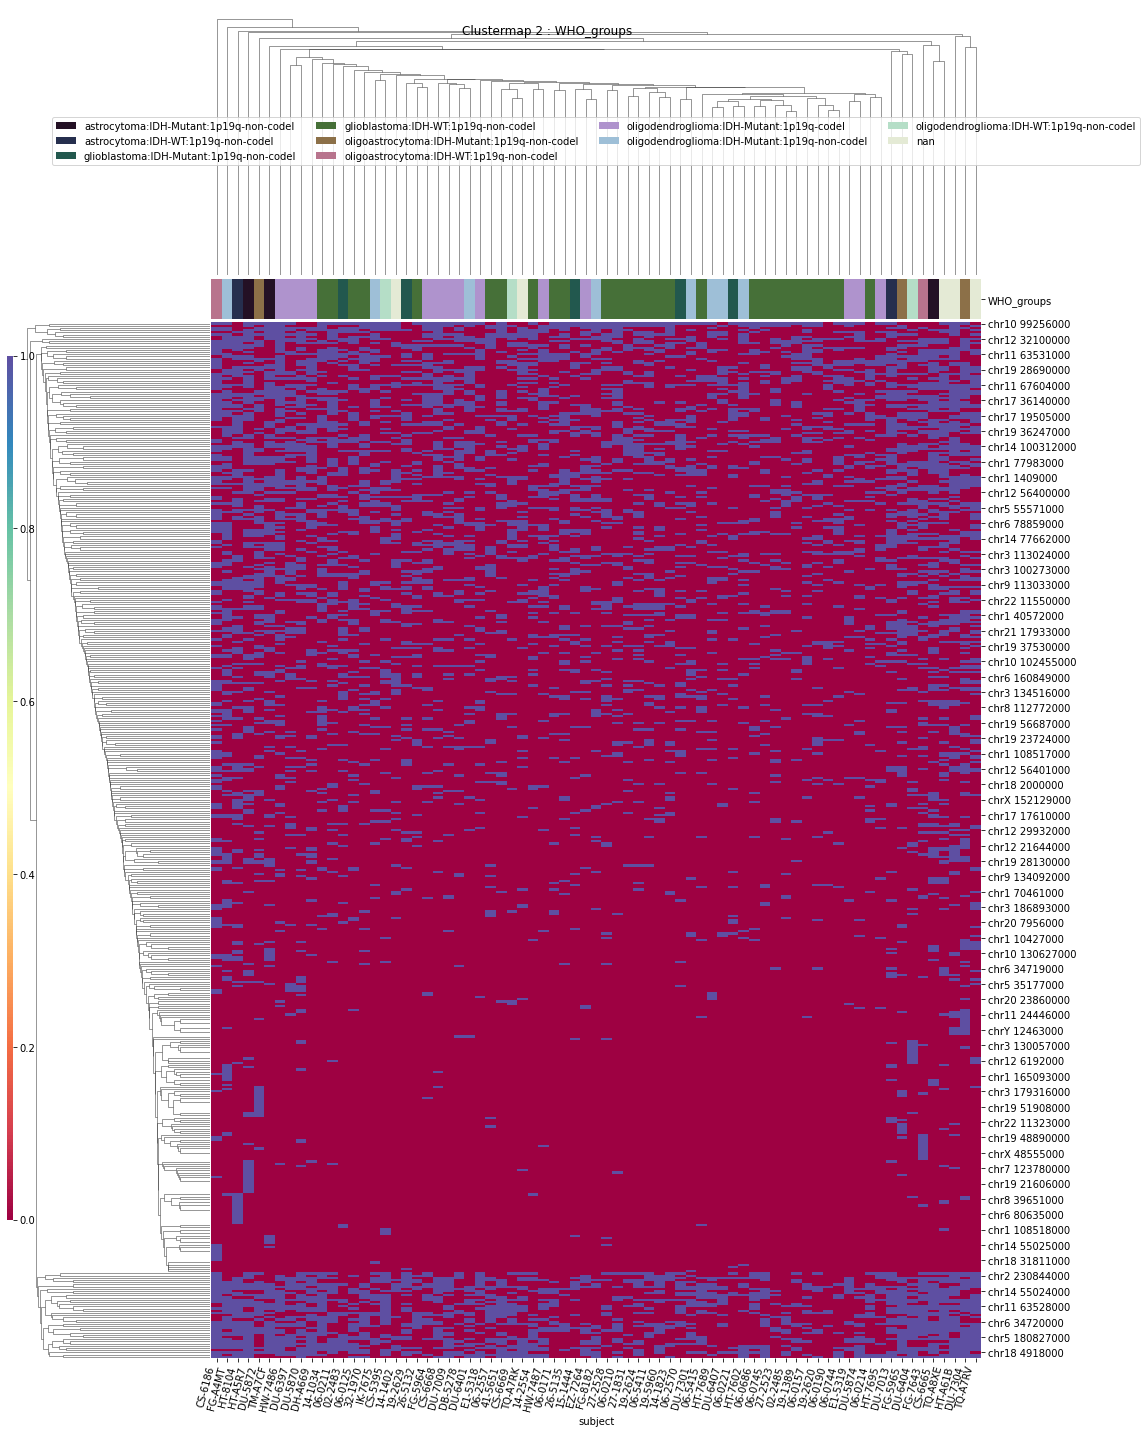

Triple_group
T-Testing
Boxplotting
Clustermapping
['Triple_group' 'chr1 114058000' 'chr1 1409000' 'chr1 1410000'
 'chr1 152456000' 'chr1 155626000' 'chr1 156179000' 'chr1 156181000'
 'chr1 160947000' 'chr1 161016000' 'chr1 161017000' 'chr1 209141000'
 'chr1 224339000' 'chr1 227869000' 'chr1 247015000' 'chr1 247016000'
 'chr1 25587000' 'chr1 29339000' 'chr1 40572000' 'chr1 45513000'
 'chr1 45528000' 'chr1 46320000' 'chr1 52006000' 'chr1 65140000'
 'chr1 66424000' 'chr1 66425000' 'chr1 73129000' 'chr1 89067000'
 'chr10 102391000' 'chr10 26894000' 'chr10 43337000' 'chr10 97416000'
 'chr10 99256000' 'chr11 10392000' 'chr11 118730000' 'chr11 18900000'
 'chr11 24446000' 'chr11 62195000' 'chr11 62368000' 'chr11 62859000'
 'chr11 63527000' 'chr11 67603000' 'chr11 67604000' 'chr11 72164000'
 'chr12 10572000' 'chr12 110570000' 'chr12 123581000' 'chr12 21644000'
 'chr12 32099000' 'chr12 32100000' 'chr12 42329000' 'chr12 51455000'
 'chr12 56401000' 'chr12 59108000' 'chr12 6192000' 'chr12 73009000'

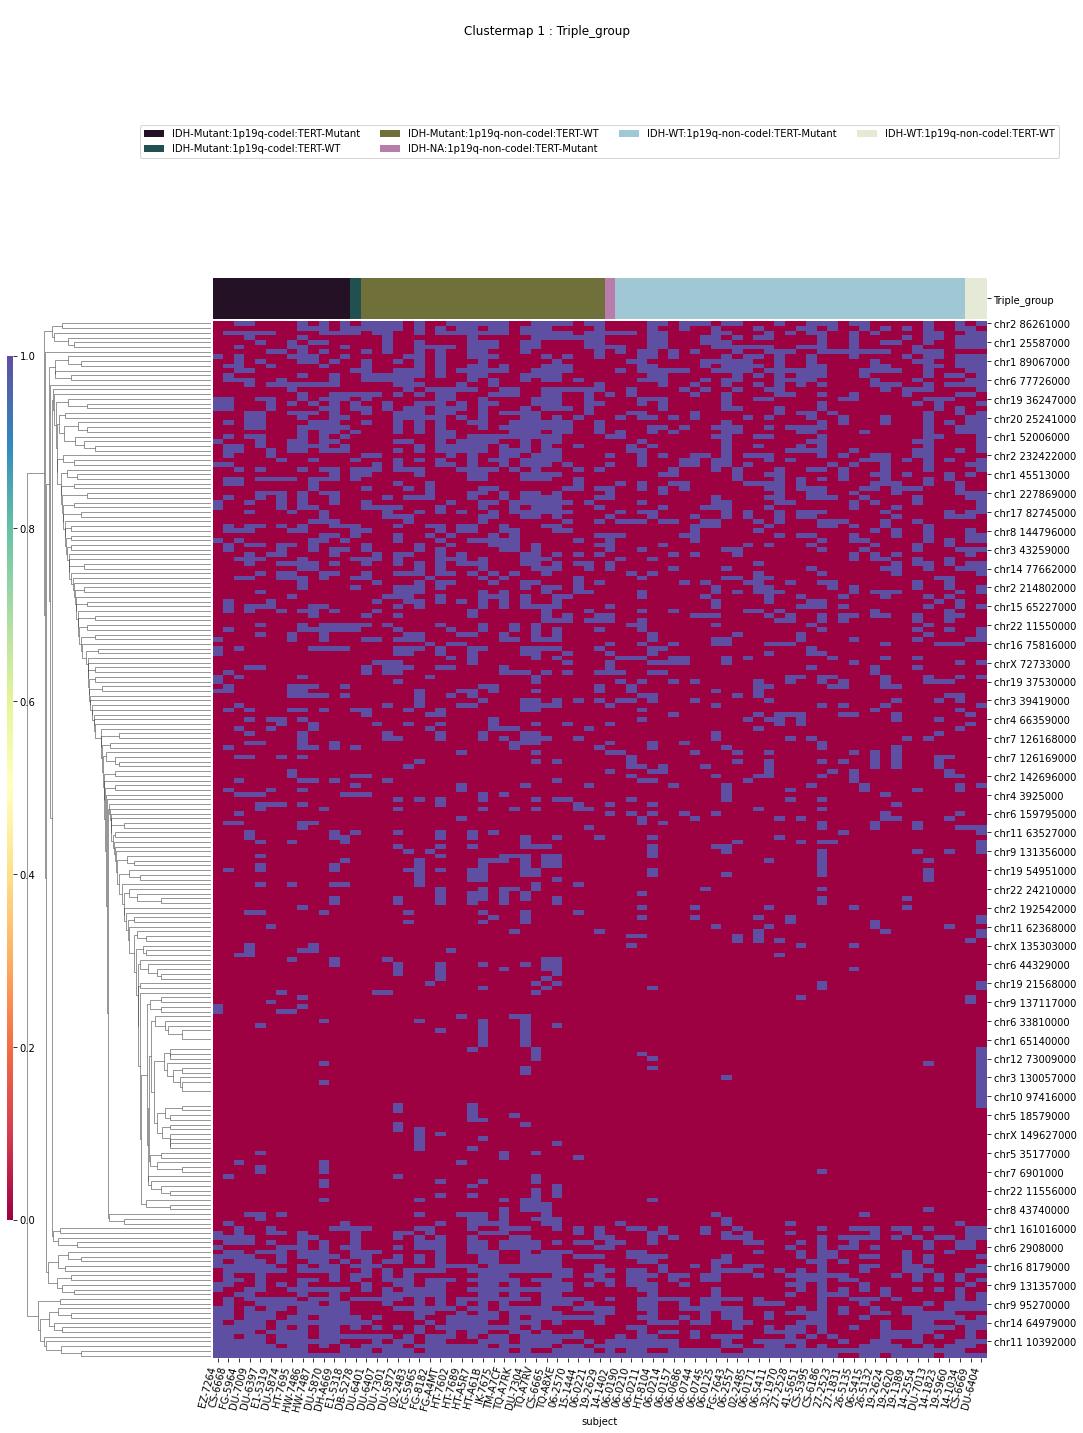

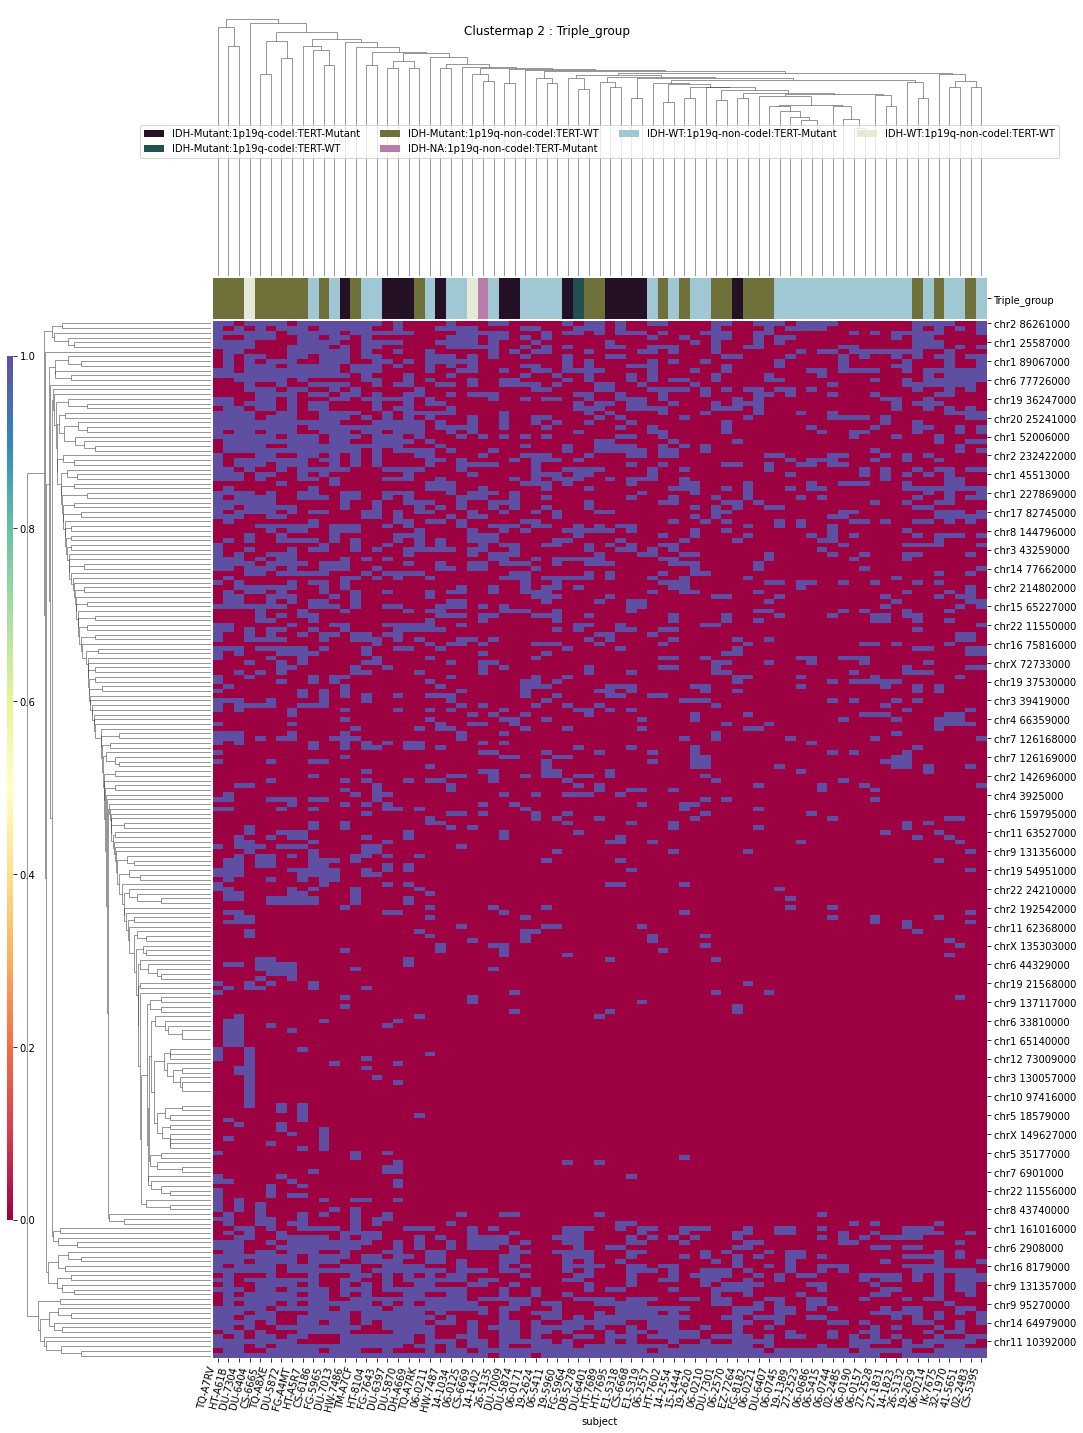

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'chr1 146948000' 'chr1 160690000' 'chr1 45513000' 'chr1 89066000'
 'chr10 43337000' 'chr10 6833000' 'chr11 71767000' 'chr11 72164000'
 'chr12 32099000' 'chr12 32100000' 'chr12 55333000' 'chr12 6885000'
 'chr13 18719000' 'chr15 88540000' 'chr17 54201000' 'chr17 80552000'
 'chr19 37530000' 'chr19 39689000' 'chr19 52043000' 'chr2 201139000'
 'chr2 228363000' 'chr2 231577000' 'chr20 7957000' 'chr21 17695000'
 'chr22 18947000' 'chr22 24211000' 'chr3 186887000' 'chr3 189252000'
 'chr3 47259000' 'chr3 47260000' 'chr3 5081000' 'chr5 4925000'
 'chr5 55571000' 'chr6 44328000' 'chr6 44329000' 'chr6 93173000'
 'chr7 158236000' 'chr7 2390000' 'chr7 27742000' 'chr8 143288000'
 'chr8 143832000' 'chr8 144796000' 'chr8 54032000' 'chr9 131356000'
 'chrX 125780000' 'chrY 6748000' 'subject']


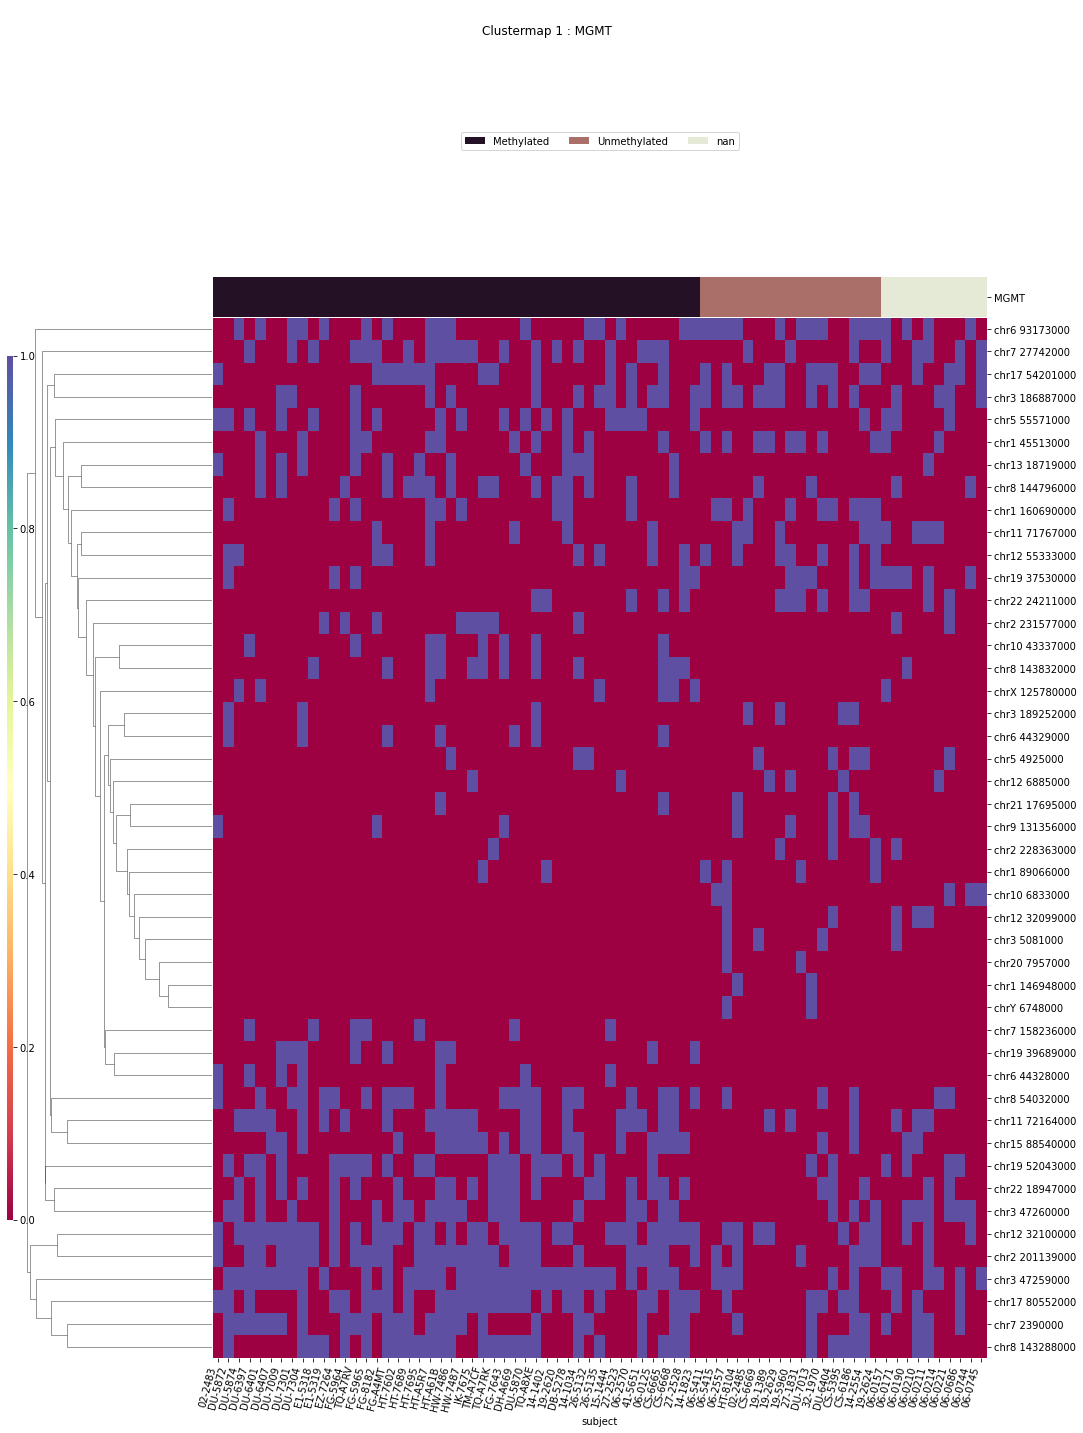

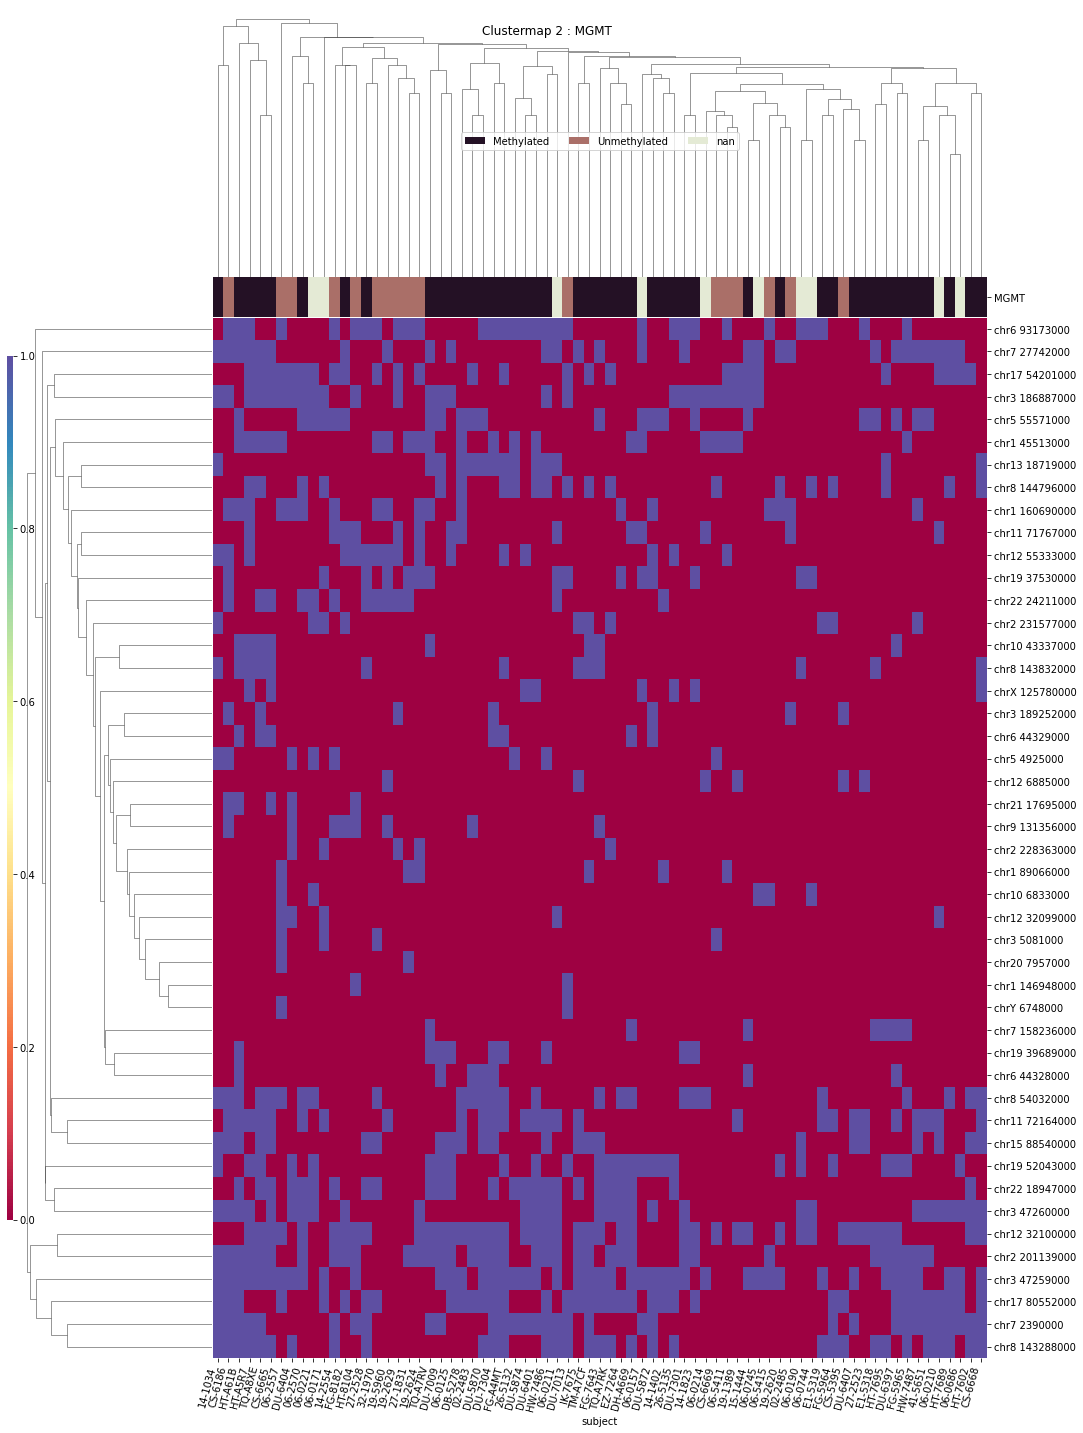

gender1
T-Testing
Boxplotting
Clustermapping
['chr1 111259000' 'chr1 159767000' 'chr1 209141000' 'chr1 246082000'
 'chr1 29360000' 'chr10 6833000' 'chr10 68525000' 'chr11 67604000'
 'chr12 10572000' 'chr12 6885000' 'chr12 93075000' 'chr13 19600000'
 'chr13 43041000' 'chr14 64978000' 'chr14 77795000' 'chr15 28184000'
 'chr15 65227000' 'chr16 35204000' 'chr16 74799000' 'chr17 30701000'
 'chr19 20466000' 'chr19 36234000' 'chr19 52043000' 'chr19 52044000'
 'chr20 23861000' 'chr20 35263000' 'chr20 7956000' 'chr21 17933000'
 'chr21 41421000' 'chr22 23907000' 'chr3 100272000' 'chr3 100336000'
 'chr3 100667000' 'chr3 101704000' 'chr3 127412000' 'chr3 195928000'
 'chr3 43259000' 'chr3 47259000' 'chr4 160658000' 'chr4 165073000'
 'chr5 120195000' 'chr5 35176000' 'chr6 134659000' 'chr6 34720000'
 'chr6 73805000' 'chr6 77716000' 'chr6 78858000' 'chr7 101150000'
 'chr7 2390000' 'chr7 4600000' 'chr8 112772000' 'chr8 119917000'
 'chr8 143288000' 'chr8 143832000' 'chr8 47176000' 'chr8 57199000'
 'chr8

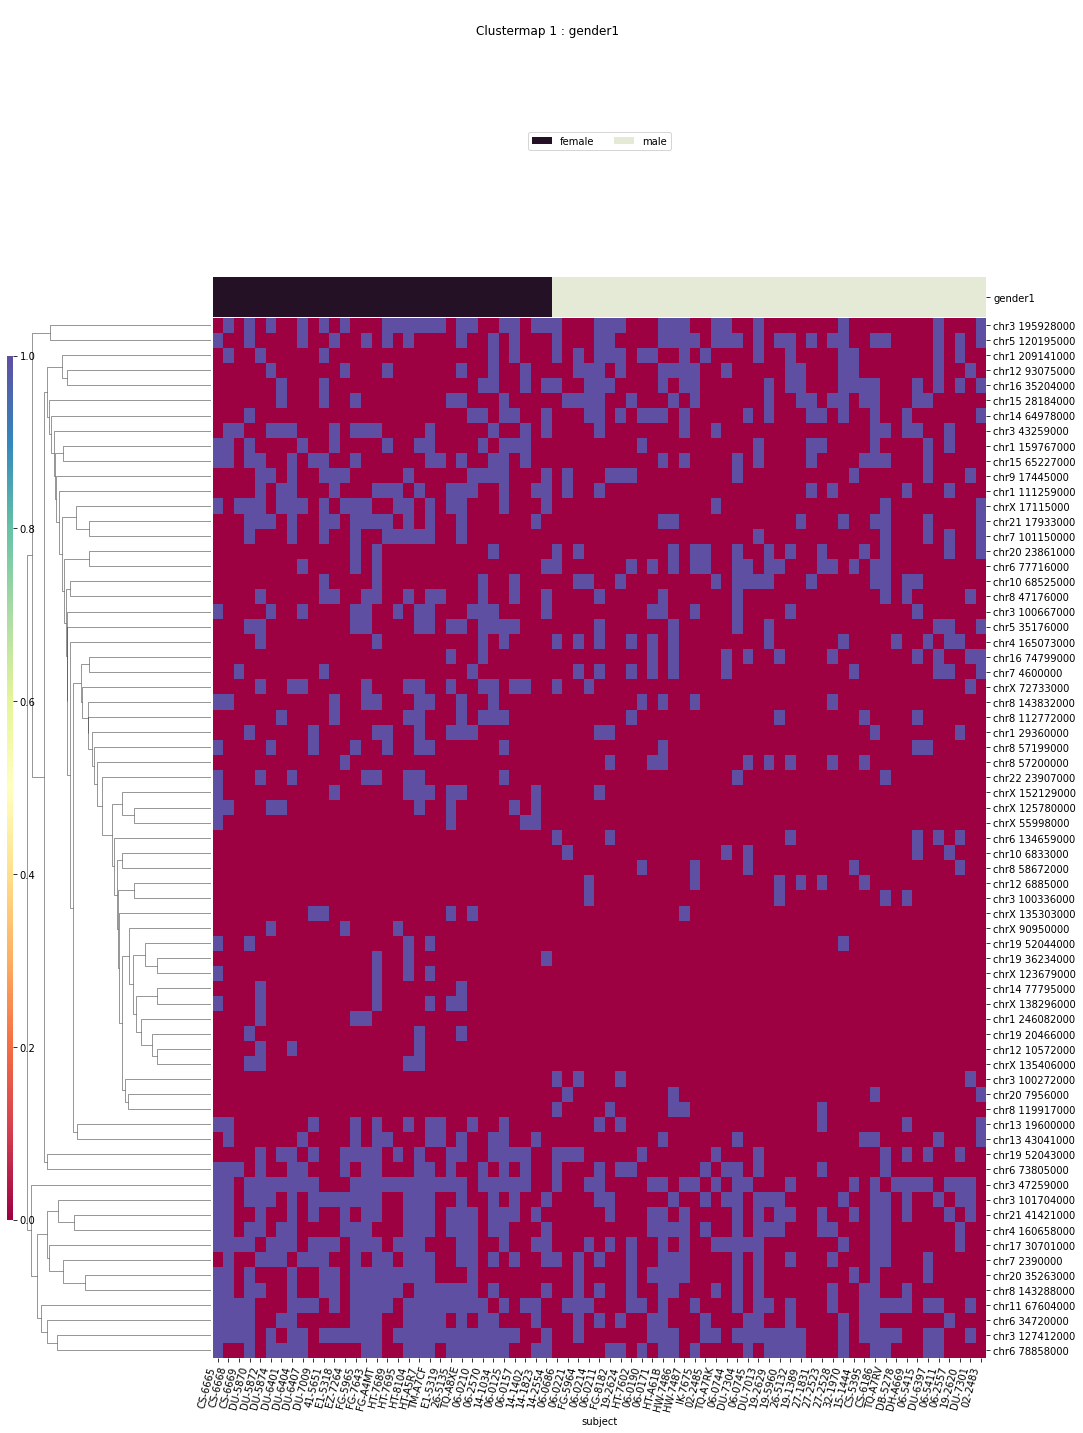

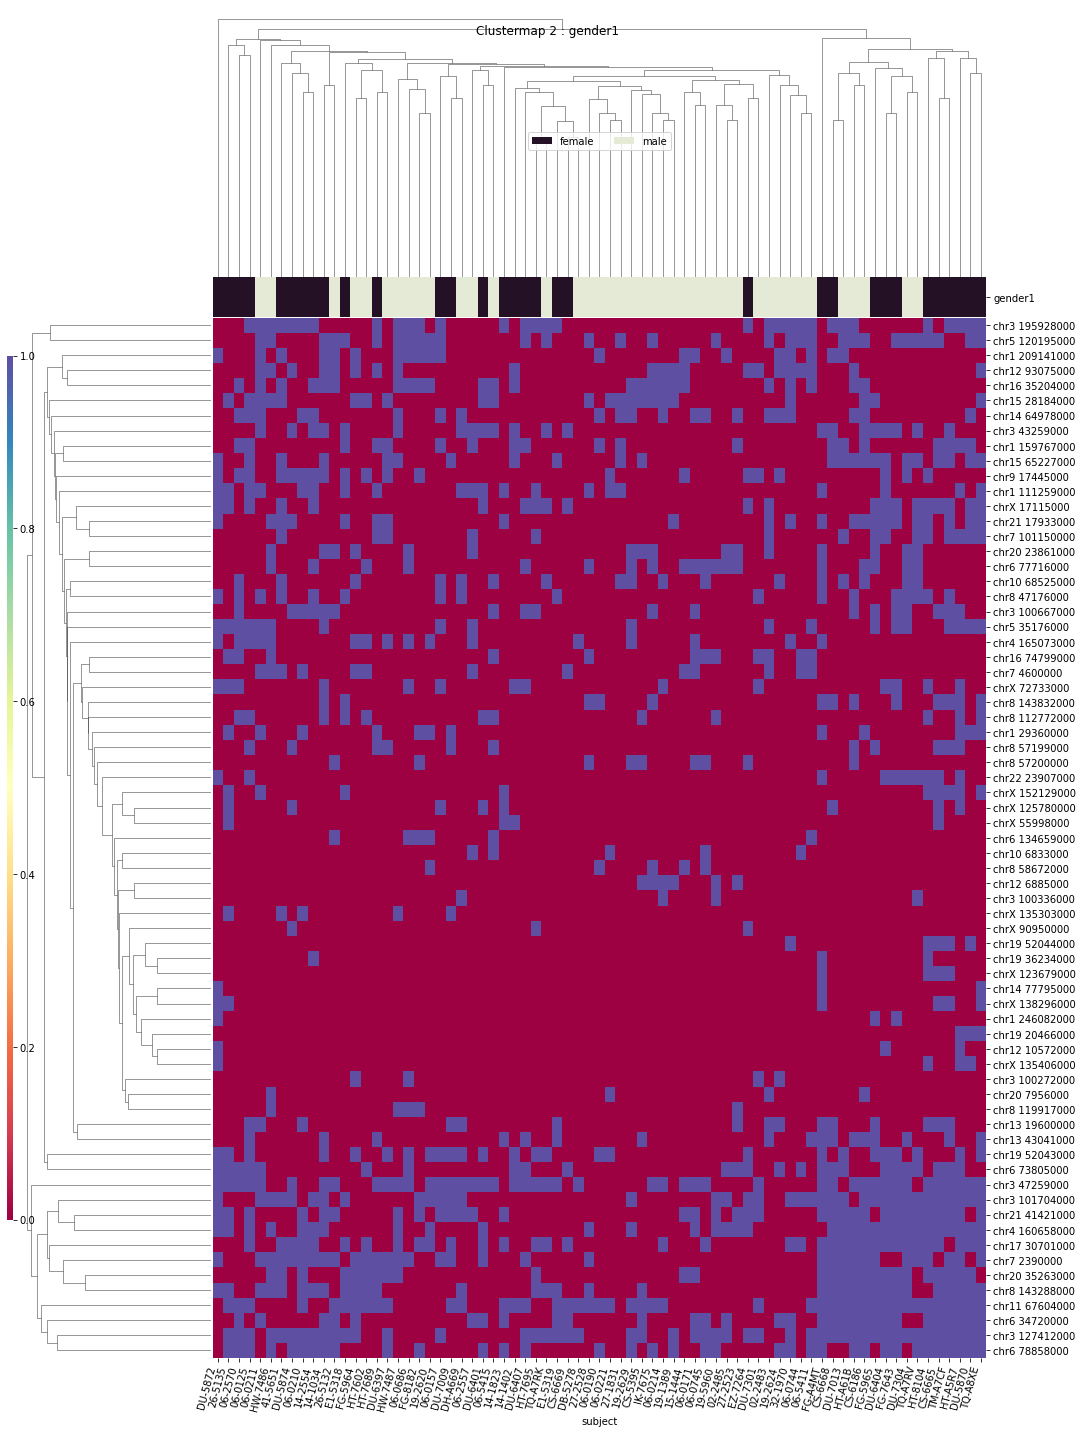

In [116]:
for column in ['race','ethnicity','primary_diagnosis','IDH','x1p19q','TERT','disease_type',
               'IDH_1p19q_status','WHO_groups','Triple_group','MGMT','gender1']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [117]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210526 08:23:02'

race
T-Testing
Boxplotting
Clustermapping
['chr1 227868000' 'chr1 33063000' 'chr1 66591000' 'chr11 62326000'
 'chr12 43919000' 'chr15 75871000' 'chr19 51908000' 'chr19 53838000'
 'chr19 58015000' 'chr3 189252000' 'chr3 196944000' 'chr6 125776000'
 'chr6 131478000' 'chr6 25999000' 'chr9 134715000' 'chrY 7179000' 'race'
 'subject']


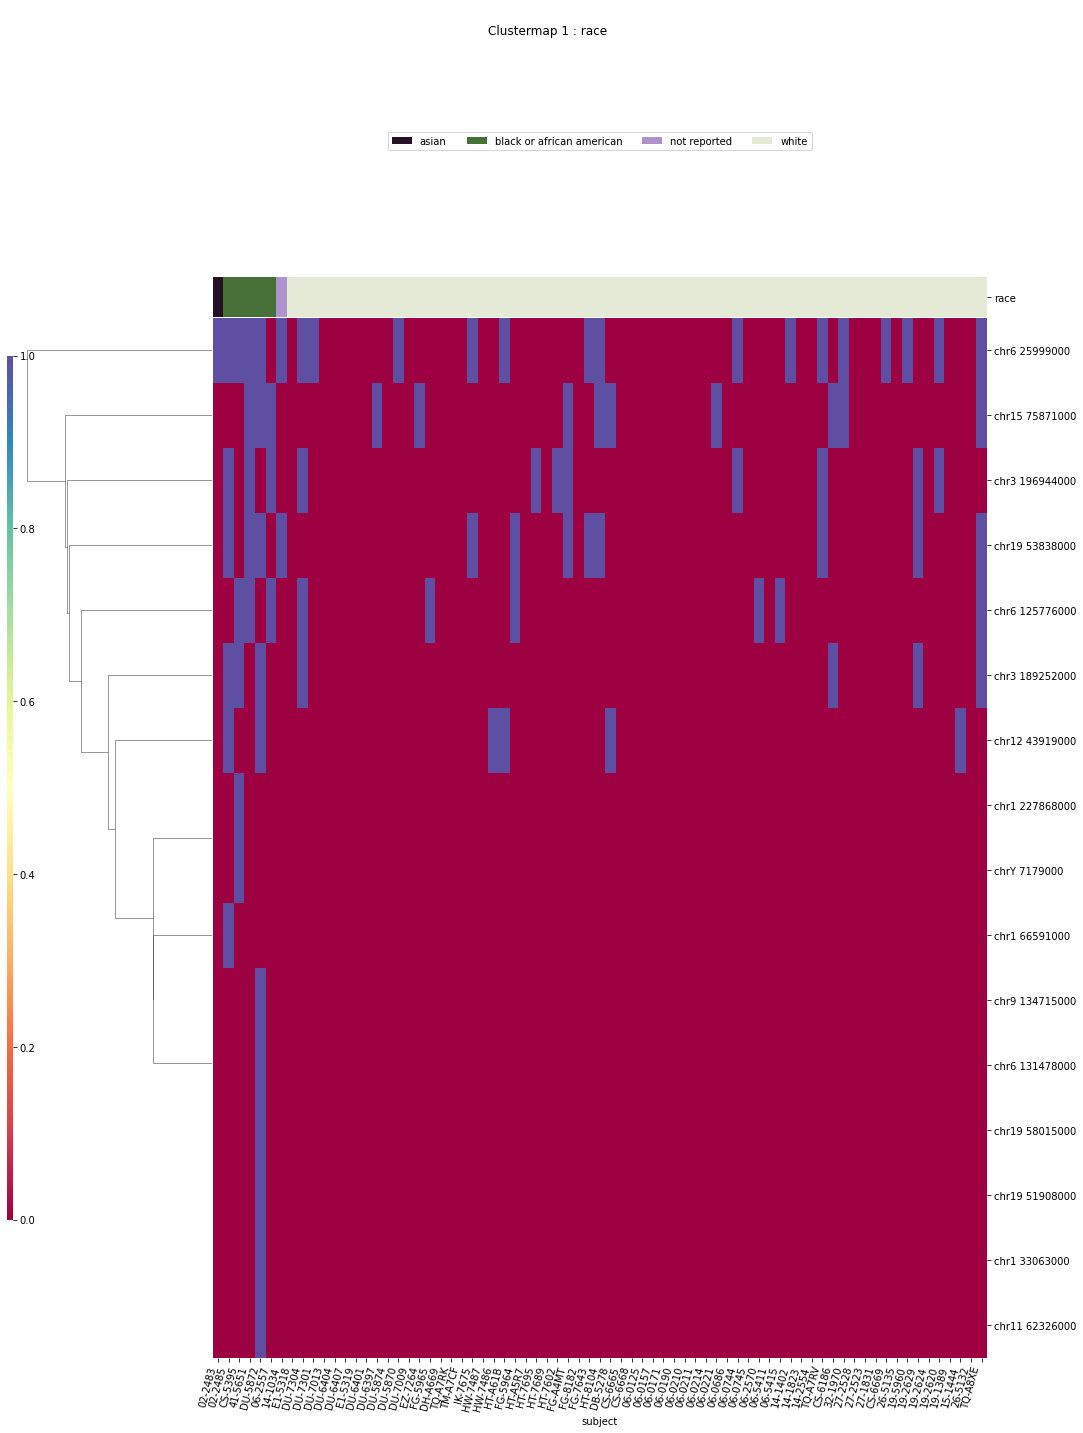

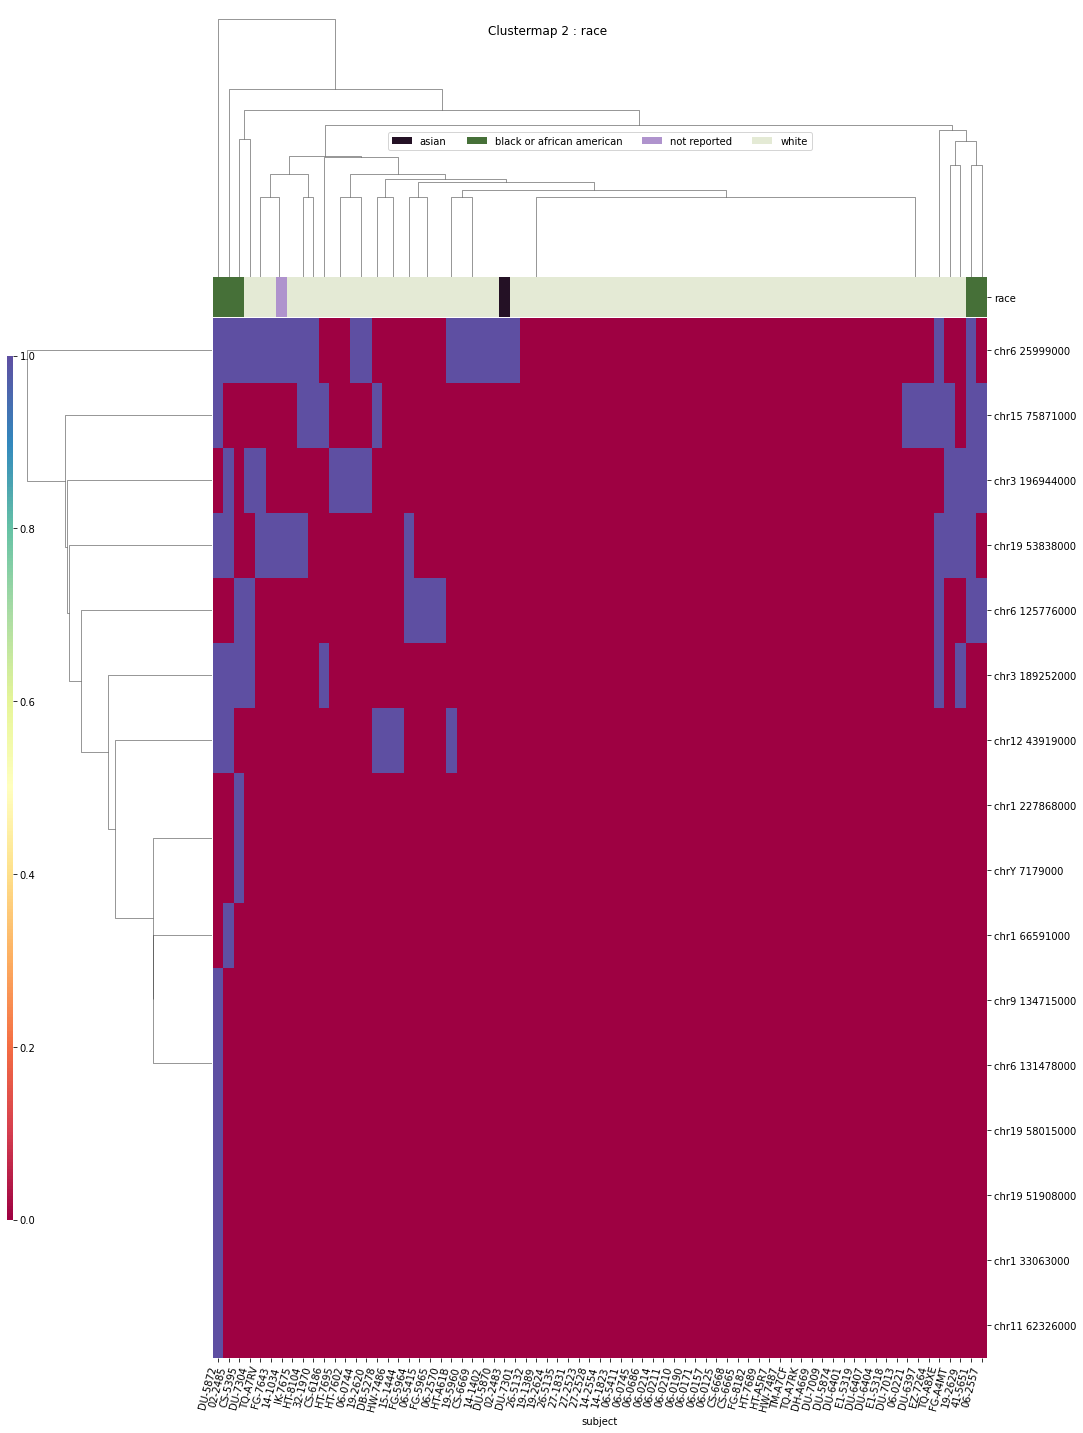

ethnicity
T-Testing
Boxplotting
Clustermapping
['chr1 10029000' 'chr1 108518000' 'chr1 111360000' 'chr1 227868000'
 'chr1 247016000' 'chr1 52006000' 'chr1 9001000' 'chr1 93277000'
 'chr10 86032000' 'chr11 118730000' 'chr11 62356000' 'chr11 62858000'
 'chr15 100773000' 'chr16 8179000' 'chr17 30564000' 'chr17 43355000'
 'chr17 82745000' 'chr18 46088000' 'chr19 21568000' 'chr19 21776000'
 'chr19 53443000' 'chr19 53838000' 'chr2 30614000' 'chr2 38277000'
 'chr2 39322000' 'chr2 55279000' 'chr22 11556000' 'chr22 18947000'
 'chr22 24210000' 'chr22 42750000' 'chr3 186893000' 'chr3 5081000'
 'chr4 164995000' 'chr4 179554000' 'chr4 550000' 'chr4 62940000'
 'chr4 6836000' 'chr5 169996000' 'chr5 181267000' 'chr5 18579000'
 'chr5 43078000' 'chr5 4925000' 'chr6 125775000' 'chr6 151456000'
 'chr6 160849000' 'chr6 25999000' 'chr6 2909000' 'chr6 32779000'
 'chr7 158980000' 'chr9 134714000' 'chr9 69764000' 'chrX 113990000'
 'chrX 145721000' 'chrX 55998000' 'chrY 7179000' 'ethnicity' 'subject']


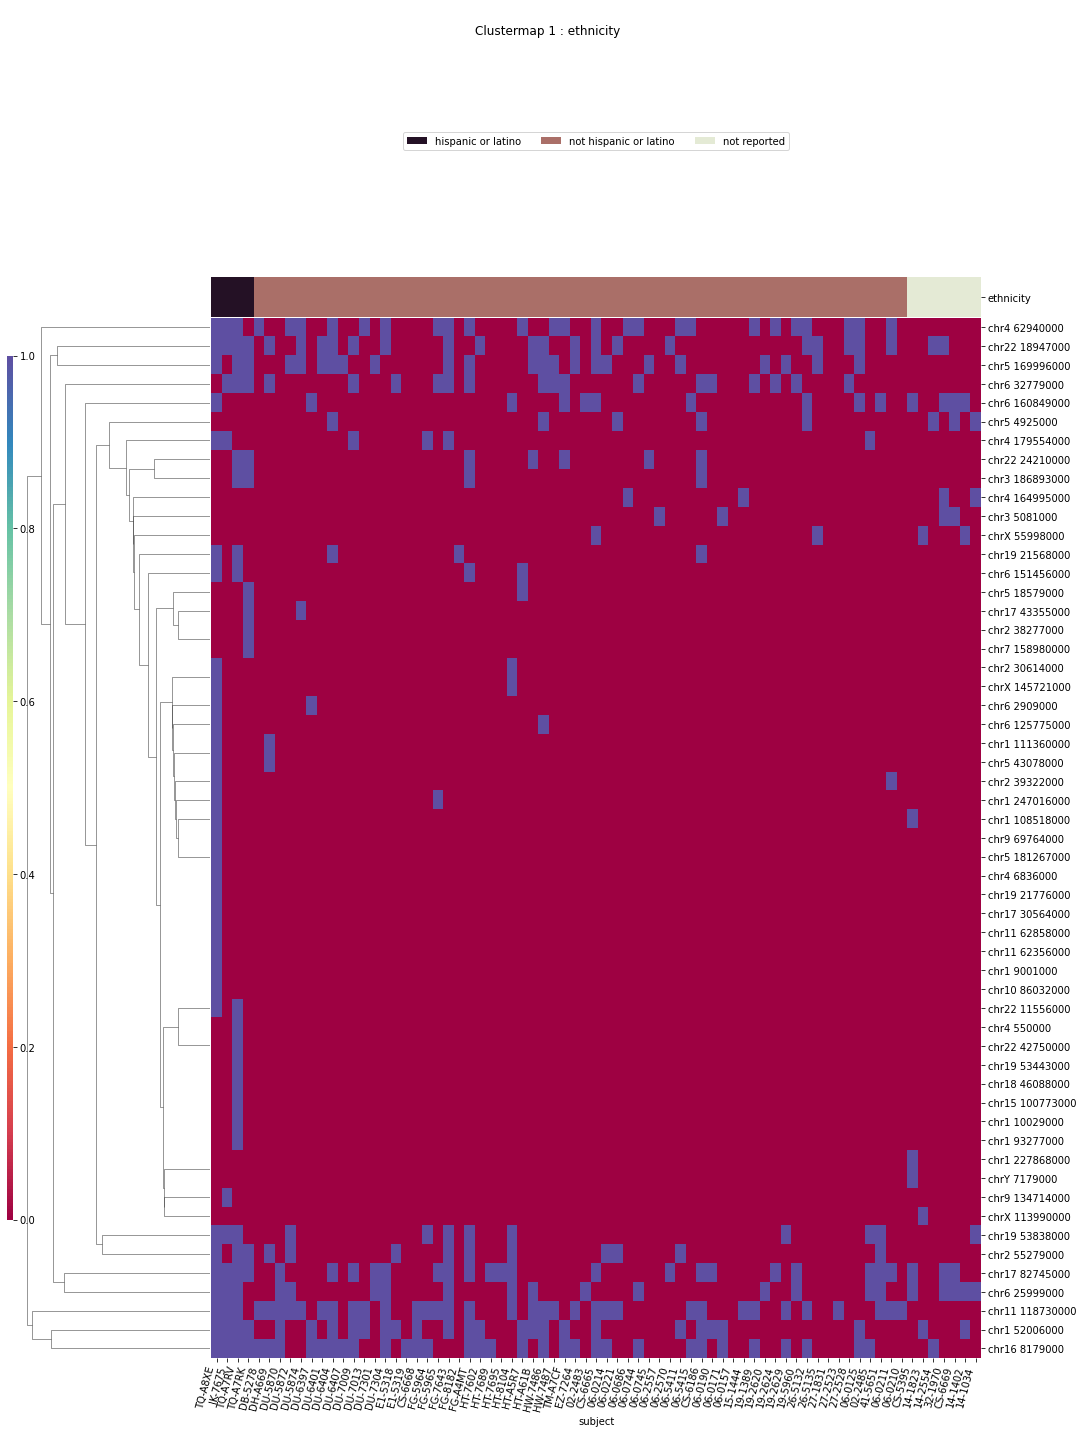

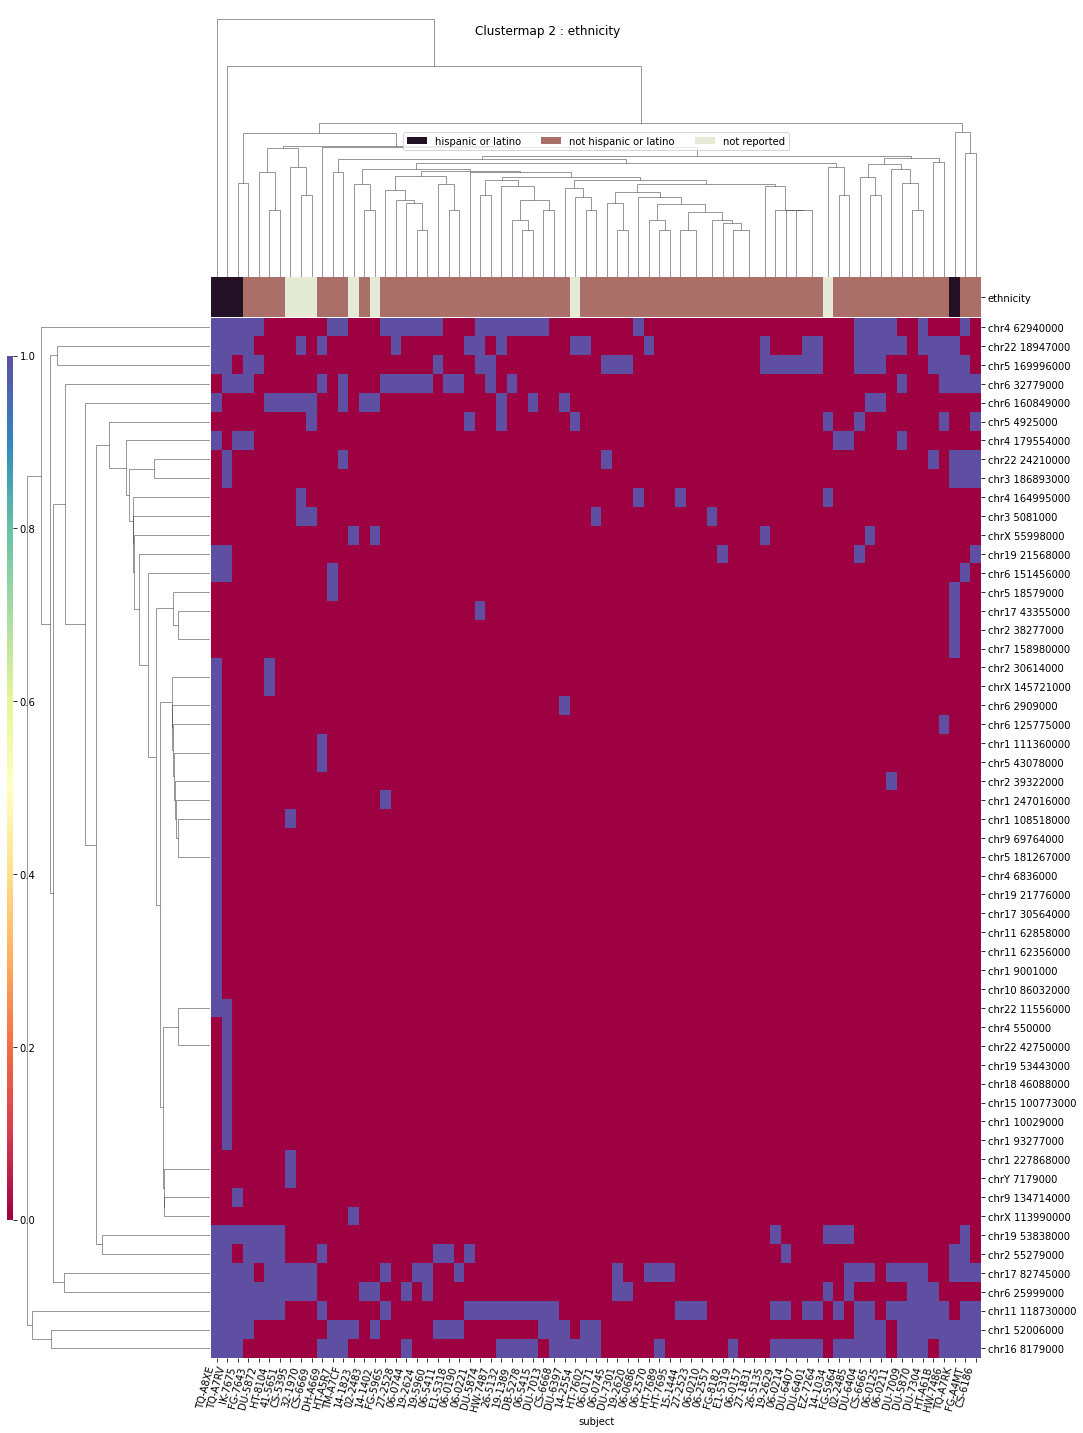

primary_diagnosis
T-Testing
Boxplotting
Clustermapping
['chr1 10029000' 'chr1 104135000' 'chr1 111360000' 'chr1 1410000'
 'chr1 145932000' 'chr1 146948000' 'chr1 147106000' 'chr1 147107000'
 'chr1 147240000' 'chr1 152456000' 'chr1 155626000' 'chr1 156179000'
 'chr1 156181000' 'chr1 227869000' 'chr1 246082000' 'chr1 29339000'
 'chr1 48174000' 'chr1 52006000' 'chr1 52007000' 'chr1 65140000'
 'chr1 66425000' 'chr1 70461000' 'chr1 73130000' 'chr1 75377000'
 'chr1 77983000' 'chr1 86899000' 'chr1 89066000' 'chr1 93277000'
 'chr1 99836000' 'chr10 102391000' 'chr10 130627000' 'chr10 41713000'
 'chr10 43337000' 'chr10 65409000' 'chr10 65410000' 'chr10 97416000'
 'chr11 10391000' 'chr11 18900000' 'chr11 24446000' 'chr11 60714000'
 'chr11 62194000' 'chr11 62195000' 'chr11 62859000' 'chr11 63527000'
 'chr11 67604000' 'chr12 10572000' 'chr12 123581000' 'chr12 21644000'
 'chr12 29933000' 'chr12 32099000' 'chr12 32100000' 'chr12 42329000'
 'chr12 4721000' 'chr12 56401000' 'chr12 58336000' 'chr12 5910

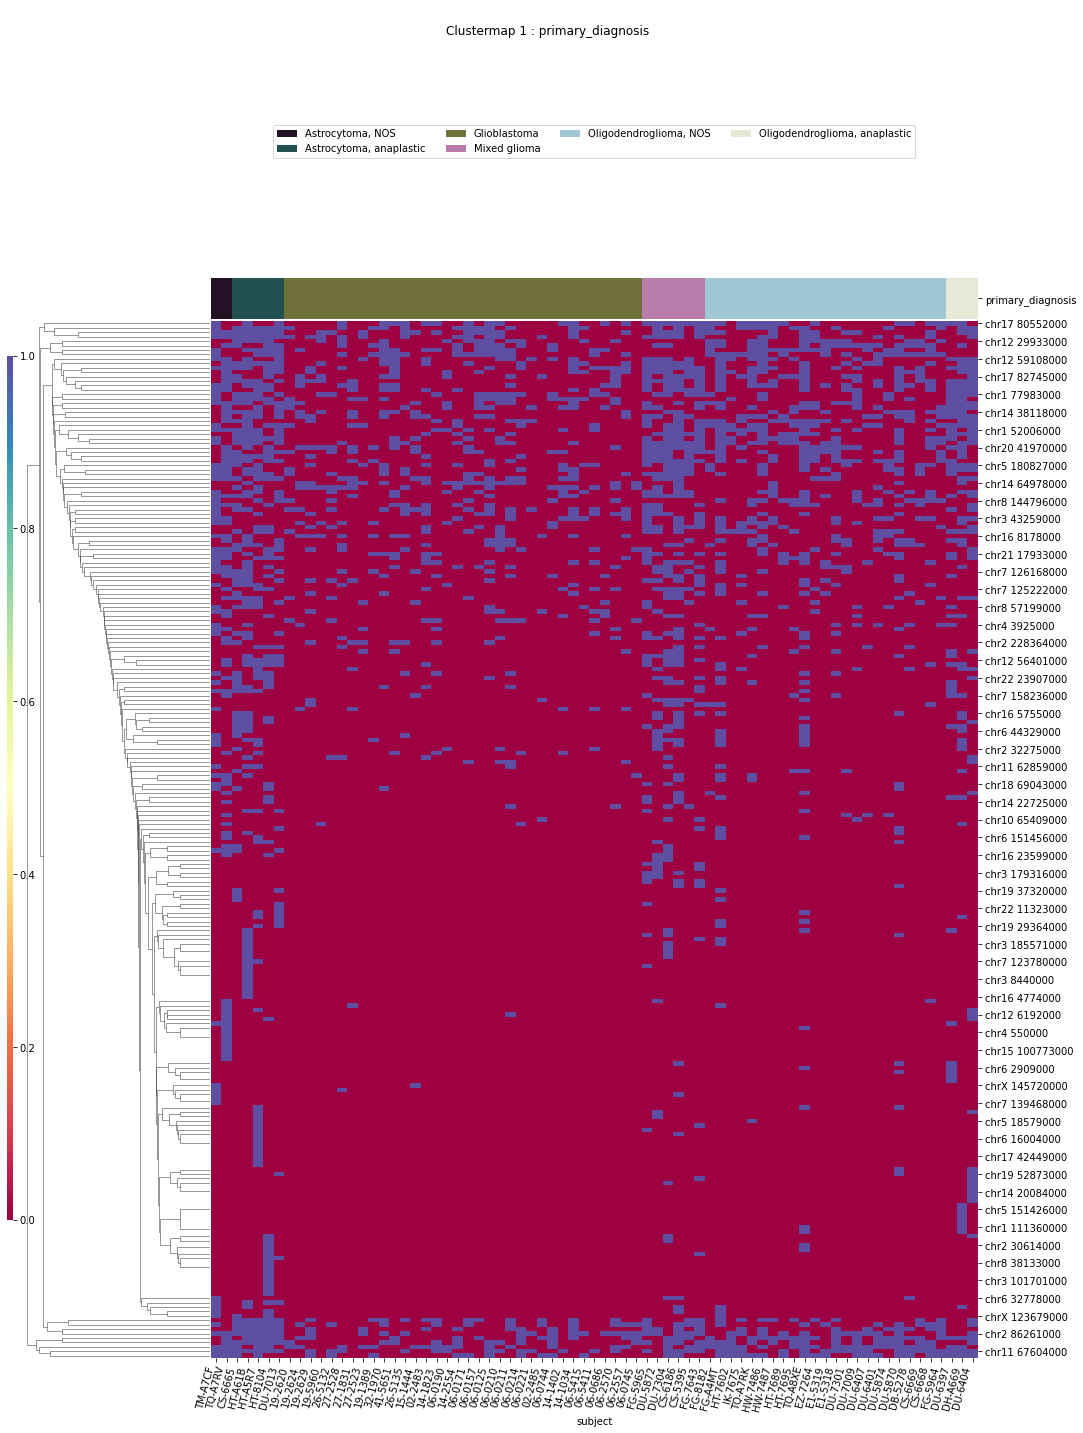

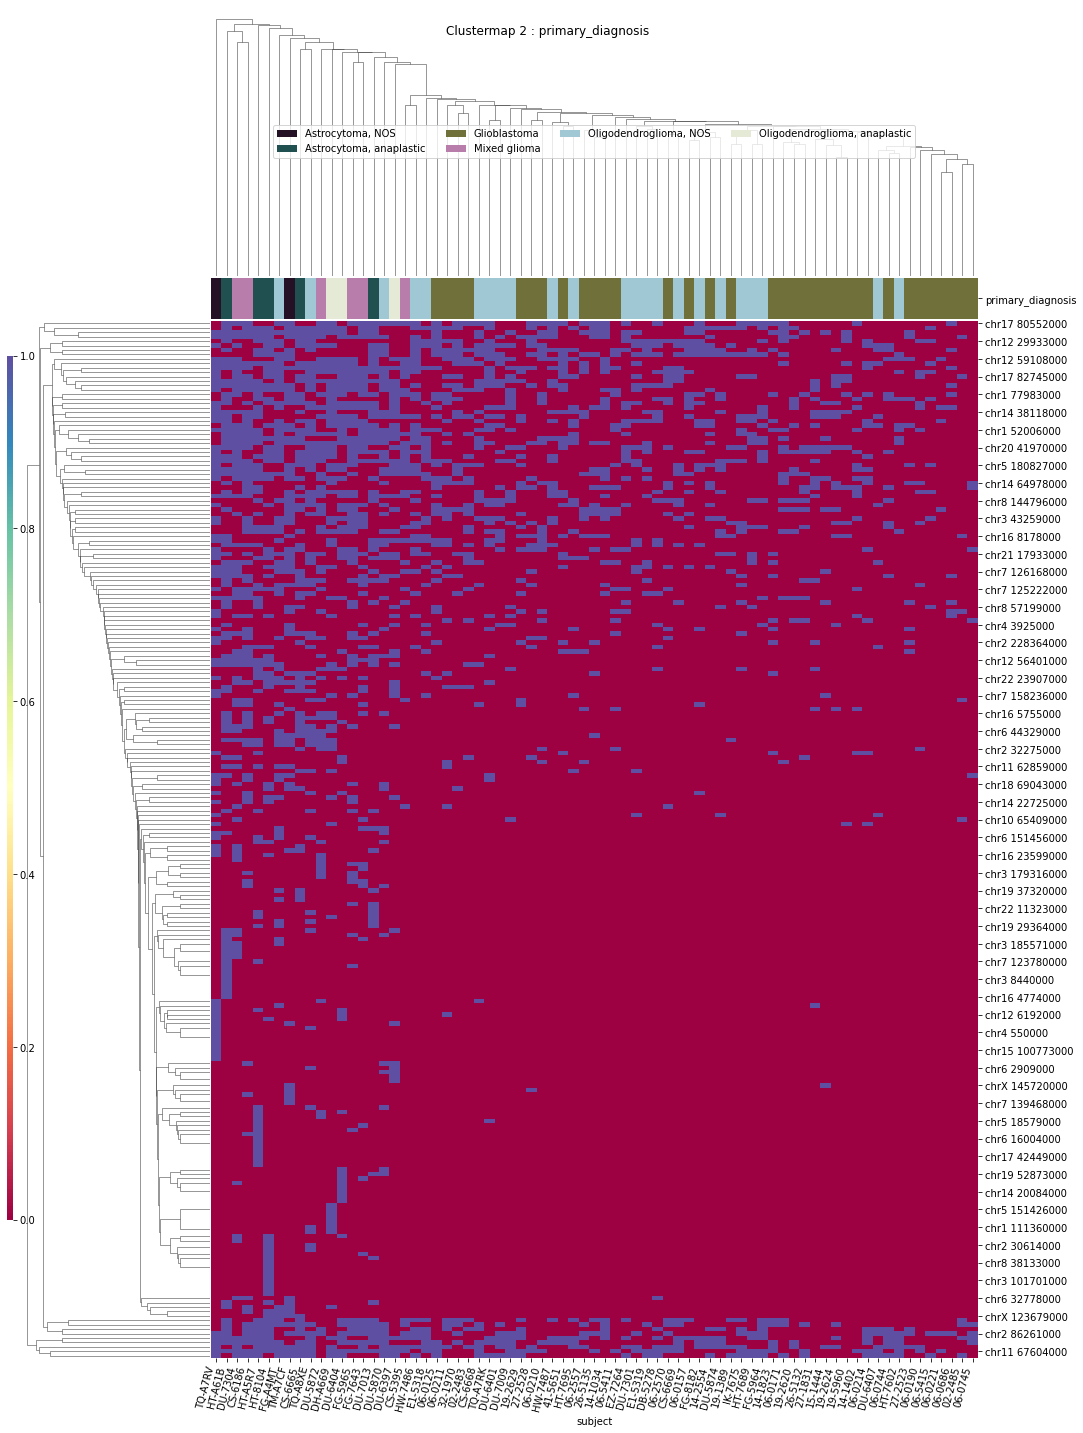

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr1 155626000' 'chr1 156179000' 'chr16 8179000' 'chr19 37530000'
 'chr2 201139000' 'chr6 44328000' 'chr6 44329000' 'chr7 158236000'
 'chr8 54032000' 'chr9 31632000' 'subject']


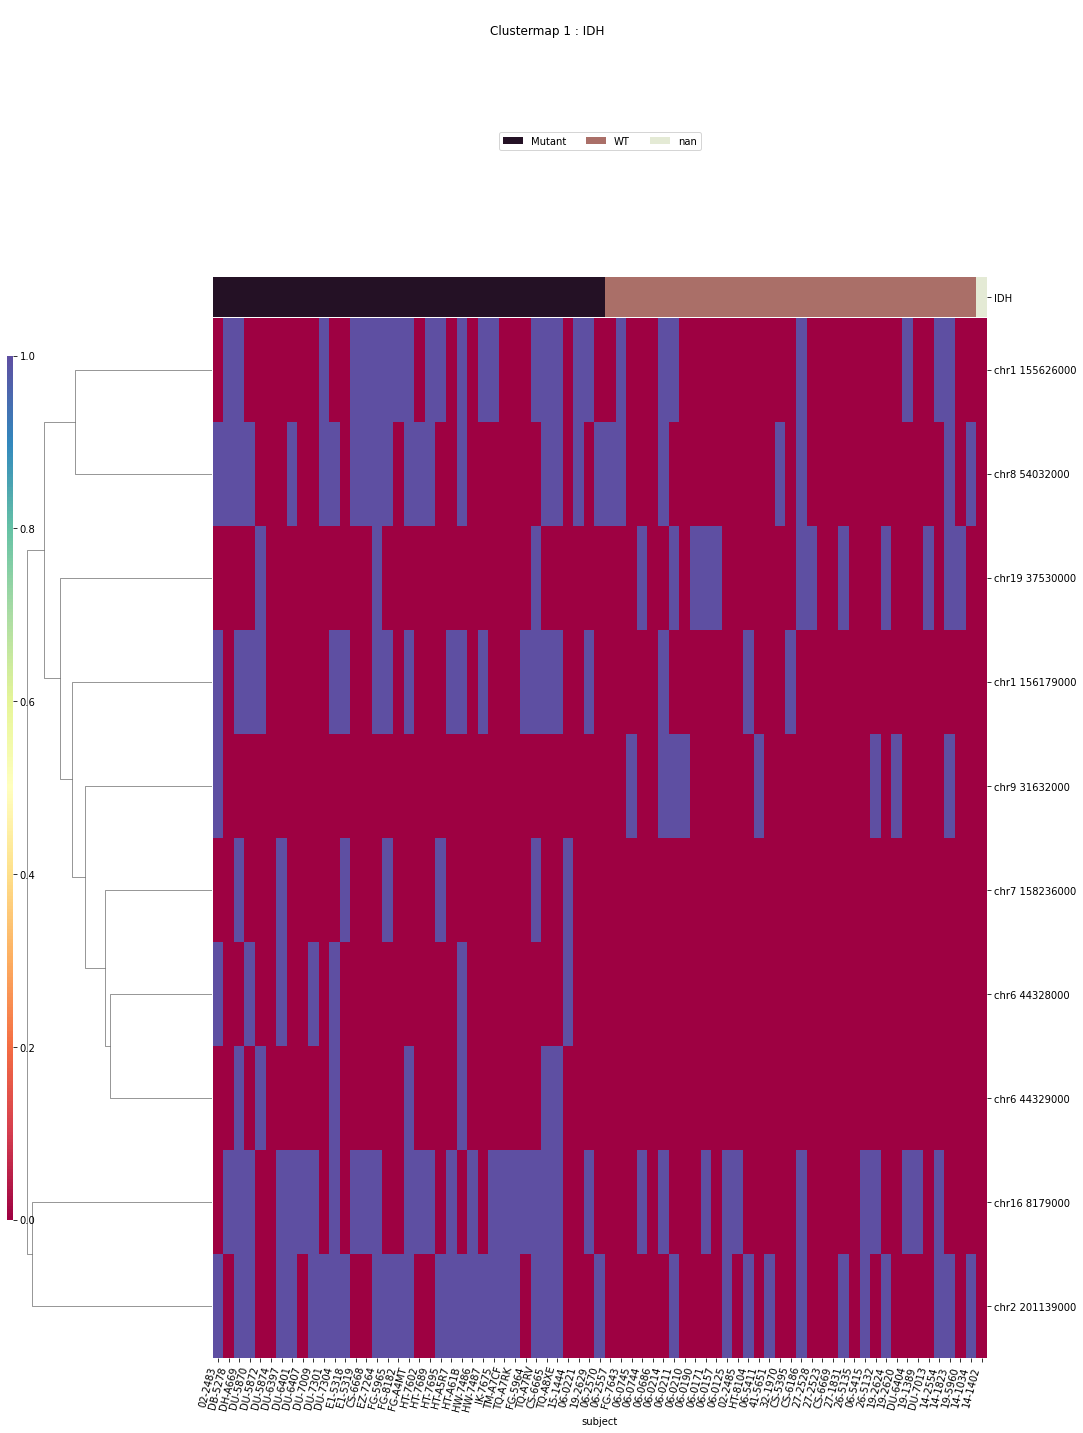

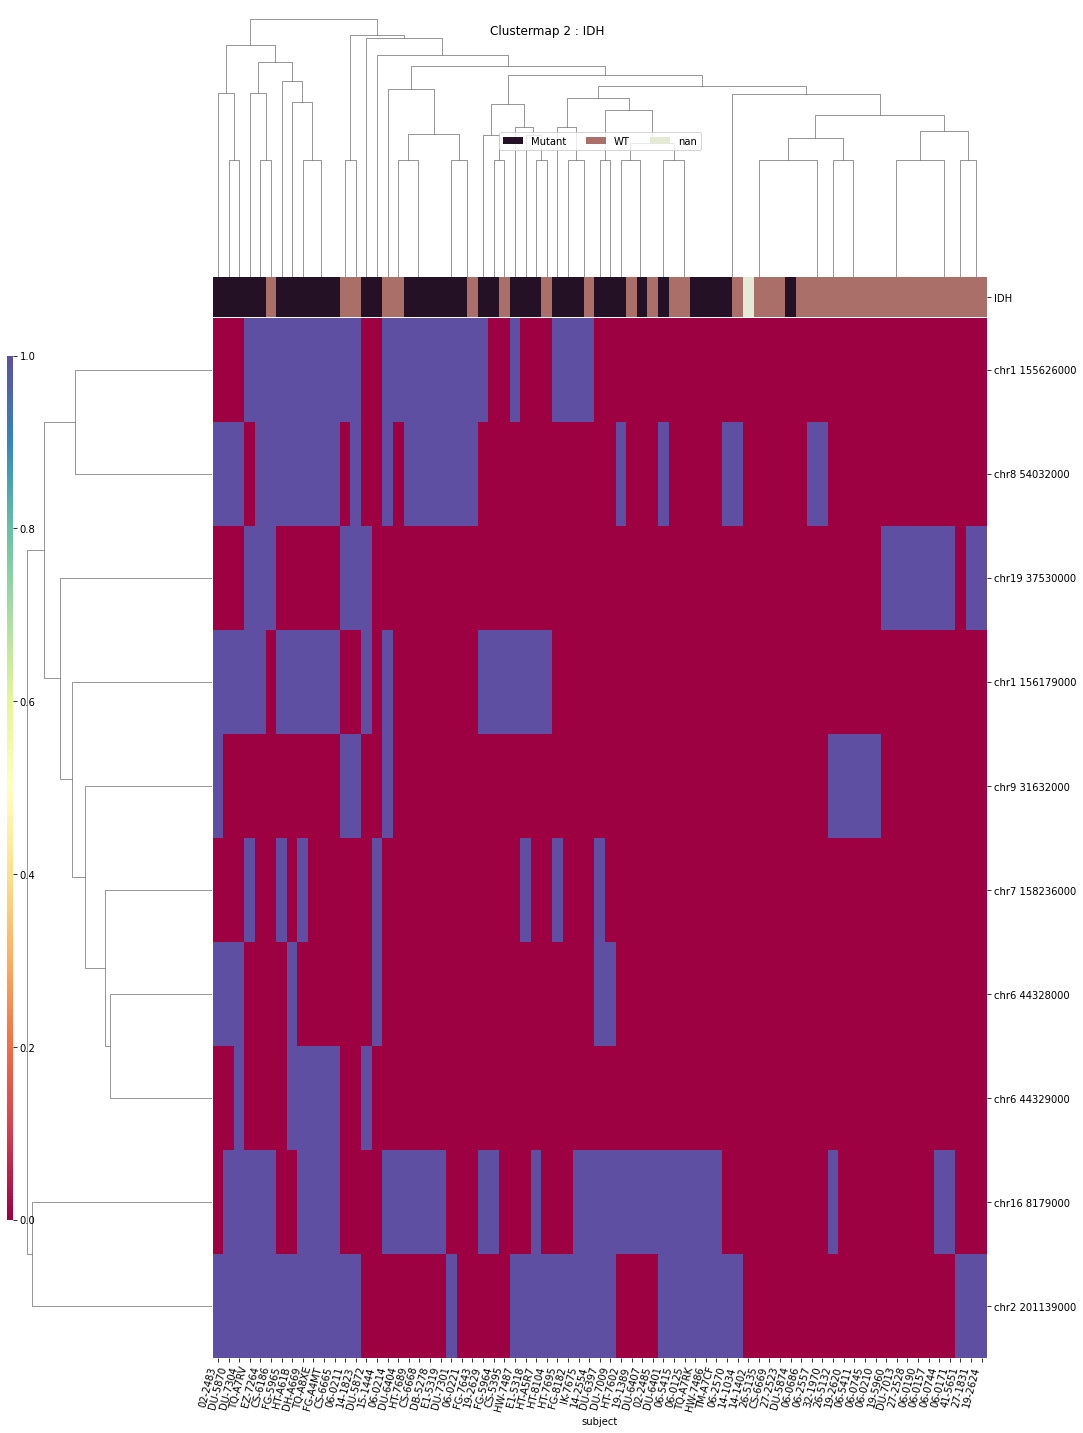

x1p19q
T-Testing
Boxplotting
Clustermapping
['chr1 152456000' 'chr14 38118000' 'chr14 64979000' 'chr17 68604000'
 'chr19 53460000' 'chr4 3925000' 'chr5 100983000' 'chr7 158236000'
 'chrX 90950000' 'subject' 'x1p19q']


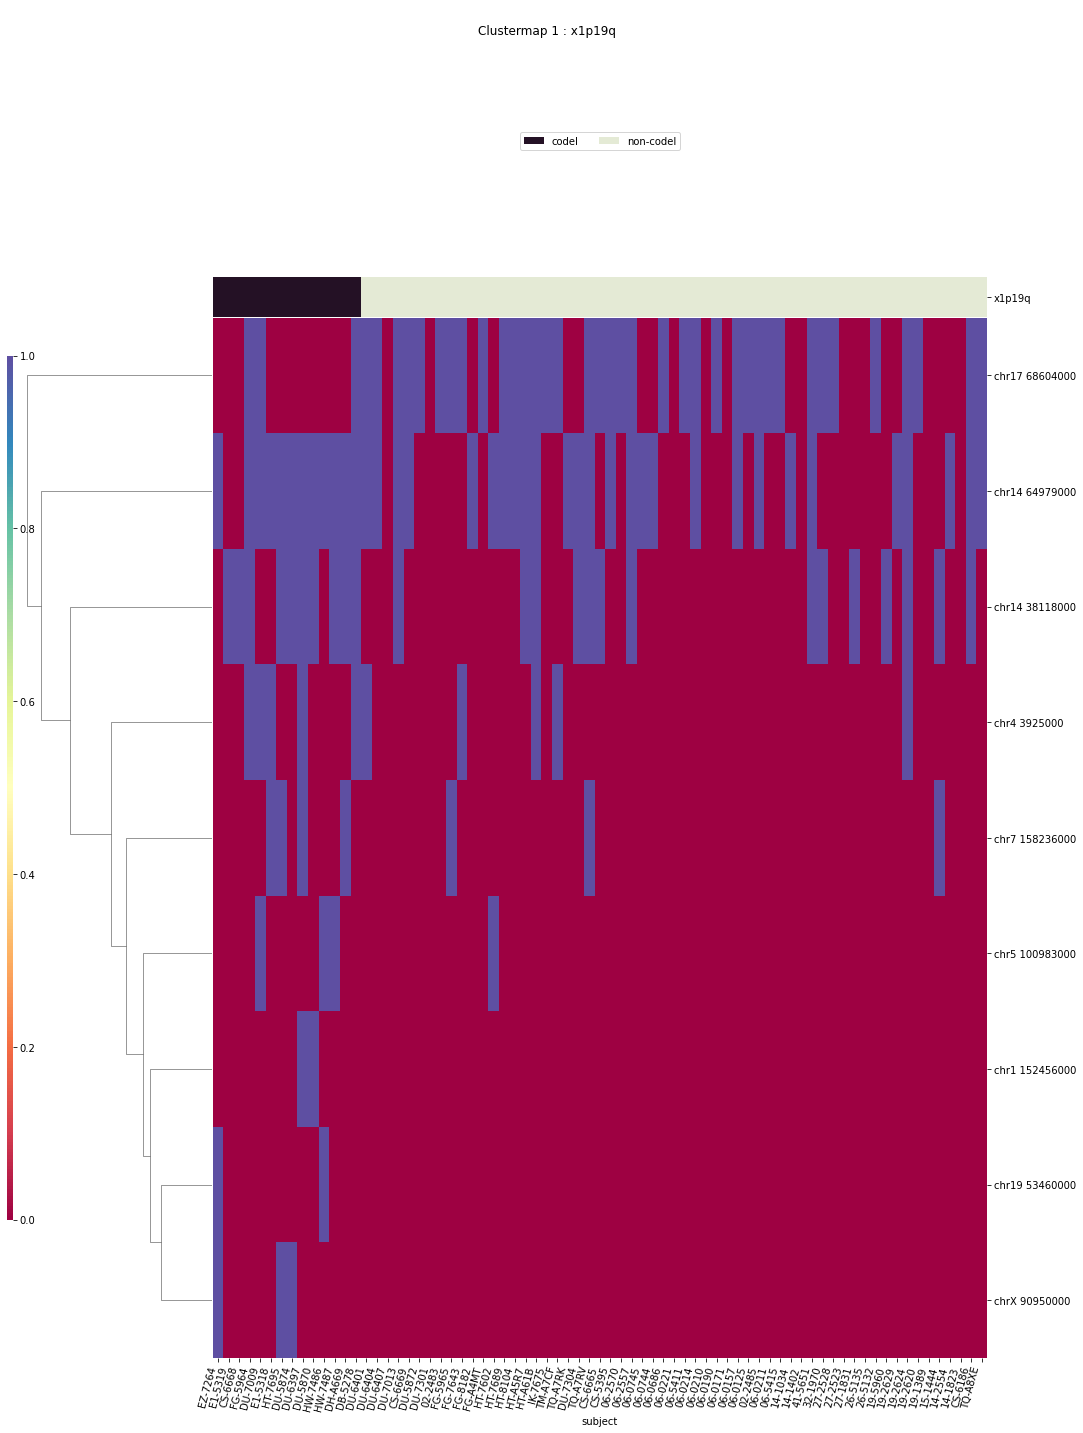

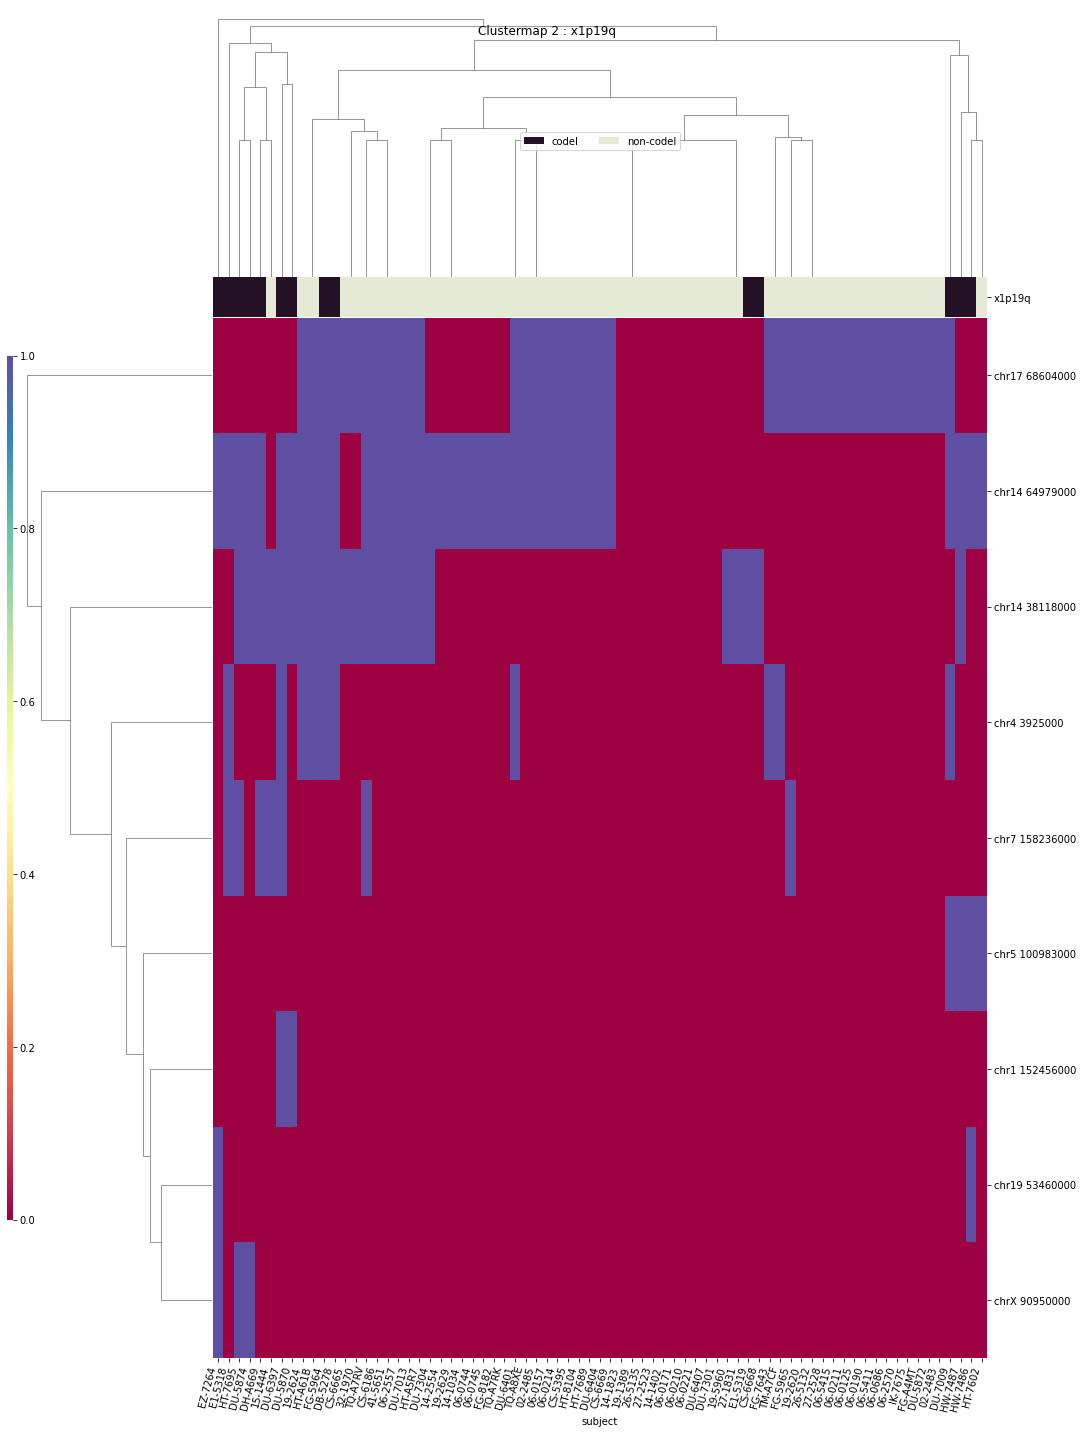

TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'chr17 54201000' 'chr6 151456000' 'chr6 44329000'
 'chrUn_GL000219v1 176000' 'subject']


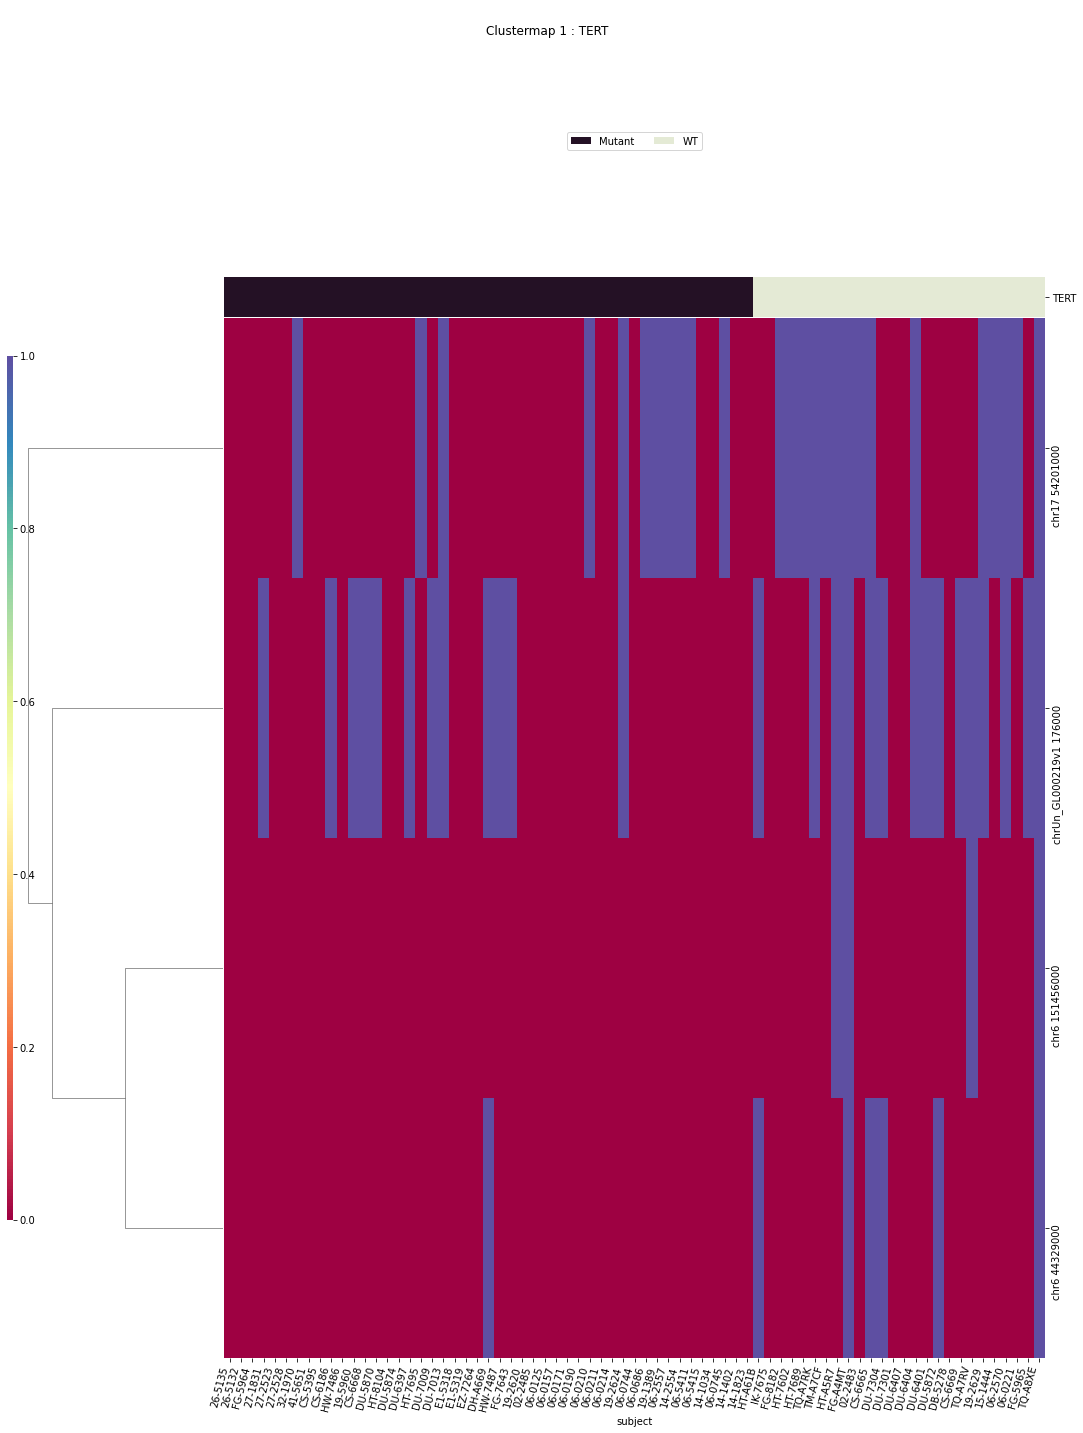

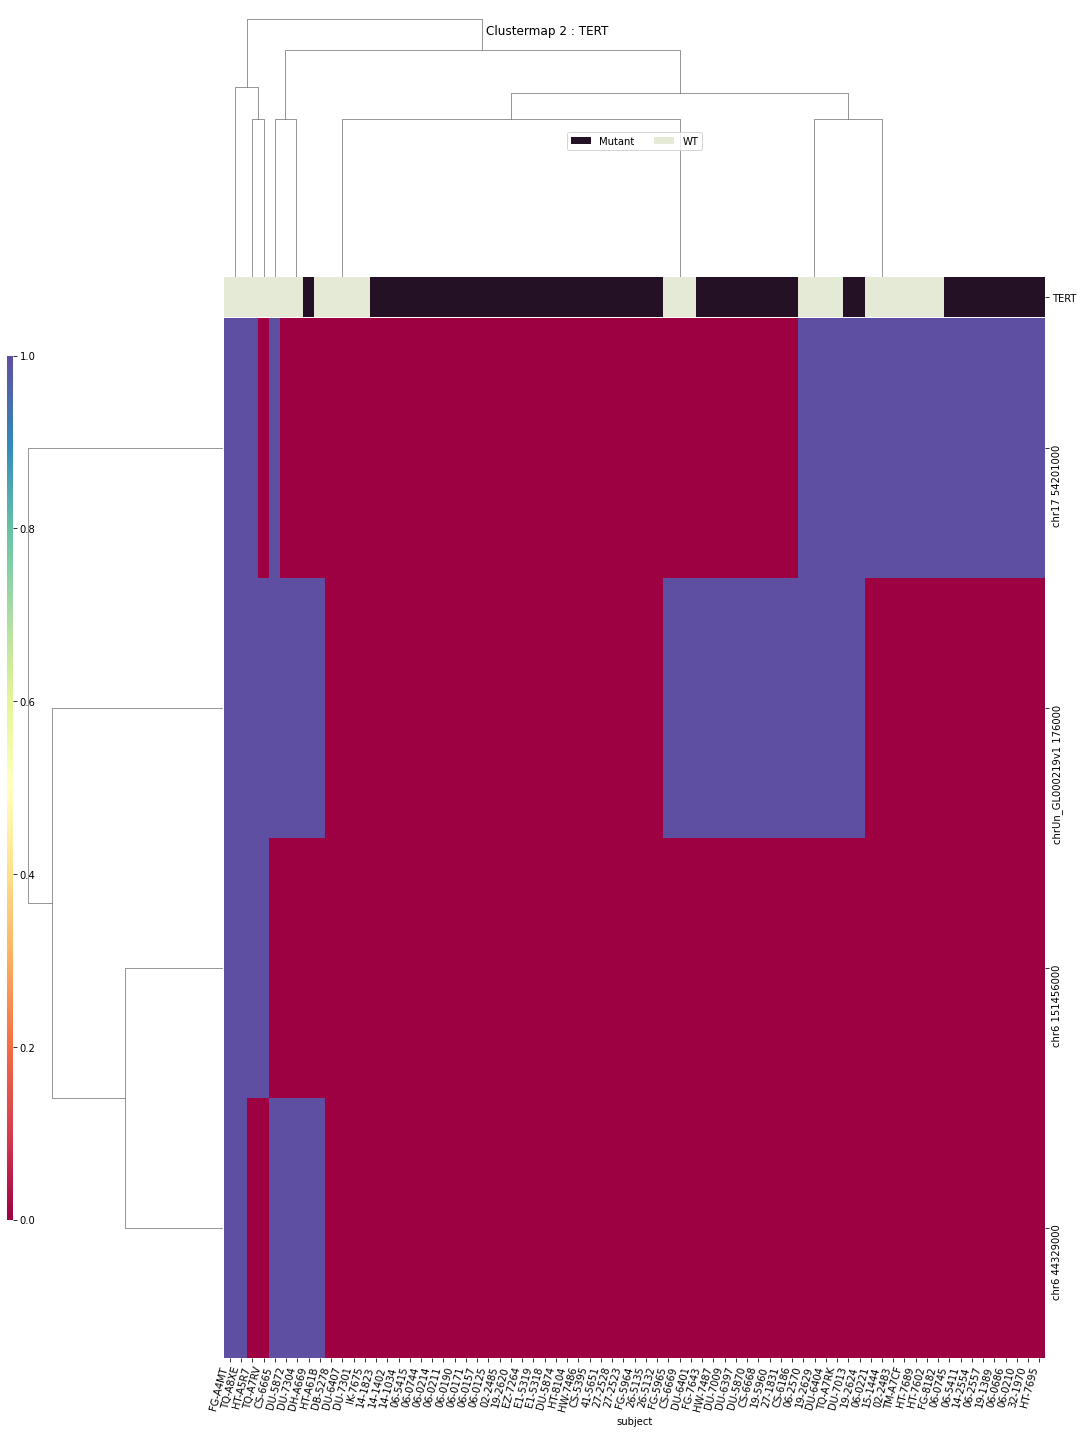

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 1410000' 'chr1 155626000' 'chr1 156179000' 'chr1 29339000'
 'chr1 45528000' 'chr1 52006000' 'chr10 102391000' 'chr10 43337000'
 'chr11 118730000' 'chr11 60714000' 'chr11 67604000' 'chr12 56401000'
 'chr13 49599000' 'chr14 100312000' 'chr14 64978000' 'chr14 64979000'
 'chr15 65227000' 'chr16 35204000' 'chr16 5755000' 'chr16 74799000'
 'chr16 8179000' 'chr17 30701000' 'chr19 20157000' 'chr19 28690000'
 'chr19 48889000' 'chr19 52698000' 'chr19 54951000' 'chr2 201139000'
 'chr2 231576000' 'chr2 32276000' 'chr20 35263000' 'chr21 17933000'
 'chr22 11550000' 'chr3 127411000' 'chr3 50519000' 'chr5 150454000'
 'chr6 120931000' 'chr6 2908000' 'chr6 44329000' 'chr6 52922000'
 'chr7 2390000' 'chr8 143288000' 'chr8 42796000' 'chr9 113033000'
 'chr9 31632000' 'chrUn_GL000219v1 176000' 'disease_type' 'subject']


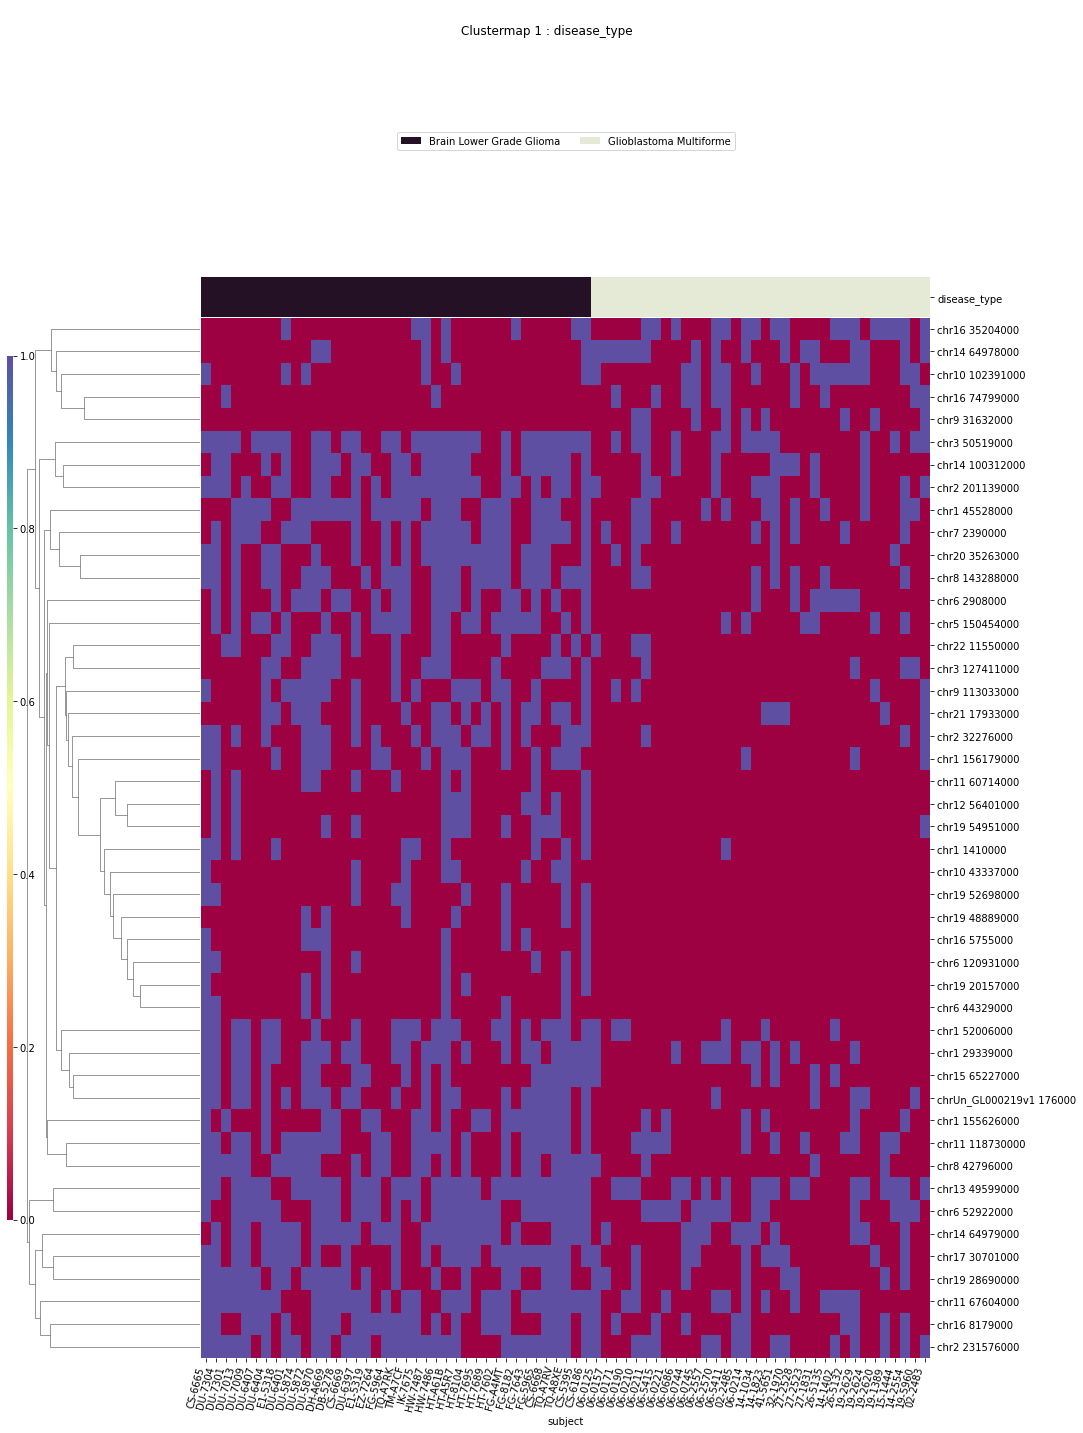

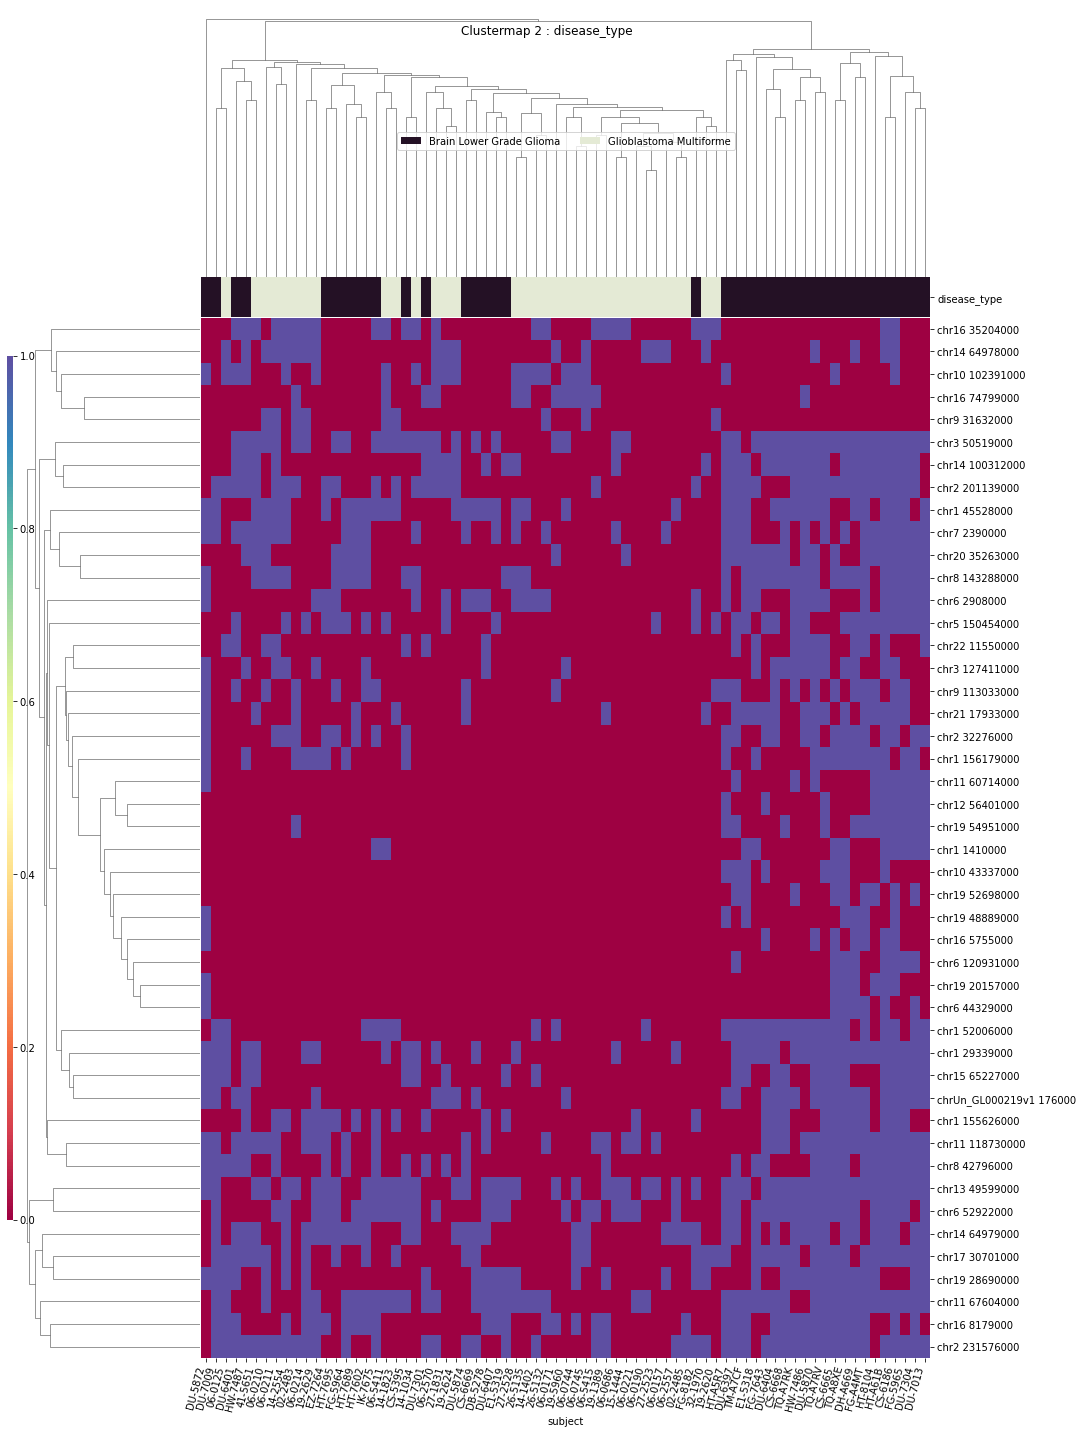

IDH_1p19q_status
T-Testing
Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 156179000' 'chr10 43337000' 'chr11 72164000'
 'chr13 18719000' 'chr14 38118000' 'chr14 64979000' 'chr16 8179000'
 'chr17 54201000' 'chr17 68604000' 'chr19 22284000' 'chr2 201139000'
 'chr3 127411000' 'chr4 3925000' 'chr5 100983000' 'chr6 151456000'
 'chr6 44328000' 'chr6 44329000' 'chr7 126169000' 'chr7 158236000'
 'chr8 54032000' 'chrUn_GL000219v1 176000' 'chrX 90950000' 'subject']


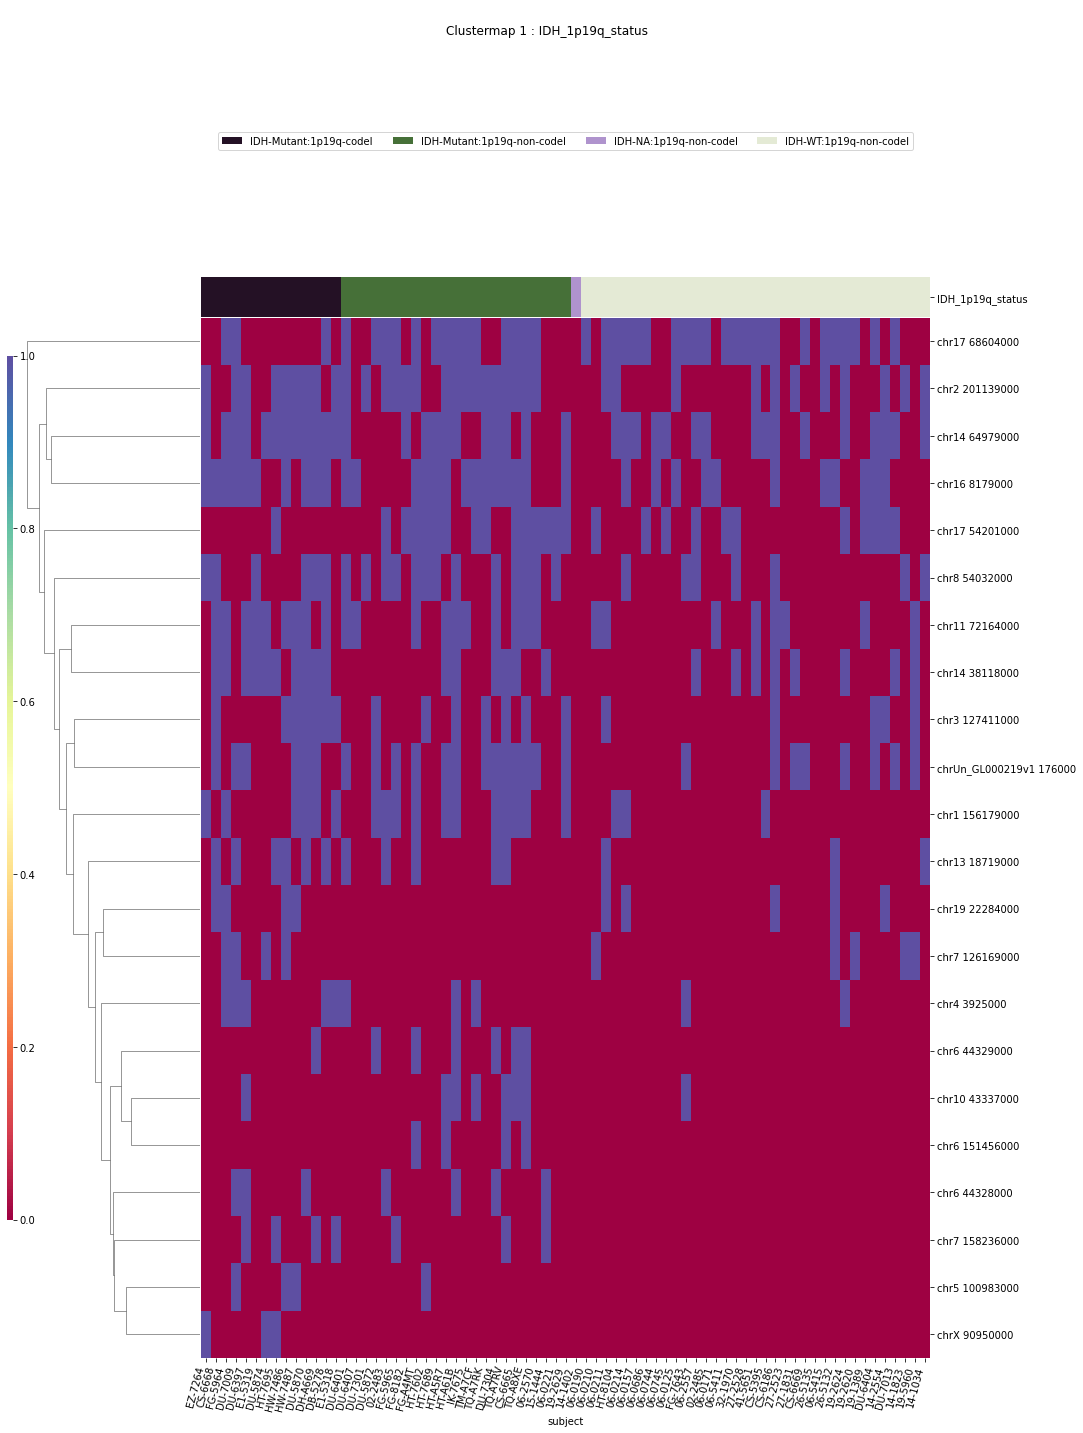

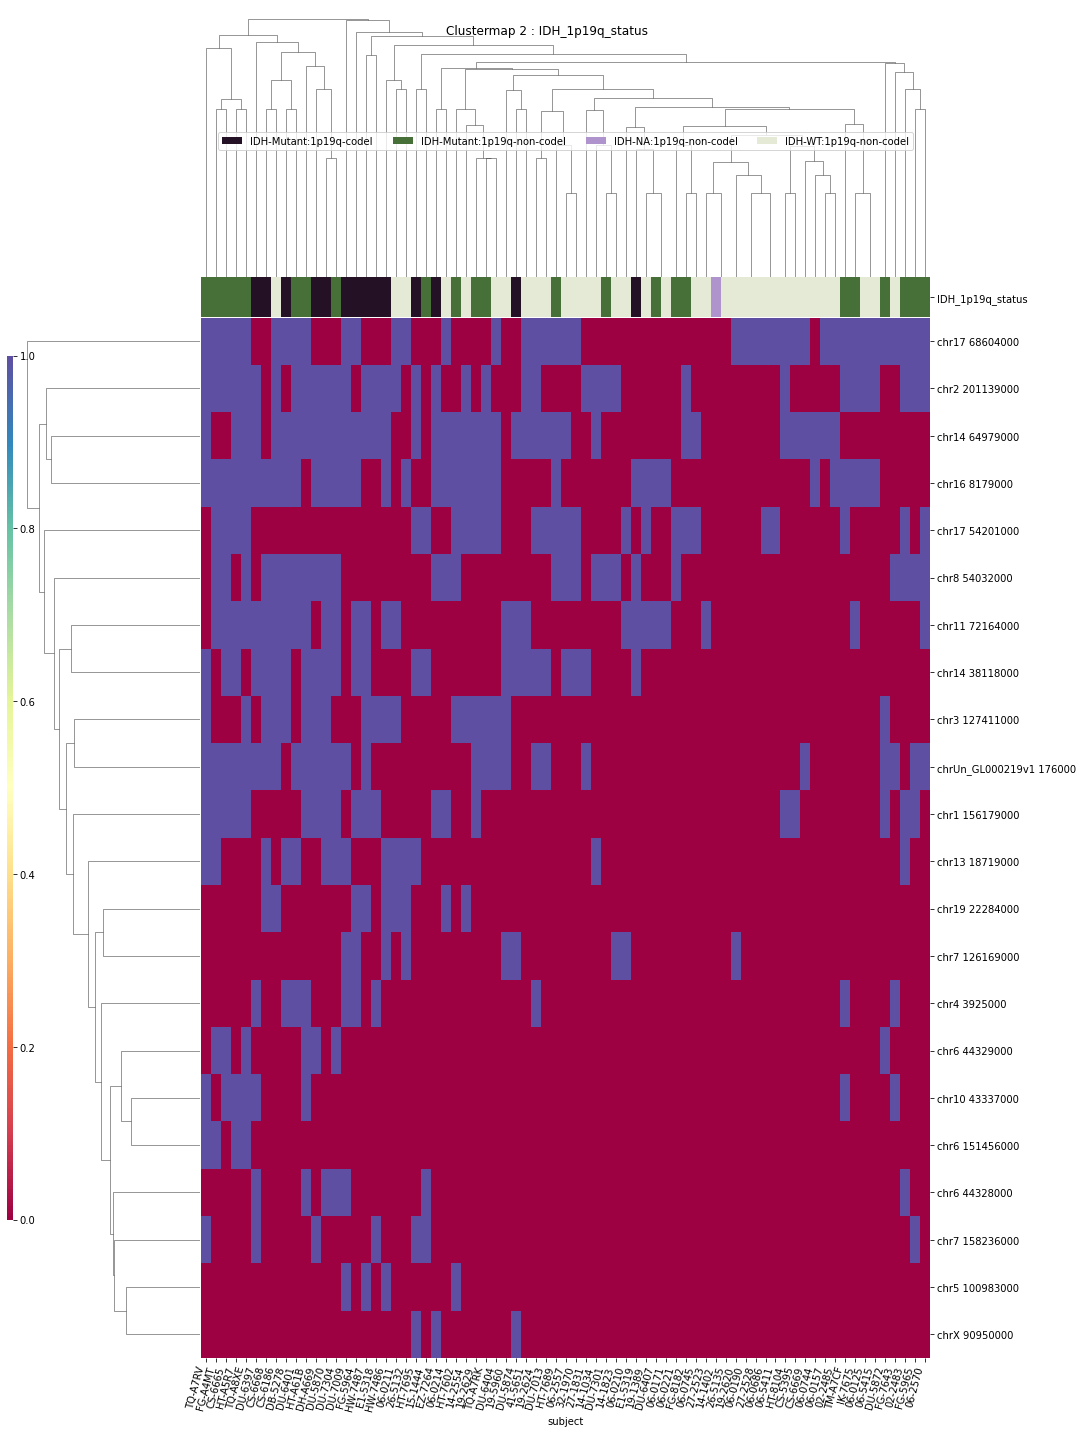

WHO_groups
T-Testing
Boxplotting
Clustermapping
['WHO_groups' 'chr1 104135000' 'chr1 108518000' 'chr1 1410000'
 'chr1 144451000' 'chr1 145932000' 'chr1 147106000' 'chr1 147107000'
 'chr1 147240000' 'chr1 155626000' 'chr1 156179000' 'chr1 156181000'
 'chr1 159767000' 'chr1 161017000' 'chr1 224339000' 'chr1 227868000'
 'chr1 227869000' 'chr1 246082000' 'chr1 247016000' 'chr1 29339000'
 'chr1 33063000' 'chr1 45528000' 'chr1 46320000' 'chr1 52006000'
 'chr1 65140000' 'chr1 73130000' 'chr1 75377000' 'chr1 77983000'
 'chr1 99836000' 'chr10 130627000' 'chr10 26894000' 'chr10 41713000'
 'chr10 43337000' 'chr10 6165000' 'chr10 65409000' 'chr10 65410000'
 'chr10 97416000' 'chr11 10391000' 'chr11 118721000' 'chr11 118730000'
 'chr11 18900000' 'chr11 24446000' 'chr11 55431000' 'chr11 60714000'
 'chr11 62195000' 'chr11 62326000' 'chr11 62859000' 'chr12 10572000'
 'chr12 110570000' 'chr12 123492000' 'chr12 123581000' 'chr12 42329000'
 'chr12 56401000' 'chr12 58336000' 'chr12 59108000' 'chr12 7300900

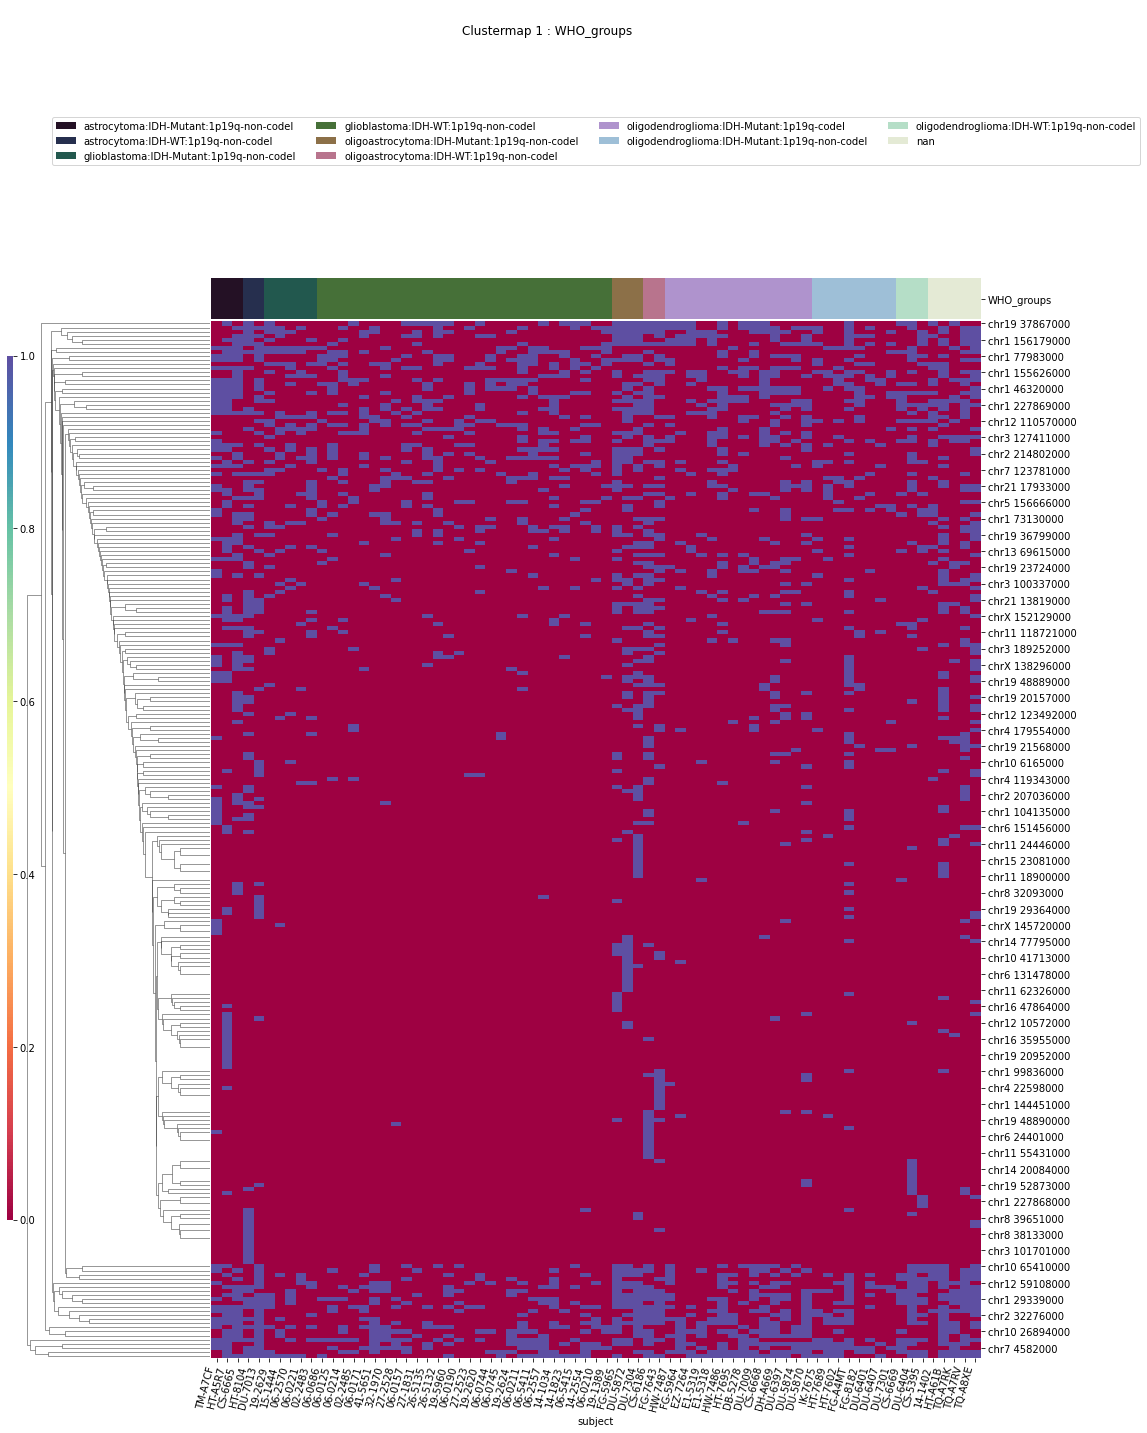

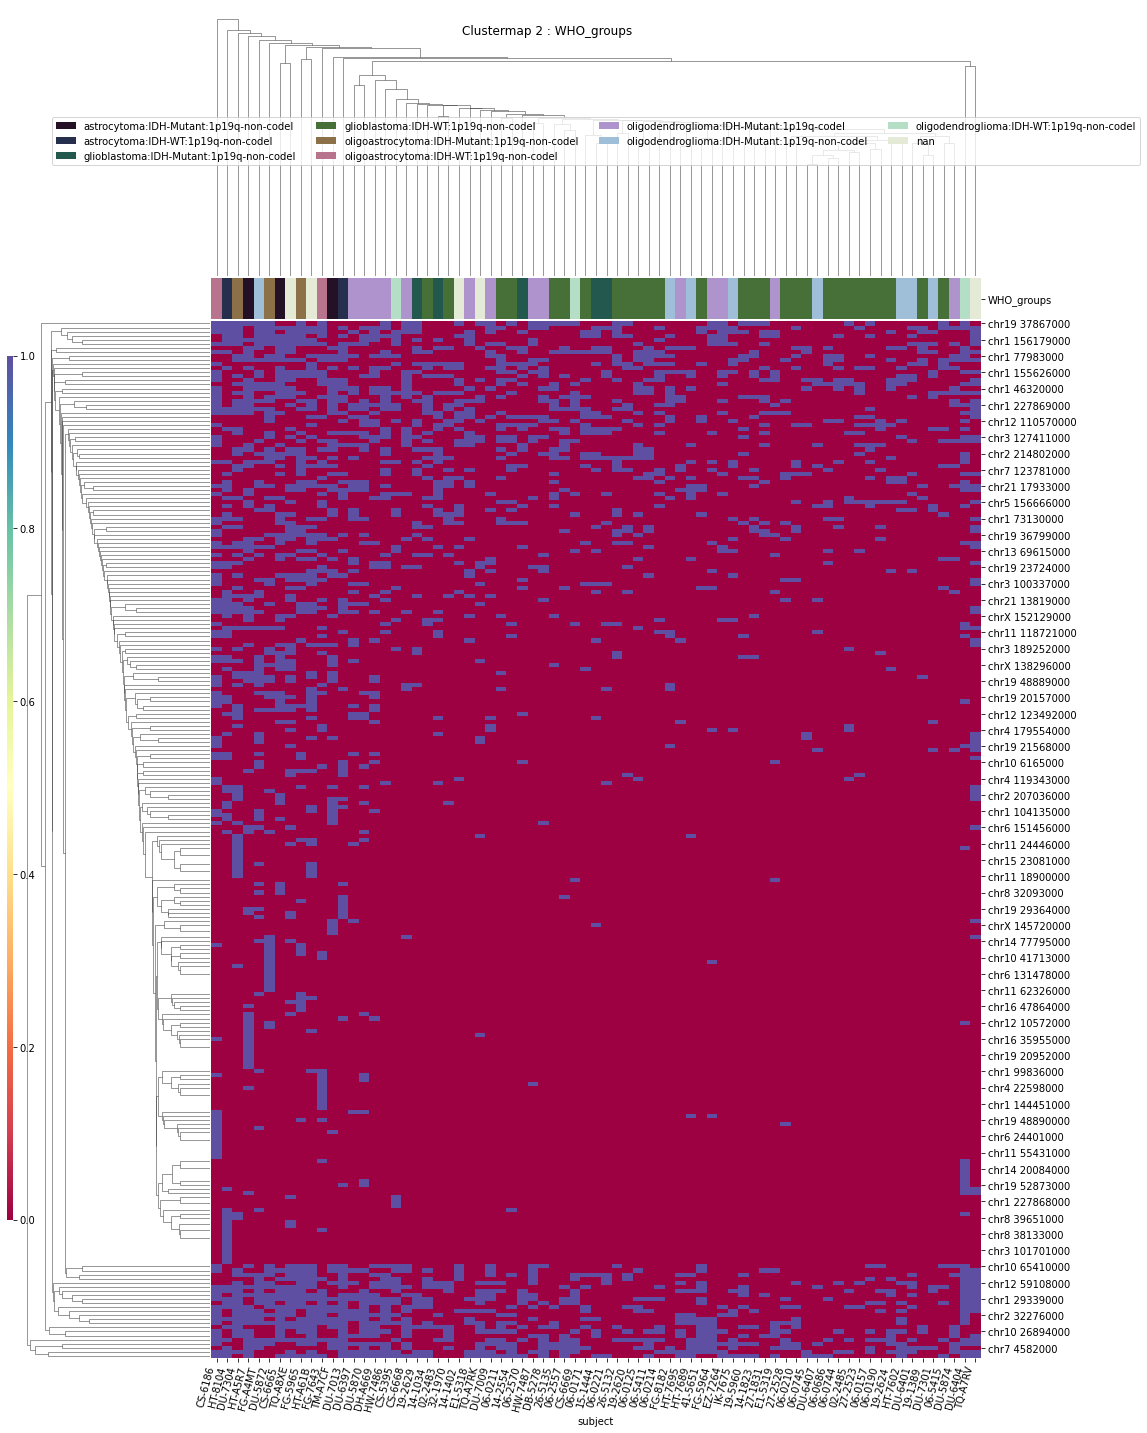

Triple_group
T-Testing
Boxplotting
Clustermapping
['Triple_group' 'chr1 114058000' 'chr1 155626000' 'chr1 156179000'
 'chr1 160947000' 'chr1 224339000' 'chr1 247015000' 'chr1 73129000'
 'chr10 43337000' 'chr10 97416000' 'chr10 99256000' 'chr11 63527000'
 'chr12 10572000' 'chr12 110570000' 'chr12 123581000' 'chr12 21644000'
 'chr12 32099000' 'chr12 6192000' 'chr12 73009000' 'chr14 20084000'
 'chr14 38118000' 'chr14 64979000' 'chr14 77662000' 'chr17 54201000'
 'chr17 68604000' 'chr18 31810000' 'chr19 21568000' 'chr19 22284000'
 'chr19 28131000' 'chr19 51905000' 'chr19 52873000' 'chr2 201139000'
 'chr2 228363000' 'chr20 18495000' 'chr20 35263000' 'chr21 17695000'
 'chr22 23907000' 'chr3 130057000' 'chr3 186887000' 'chr3 5081000'
 'chr5 100983000' 'chr5 122913000' 'chr5 4925000' 'chr6 44328000'
 'chr6 44329000' 'chr6 73805000' 'chr6 99429000' 'chr7 126169000'
 'chr7 158236000' 'chr8 54032000' 'chr9 131356000' 'chr9 137117000'
 'chrUn_GL000219v1 176000' 'chrX 17115000' 'chrX 72733000' 'chrX

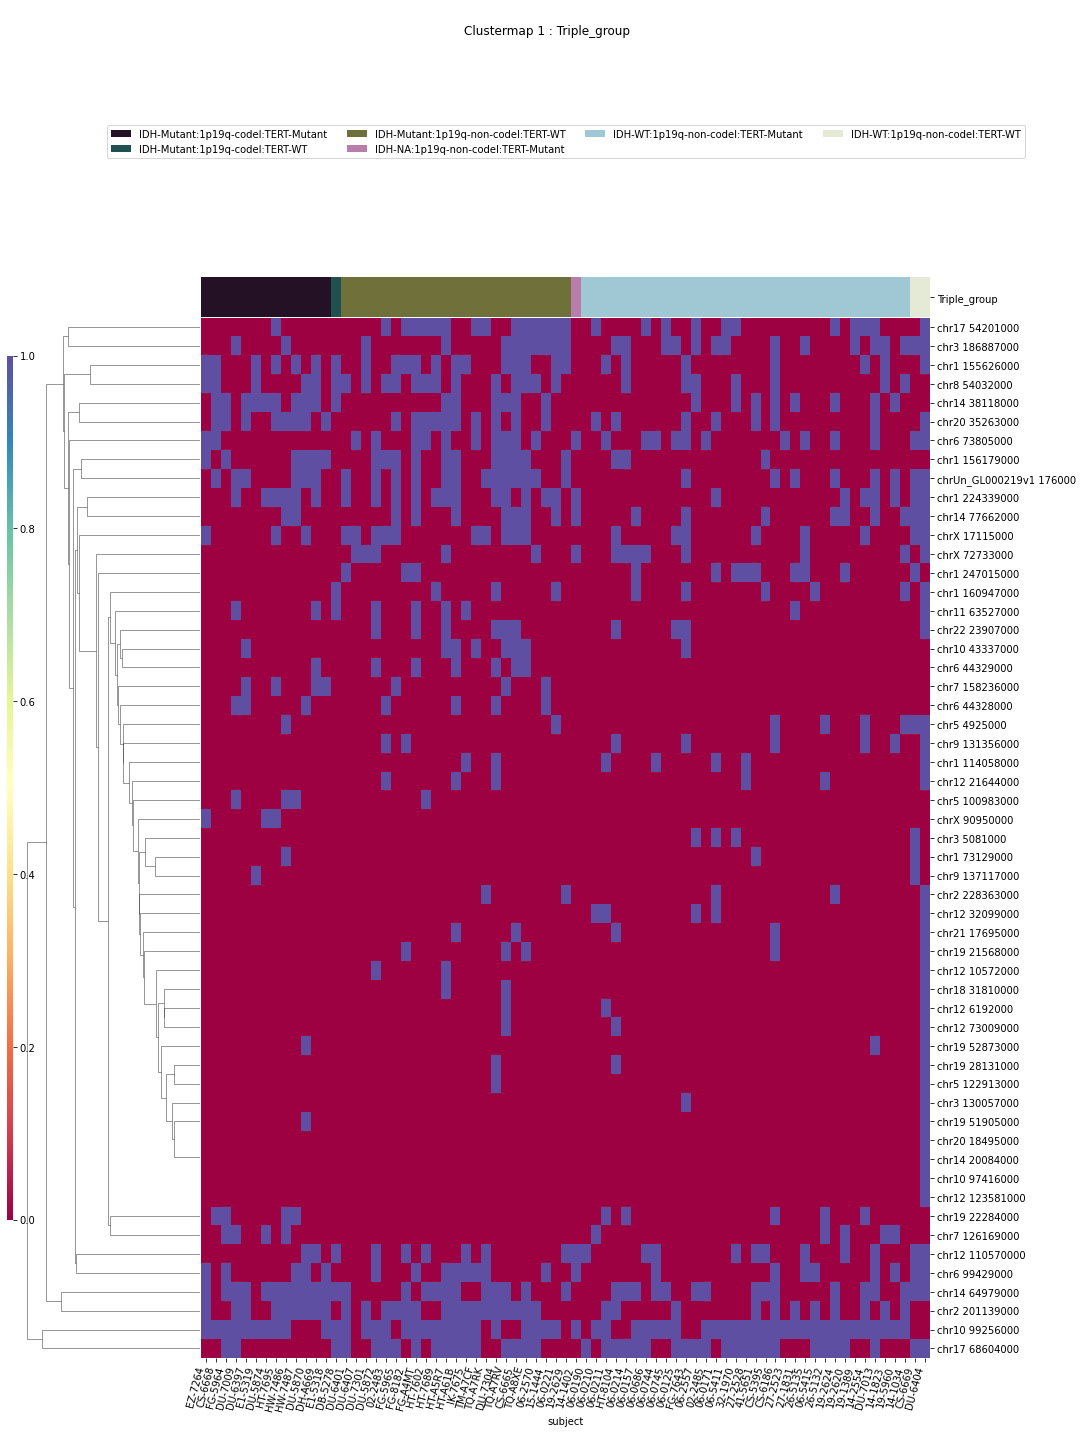

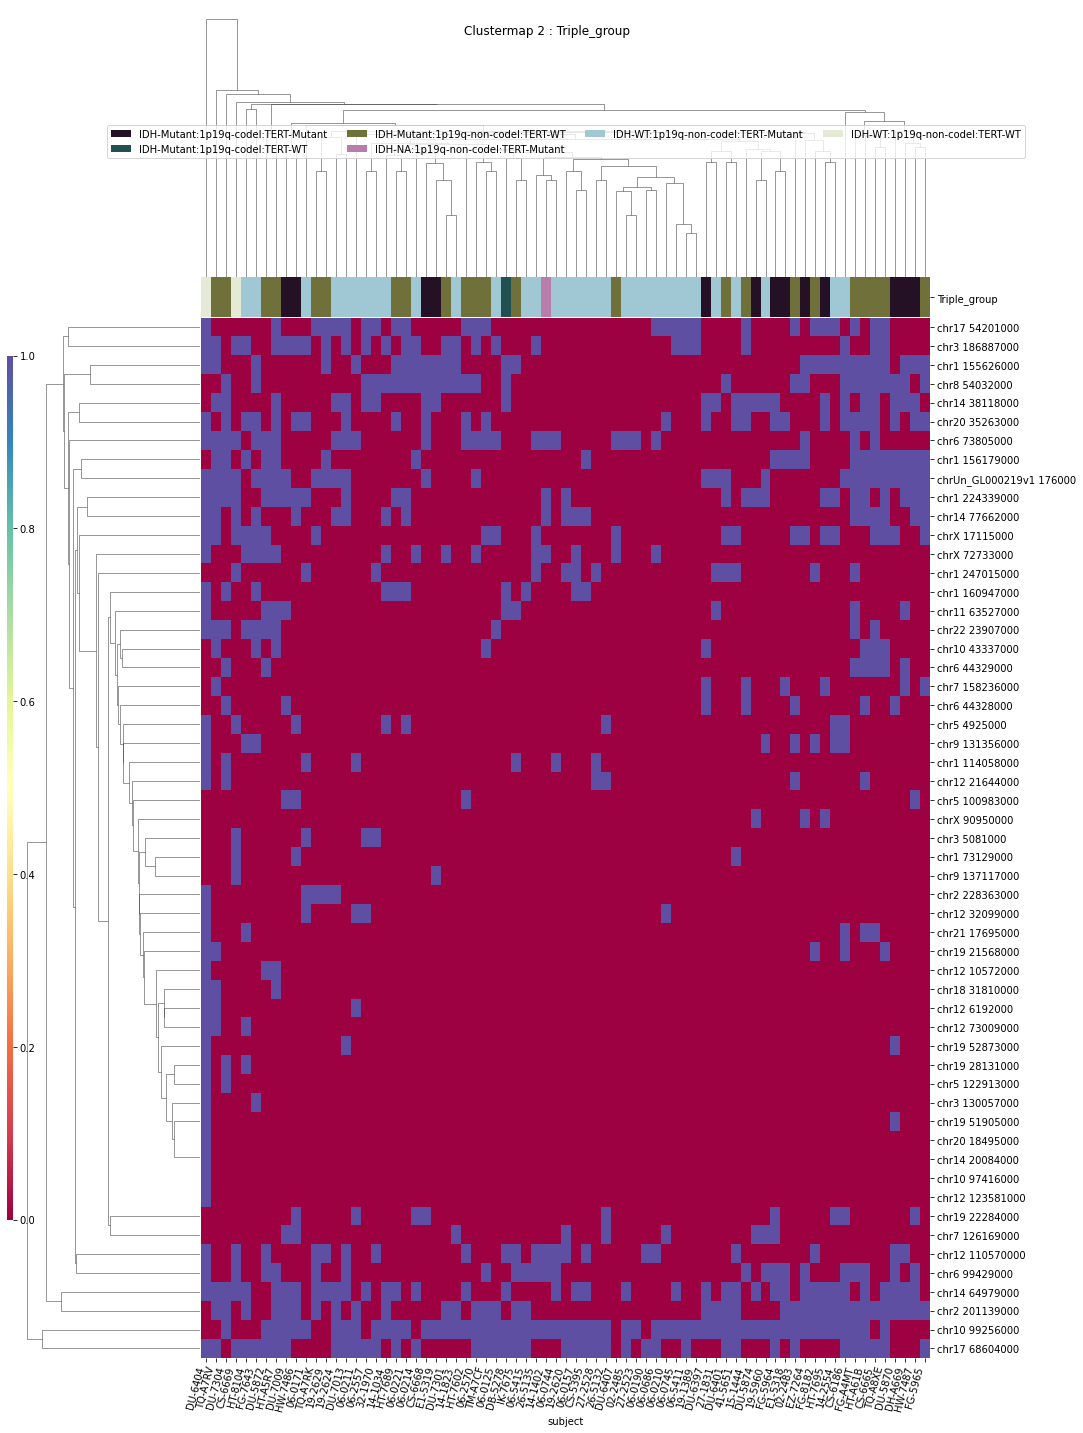

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'chr1 160690000' 'chr3 47259000' 'chr3 5081000' 'subject']


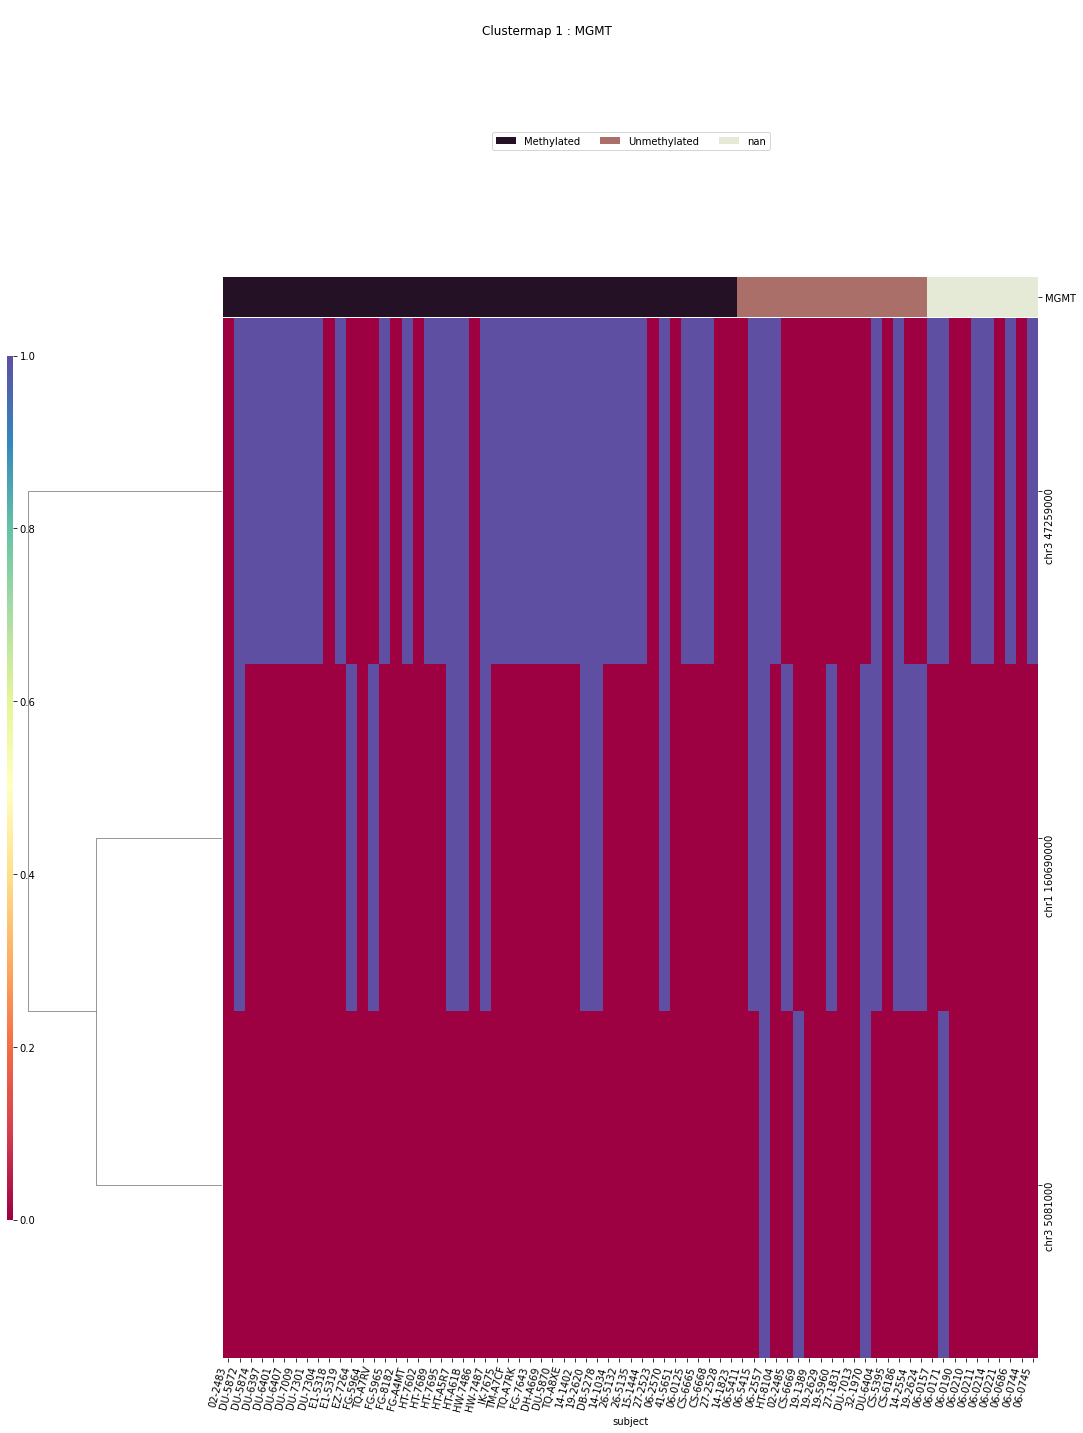

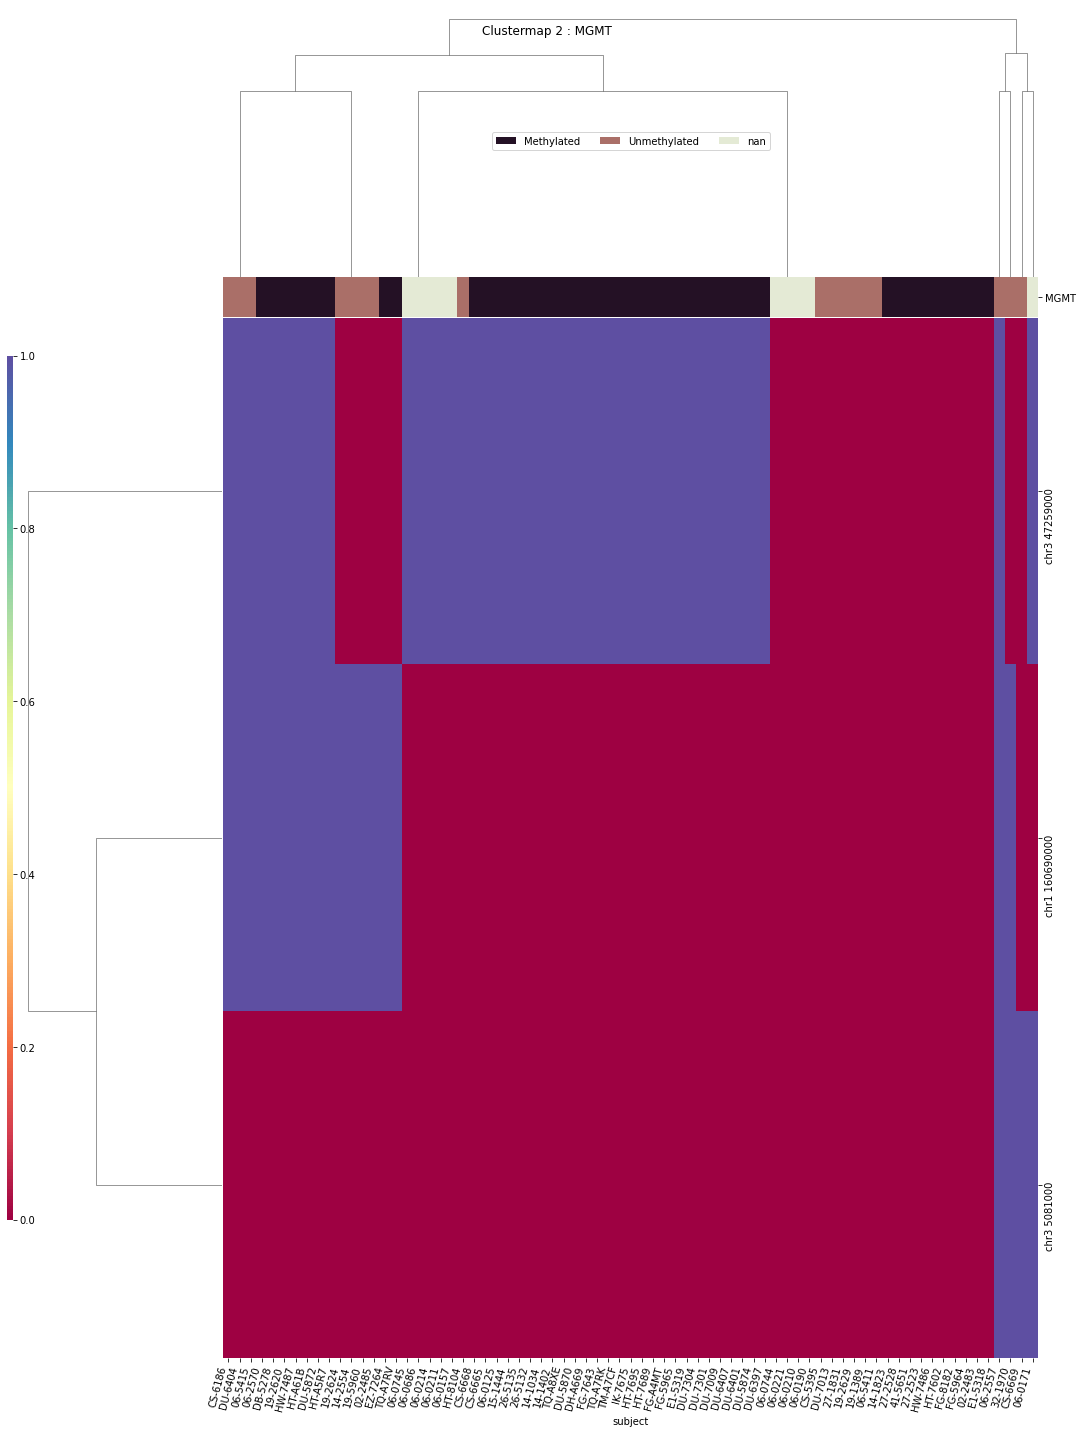

gender1
T-Testing
Boxplotting
Clustermapping
['chr1 111259000' 'chr17 30701000' 'chr3 127412000' 'chr8 143288000'
 'chrX 125780000' 'chrX 138296000' 'chrX 152129000' 'chrX 17115000'
 'chrX 72733000' 'gender1' 'subject']


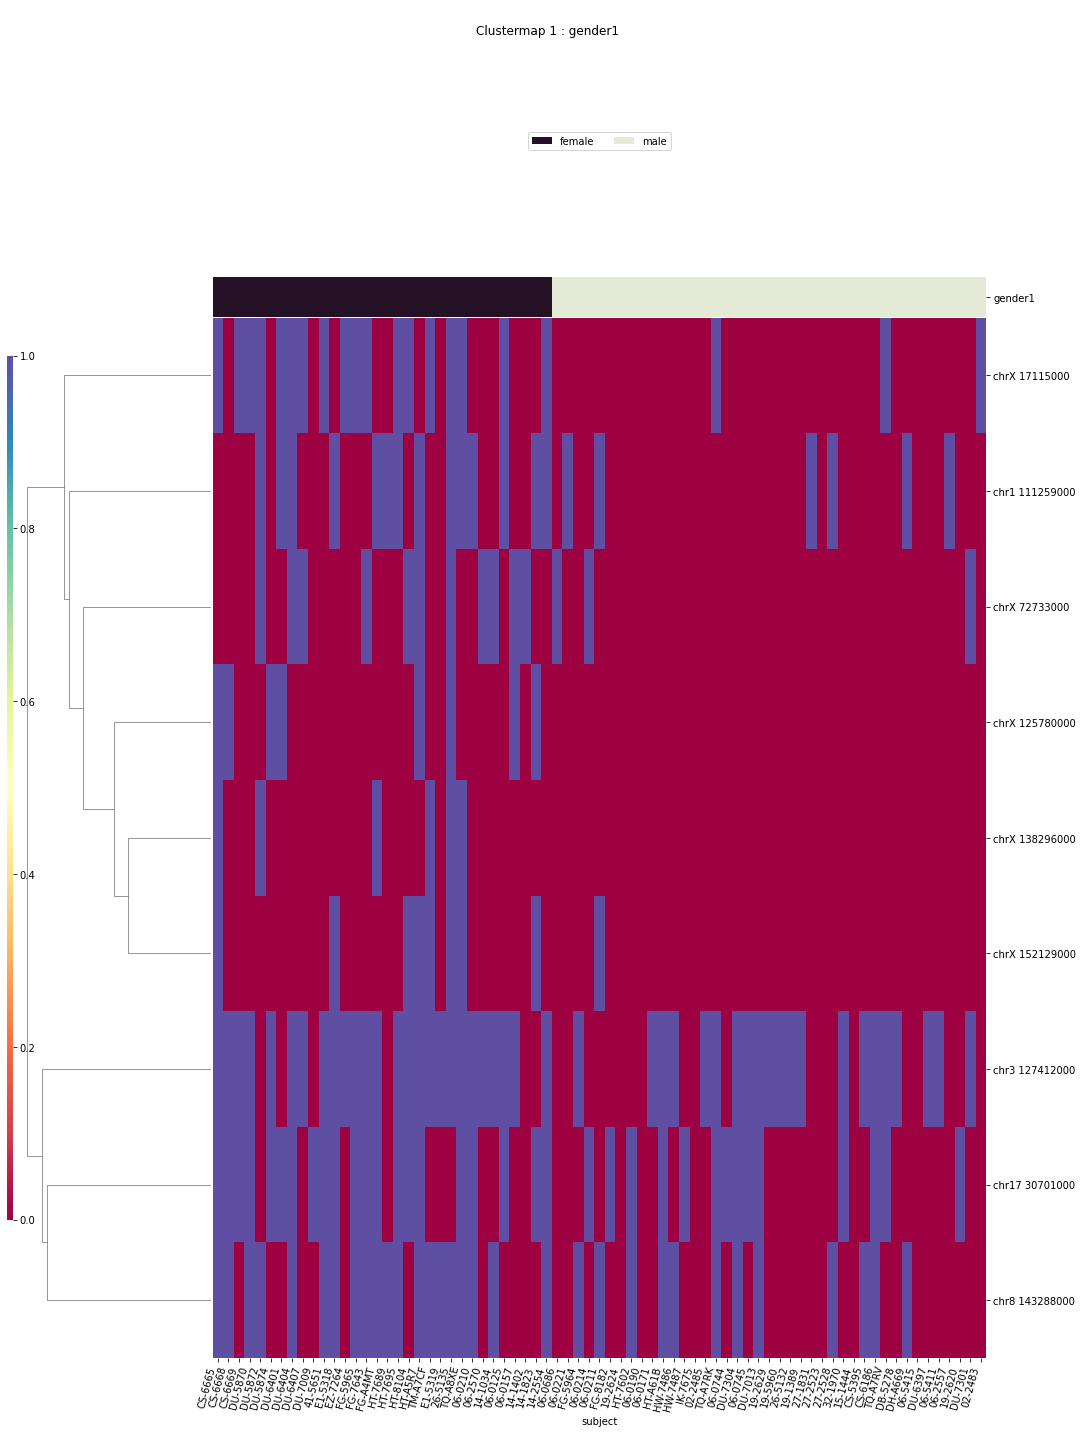

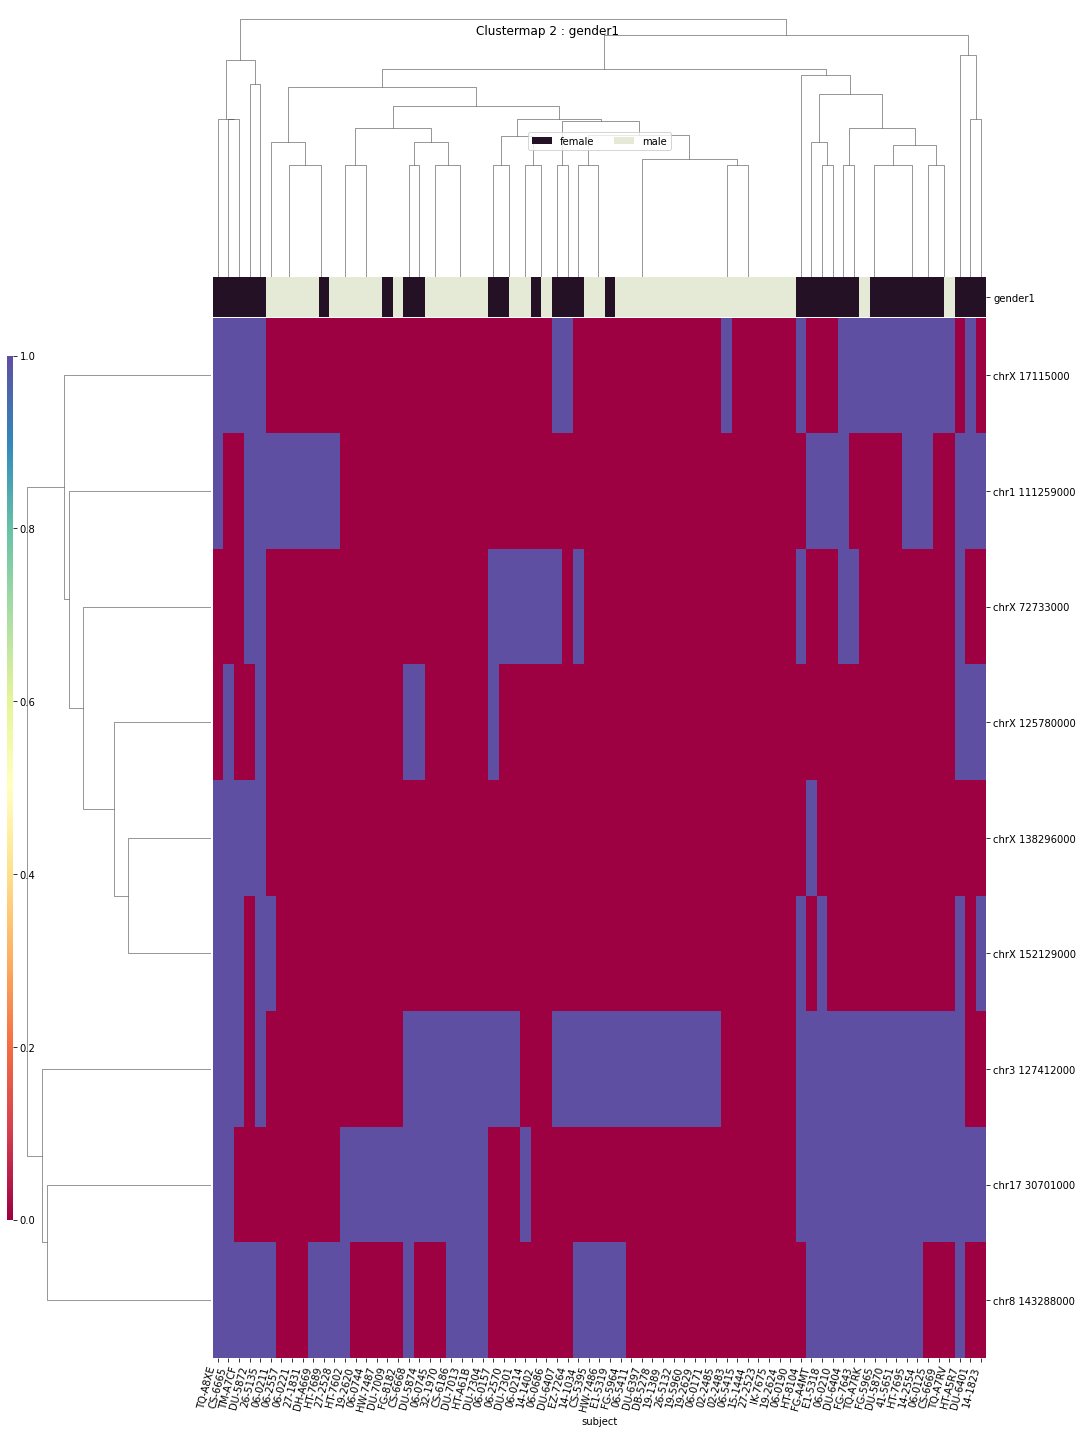

In [119]:
for column in ['race','ethnicity','primary_diagnosis','IDH','x1p19q','TERT','disease_type',
               'IDH_1p19q_status','WHO_groups','Triple_group','MGMT','gender1']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)

In [120]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210526 08:42:21'

race
T-Testing
Boxplotting
Clustermapping
['chr1 227868000' 'chr1 33063000' 'chr1 66591000' 'chr11 62326000'
 'chr19 51908000' 'chr19 58015000' 'chr3 189252000' 'chr6 125776000'
 'chr6 131478000' 'chr9 134715000' 'chrY 7179000' 'race' 'subject']


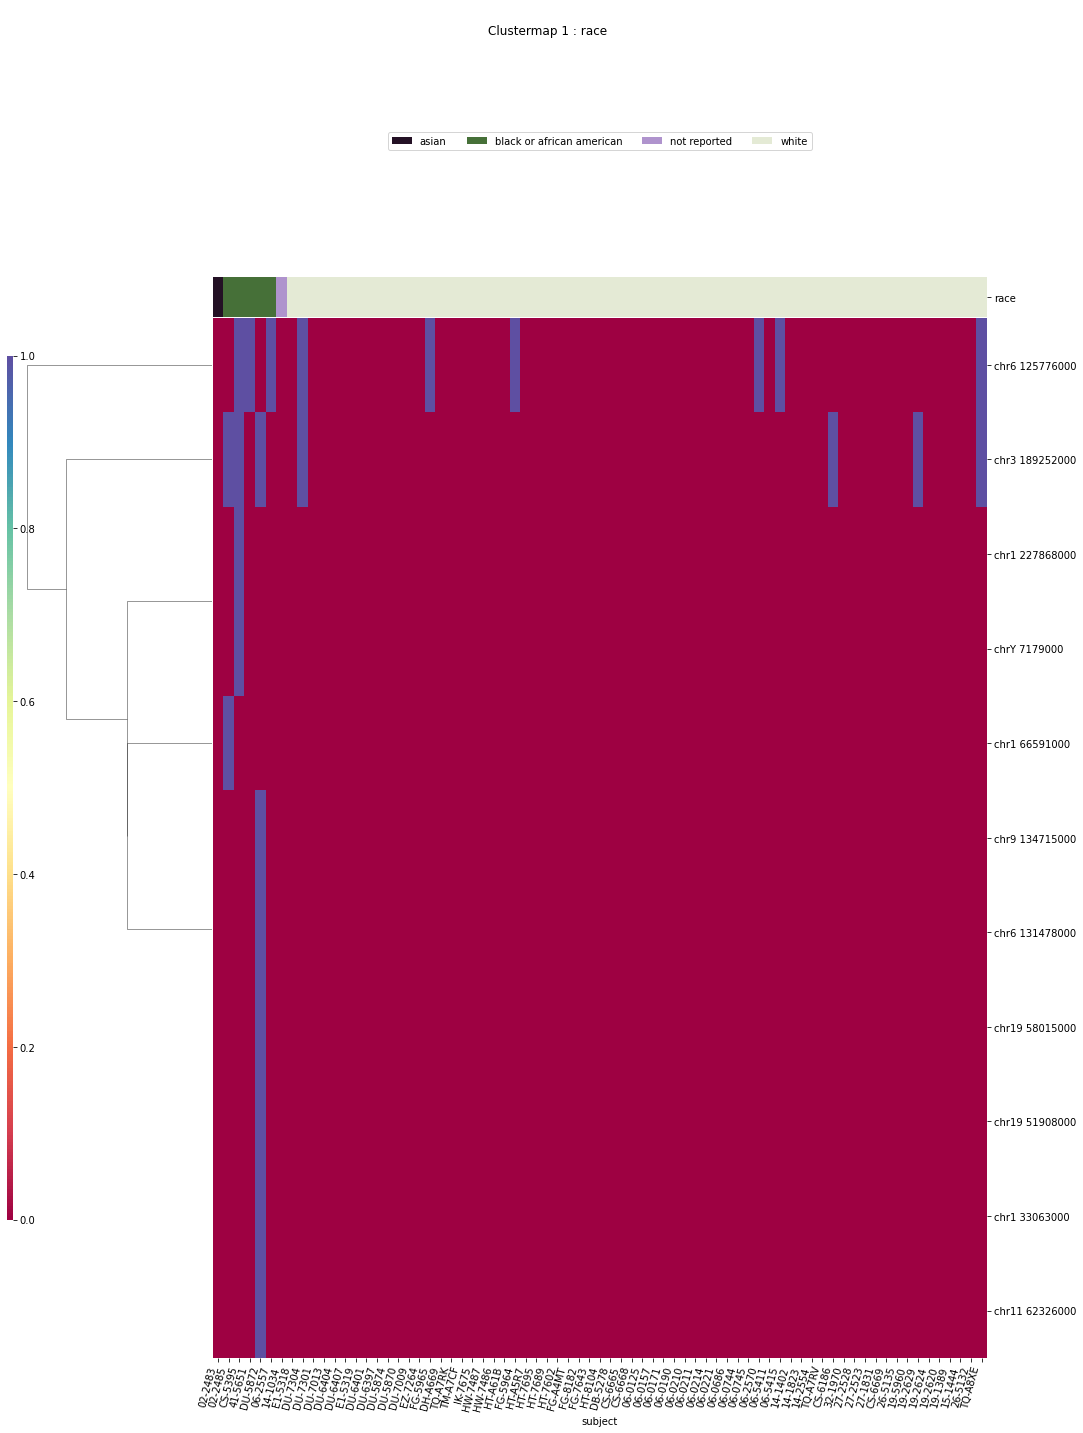

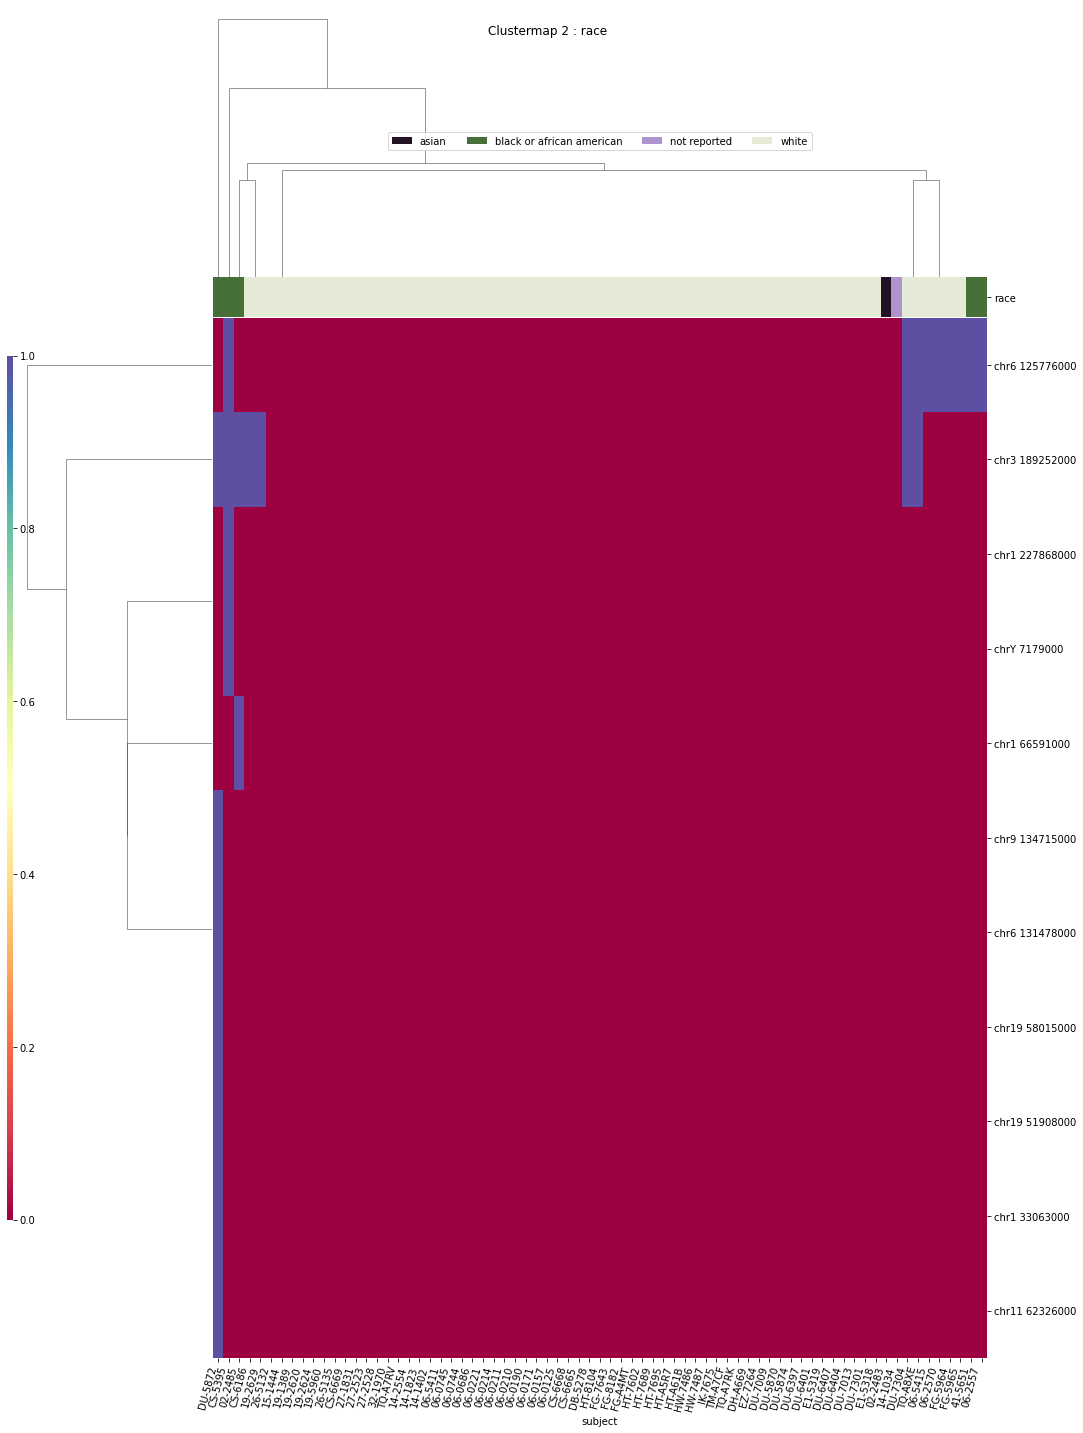

ethnicity
T-Testing
Boxplotting
Clustermapping
['chr1 10029000' 'chr1 108518000' 'chr1 9001000' 'chr1 93277000'
 'chr10 86032000' 'chr11 62356000' 'chr11 62858000' 'chr15 100773000'
 'chr17 30564000' 'chr18 46088000' 'chr19 21568000' 'chr19 21776000'
 'chr19 53443000' 'chr19 53838000' 'chr2 38277000' 'chr22 11556000'
 'chr22 42750000' 'chr3 186893000' 'chr4 550000' 'chr4 6836000'
 'chr5 181267000' 'chr6 151456000' 'chr7 158980000' 'chr9 134714000'
 'chr9 69764000' 'ethnicity' 'subject']


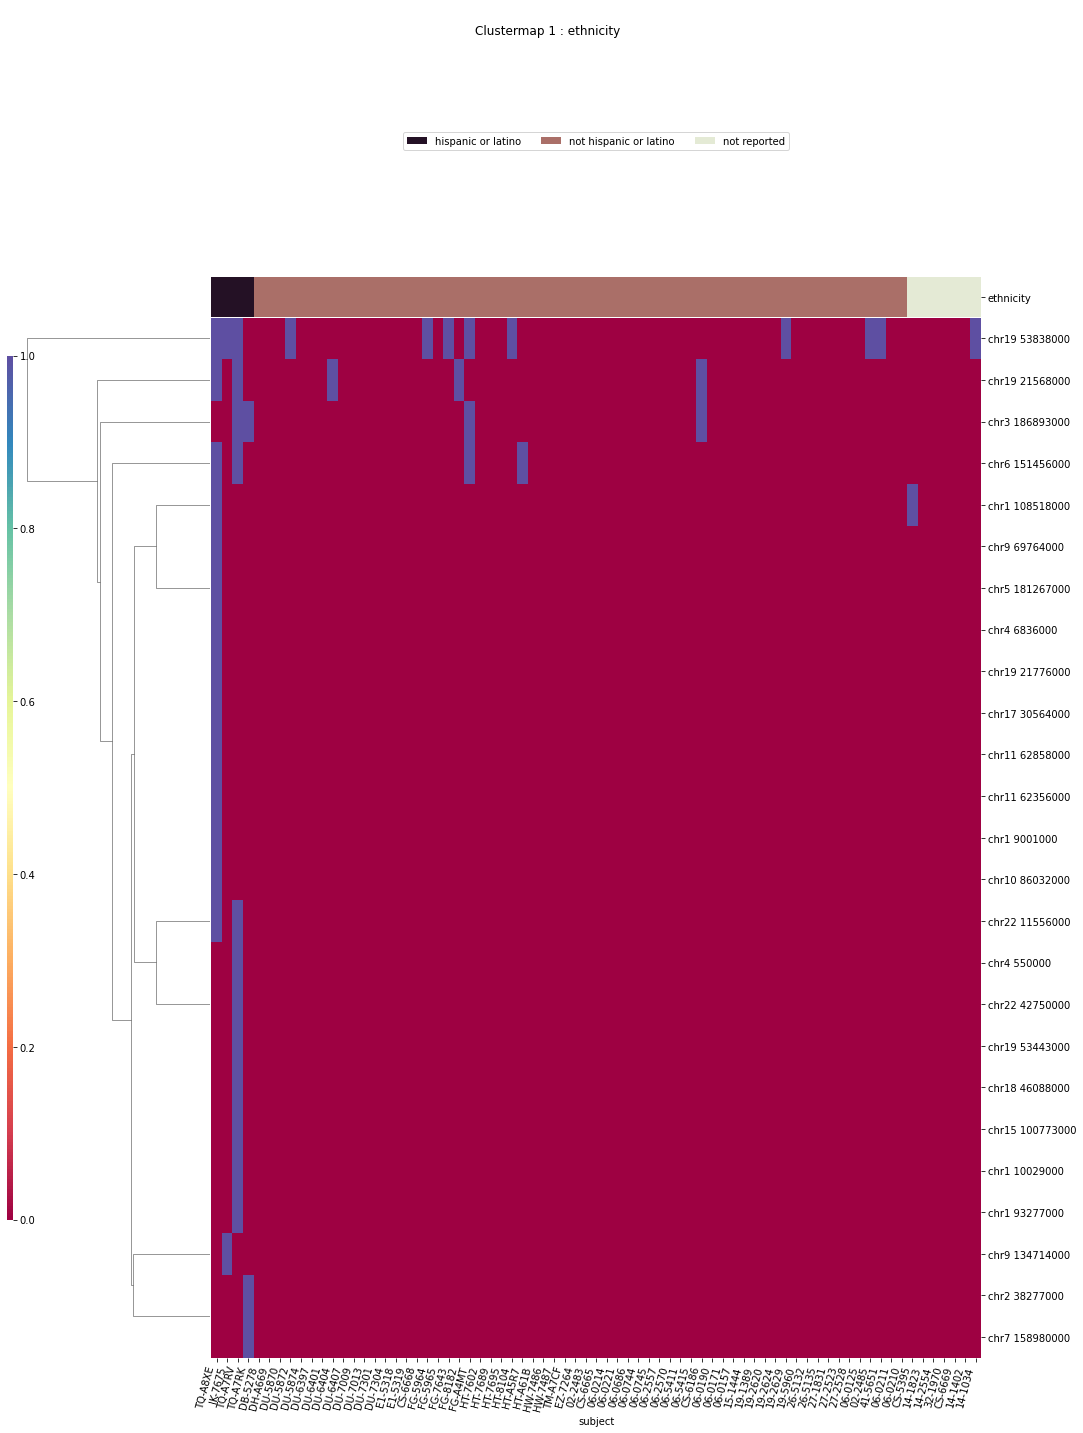

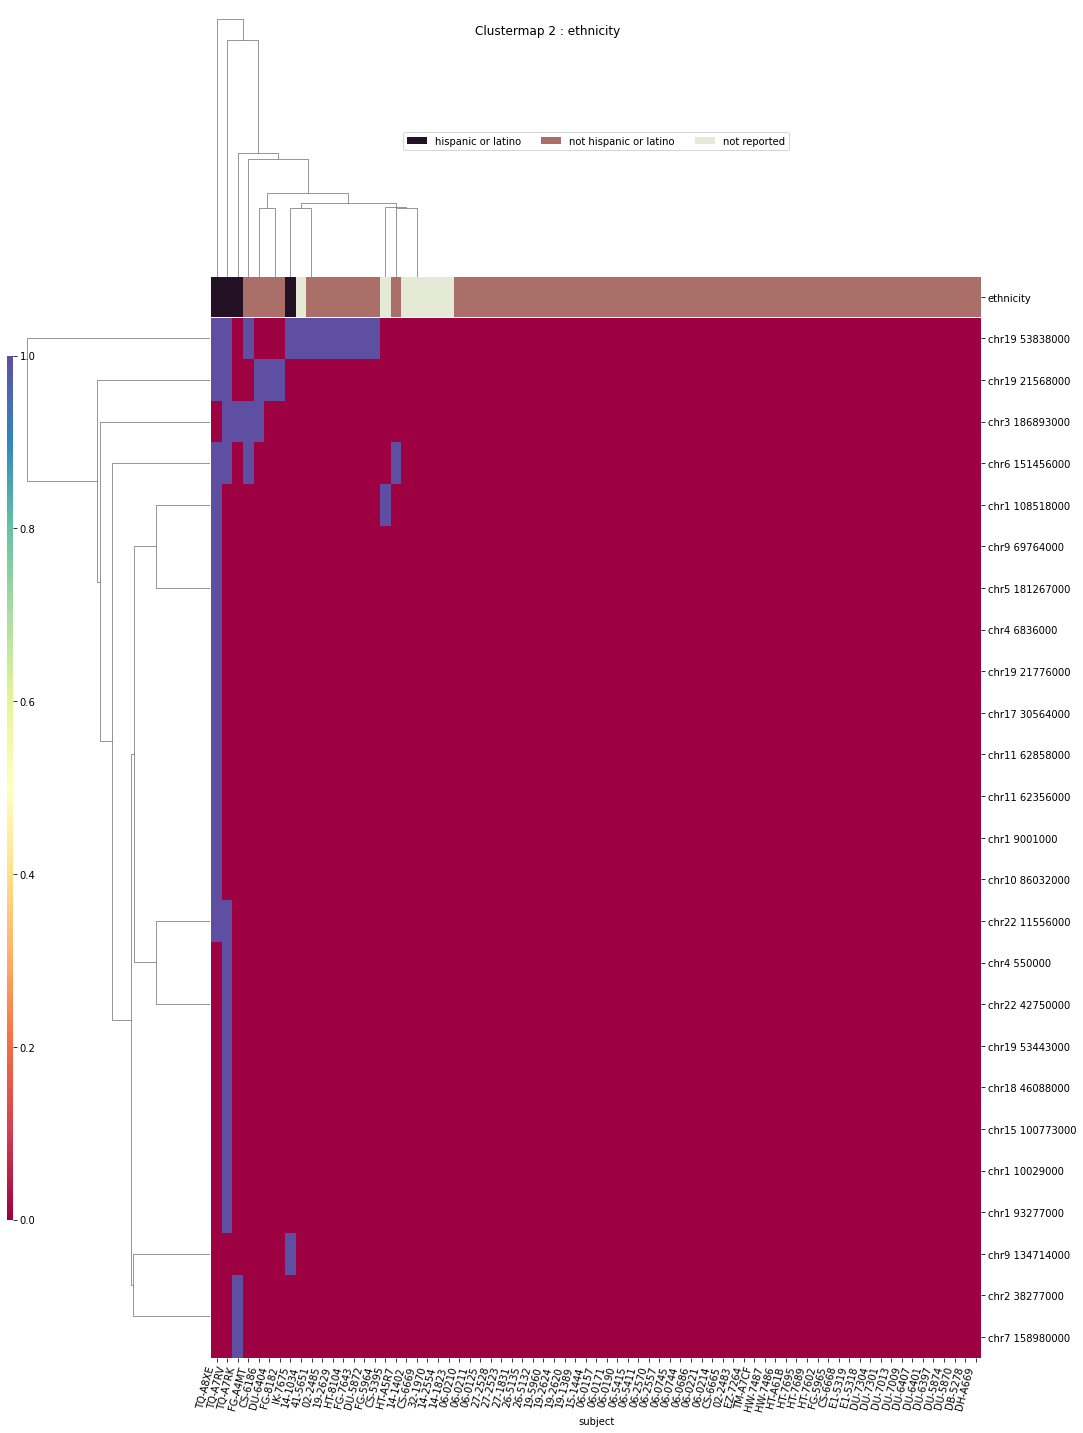

primary_diagnosis
T-Testing
Boxplotting
Clustermapping
['chr1 10029000' 'chr1 104135000' 'chr1 111360000' 'chr1 1410000'
 'chr1 146948000' 'chr1 147106000' 'chr1 147240000' 'chr1 152456000'
 'chr1 156179000' 'chr1 156181000' 'chr1 227869000' 'chr1 246082000'
 'chr1 29339000' 'chr1 48174000' 'chr1 52007000' 'chr1 70461000'
 'chr1 89066000' 'chr1 93277000' 'chr10 130627000' 'chr10 41713000'
 'chr10 43337000' 'chr10 97416000' 'chr11 24446000' 'chr11 60714000'
 'chr11 62195000' 'chr11 63527000' 'chr12 10572000' 'chr12 123581000'
 'chr12 42329000' 'chr12 4721000' 'chr12 56401000' 'chr12 58336000'
 'chr12 6192000' 'chr12 73009000' 'chr12 85468000' 'chr13 95268000'
 'chr14 20084000' 'chr14 22725000' 'chr15 100773000' 'chr15 65227000'
 'chr16 23599000' 'chr16 5755000' 'chr17 36140000' 'chr18 31810000'
 'chr18 41183000' 'chr18 46088000' 'chr18 69042000' 'chr18 69043000'
 'chr19 20157000' 'chr19 21568000' 'chr19 28130000' 'chr19 28131000'
 'chr19 29364000' 'chr19 37320000' 'chr19 37630000' 'chr1

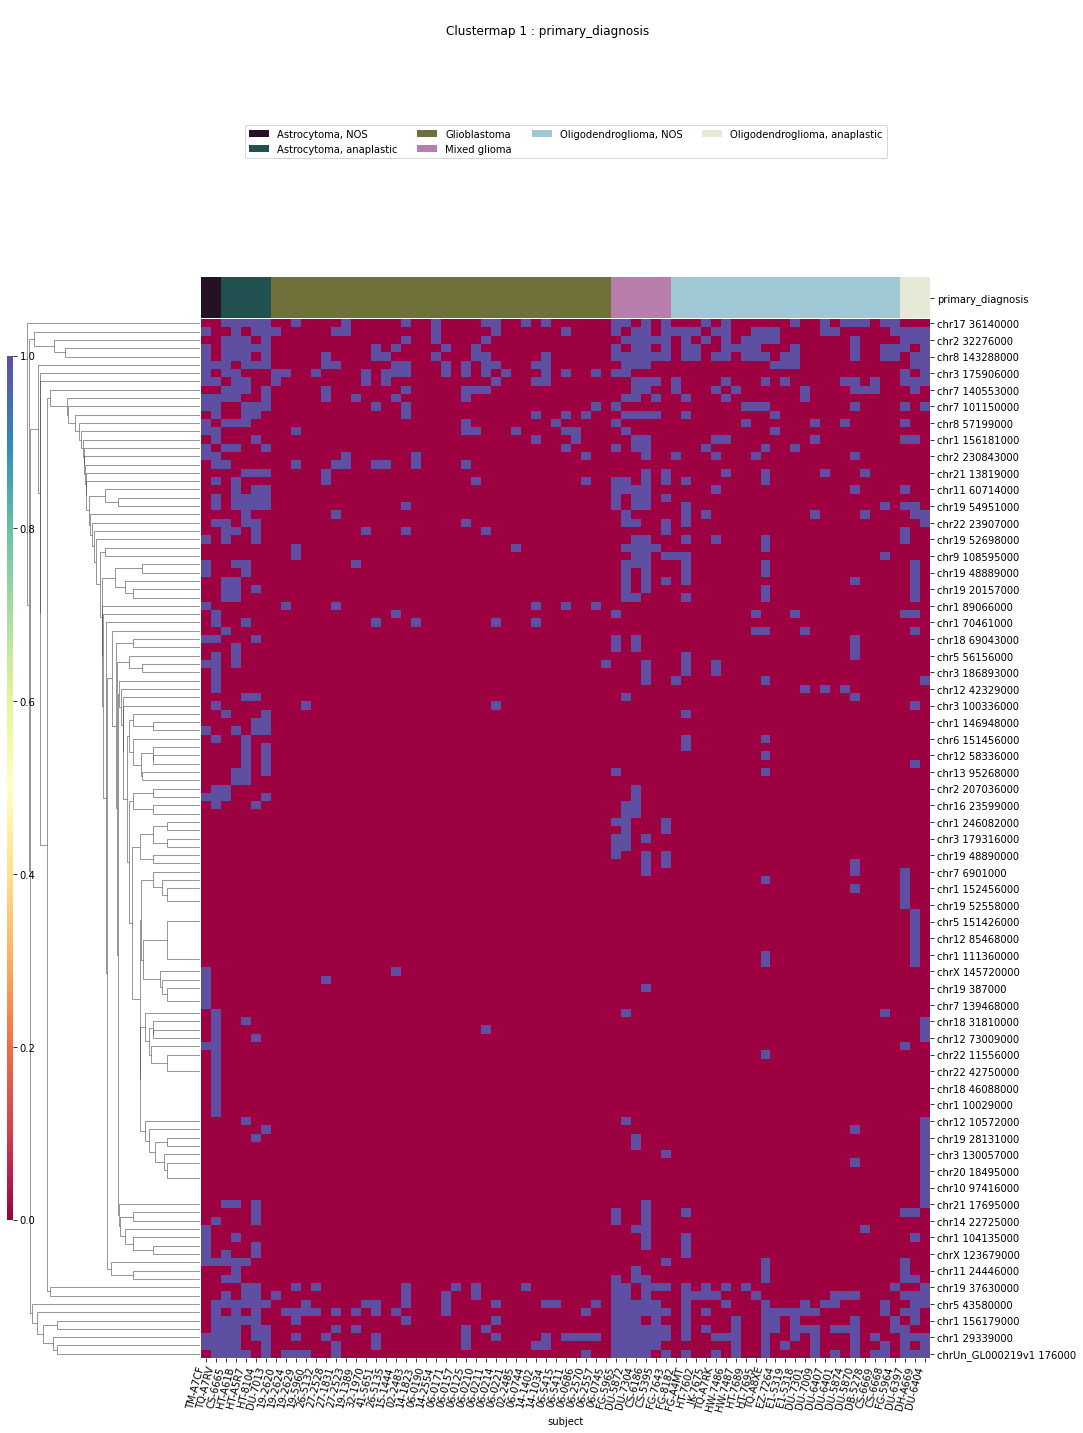

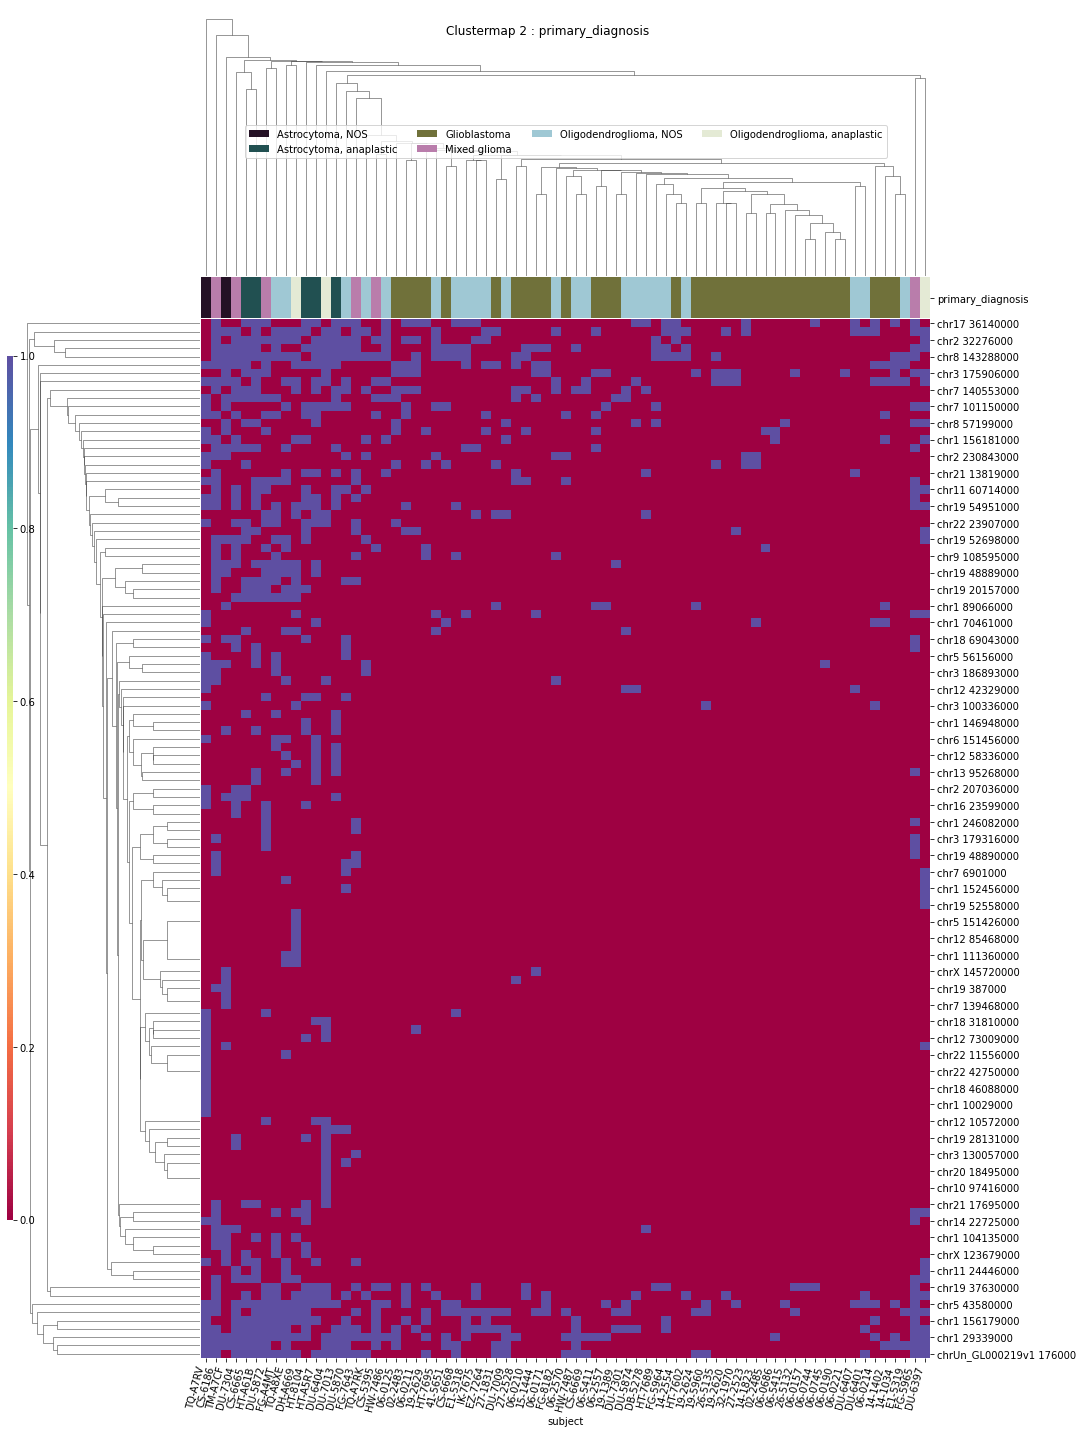

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr1 156179000' 'subject']
Not enough data to produce cluster maps
x1p19q
T-Testing
Boxplotting
Clustermapping
['chr14 38118000' 'chrX 90950000' 'subject' 'x1p19q']


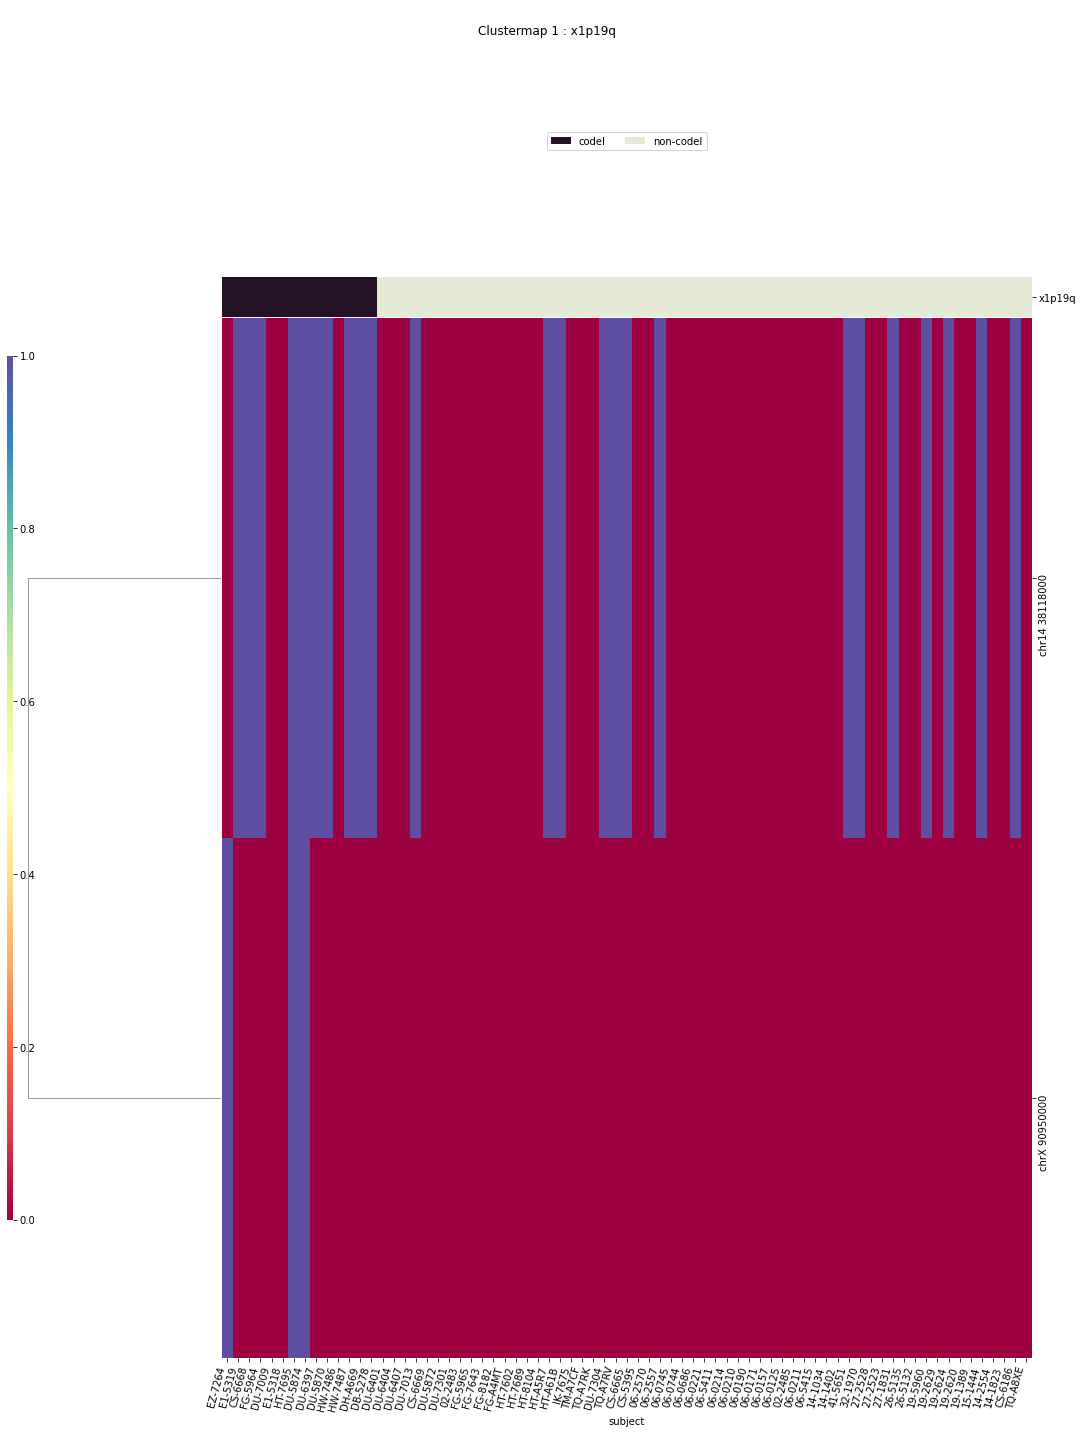

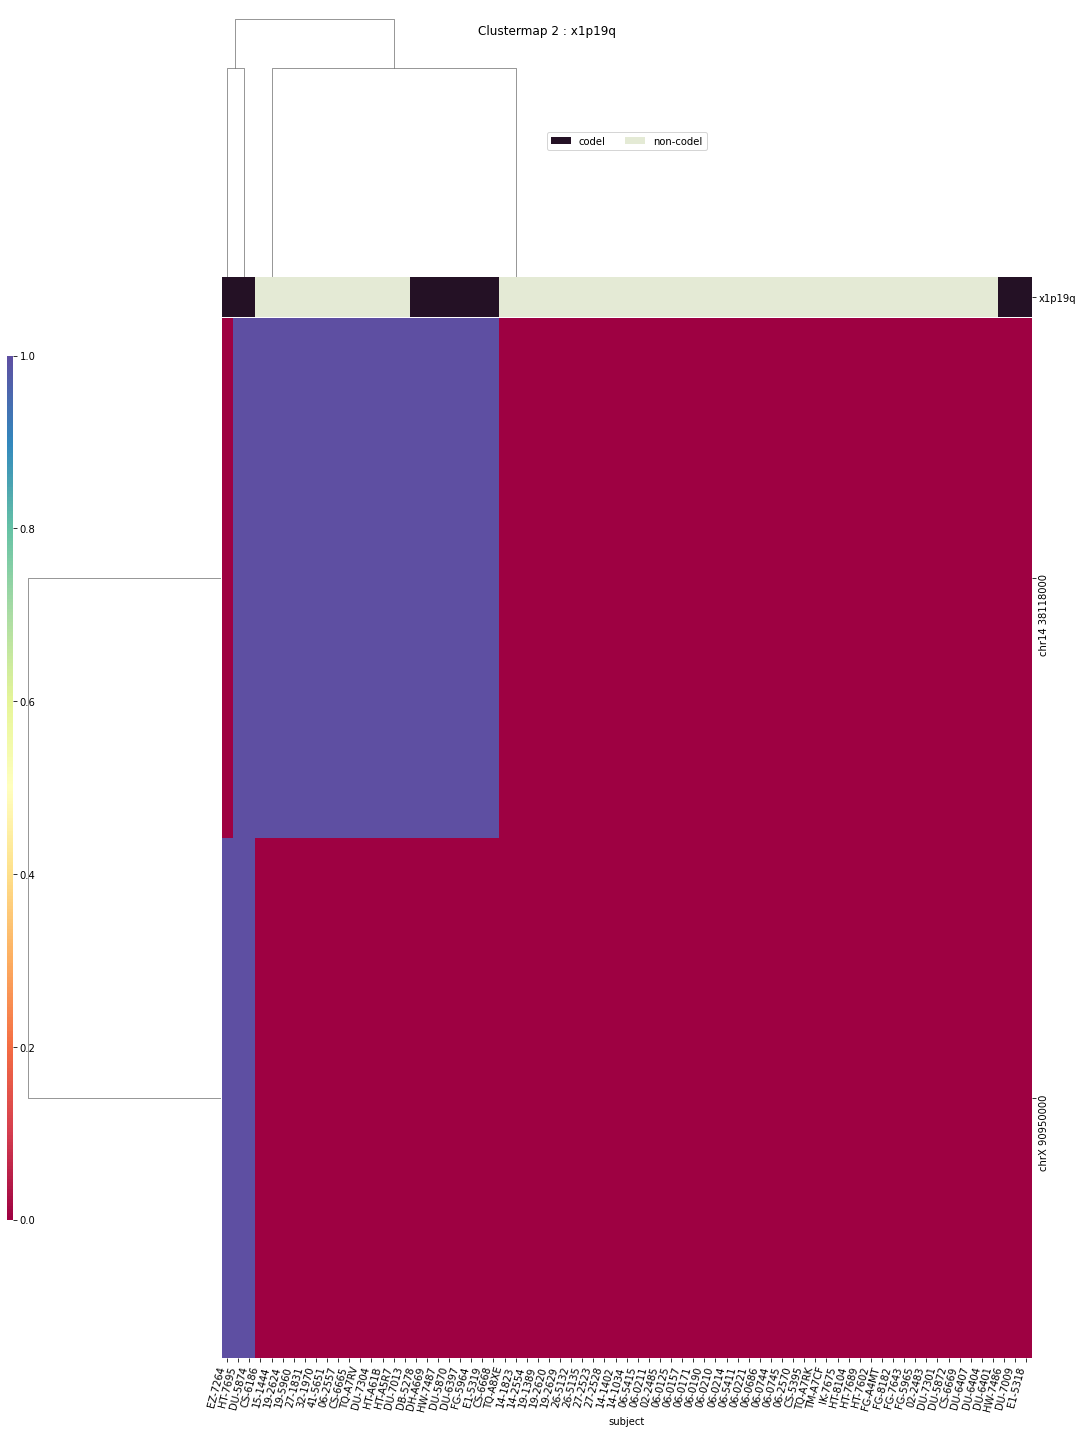

TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'subject']
Not enough data to produce cluster maps
disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 156179000' 'chr11 67604000' 'chr14 64979000' 'chr2 32276000'
 'chr20 35263000' 'chr5 150454000' 'chr8 143288000' 'chr8 42796000'
 'chr9 31632000' 'chrUn_GL000219v1 176000' 'disease_type' 'subject']


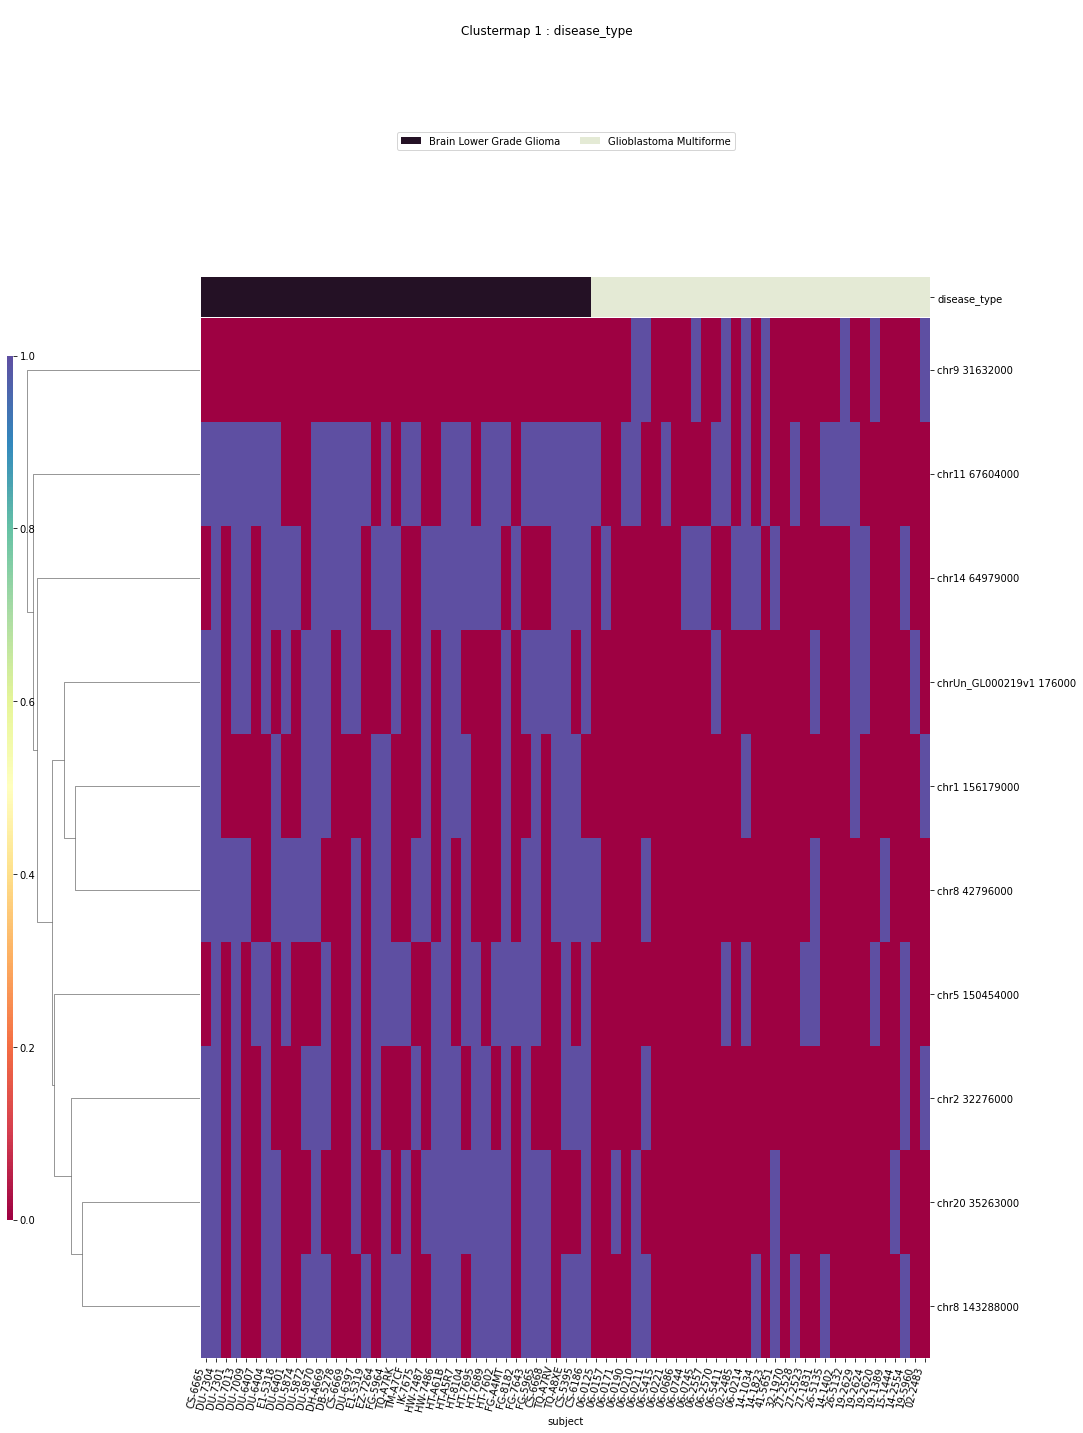

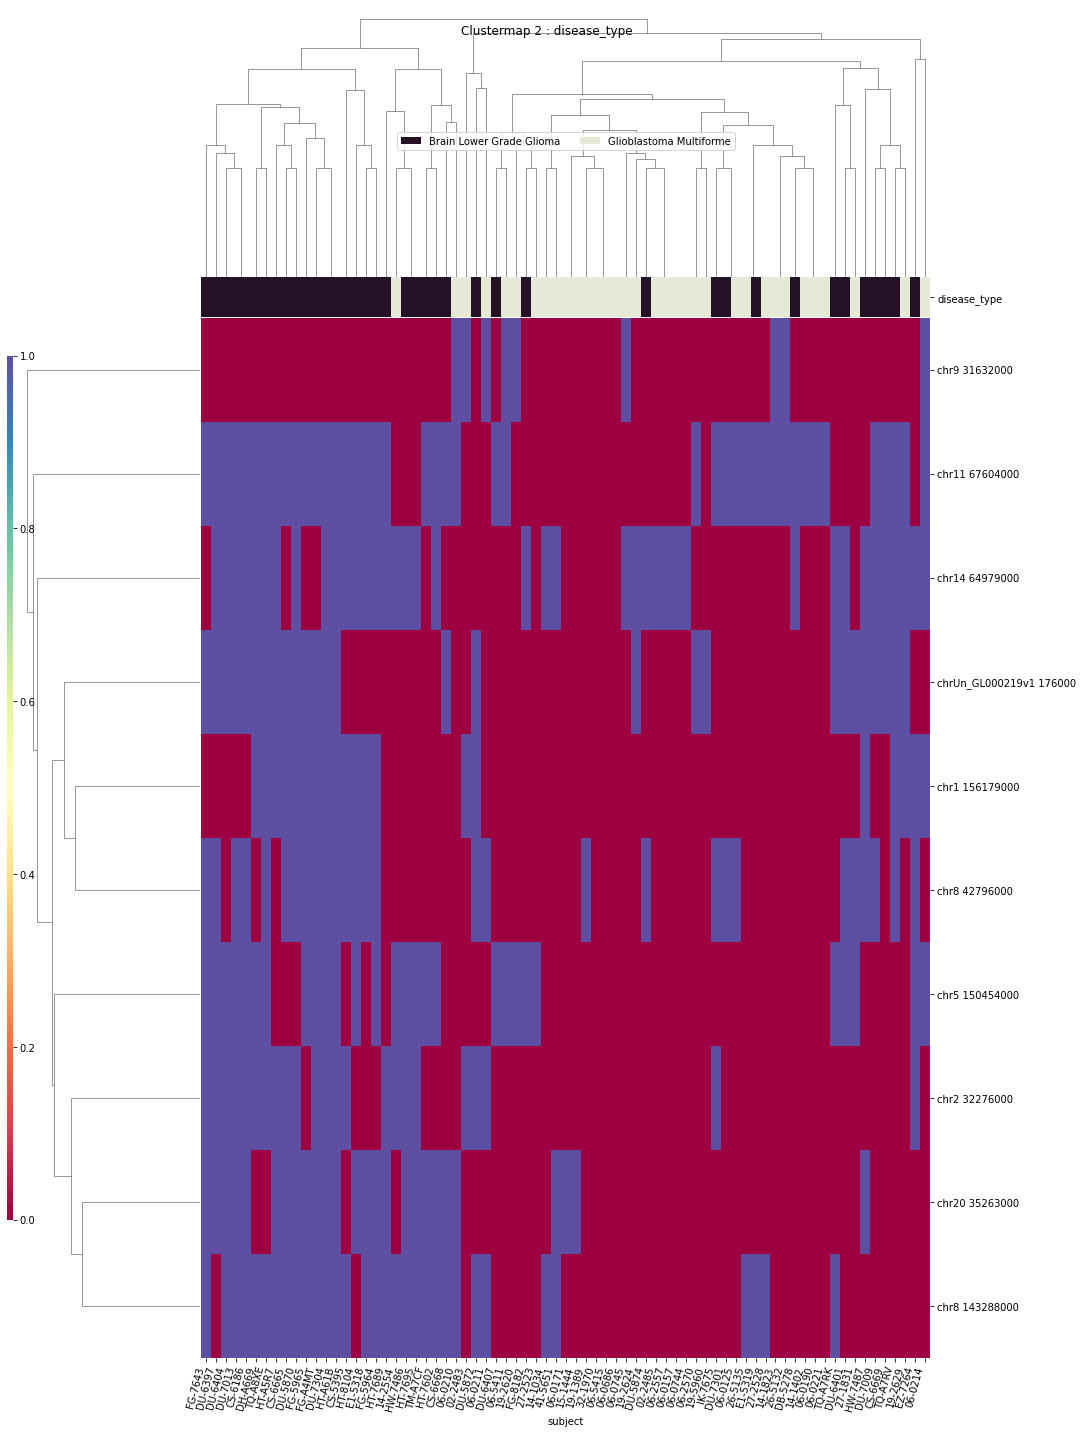

IDH_1p19q_status
T-Testing
Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 156179000' 'chr17 54201000' 'chr7 158236000'
 'subject']


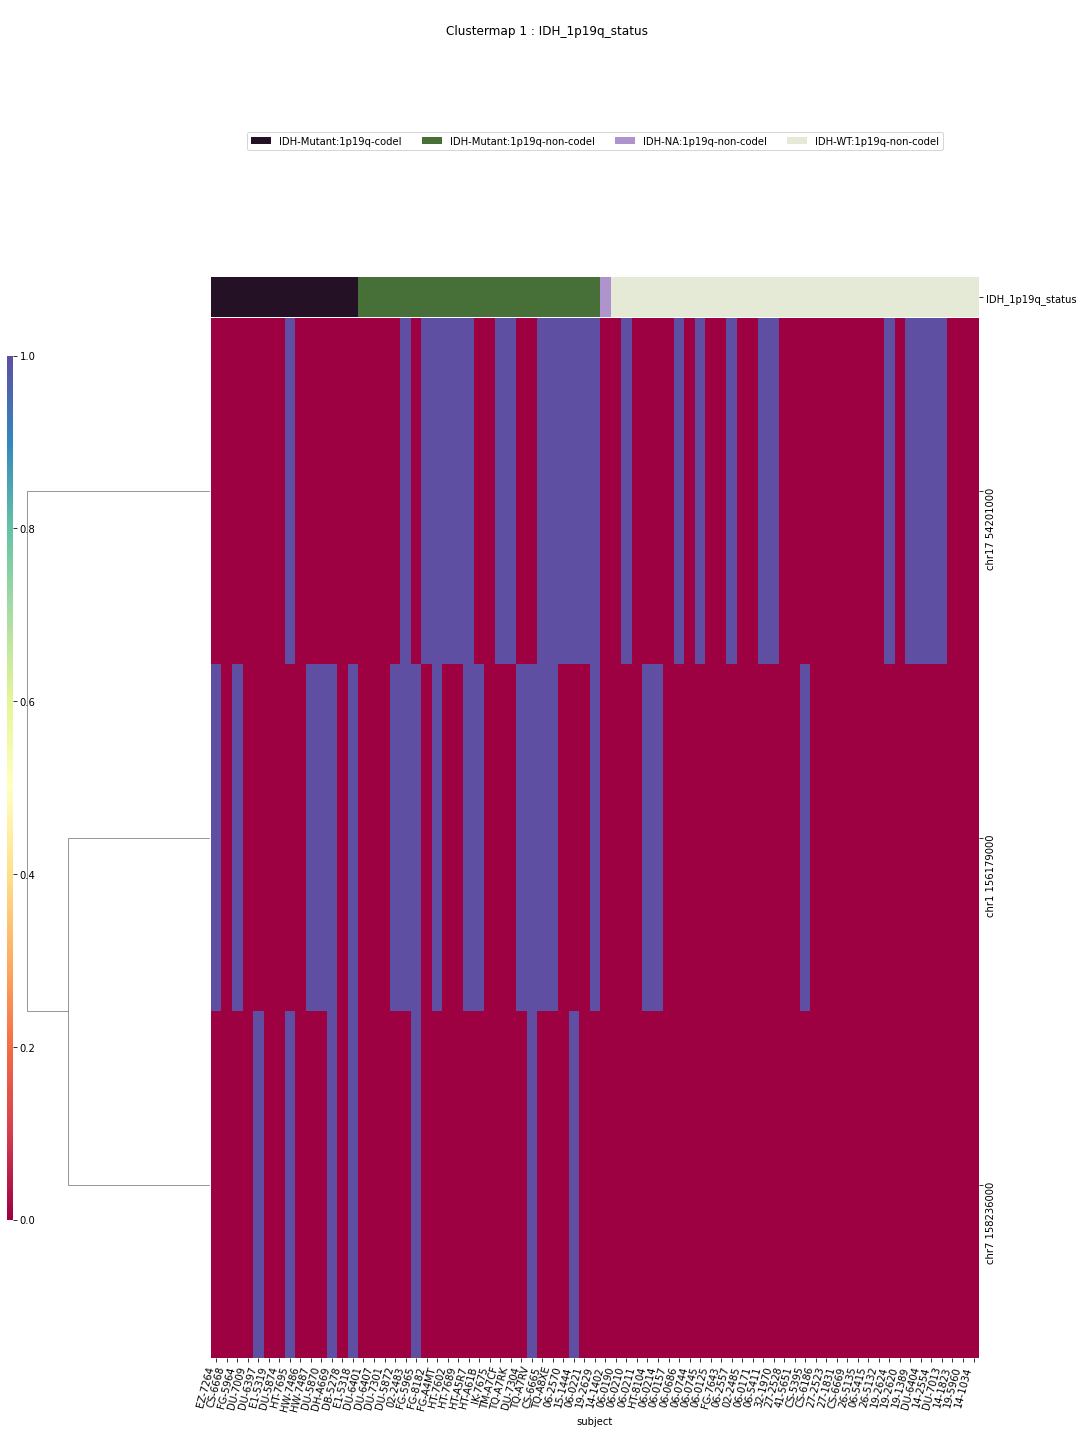

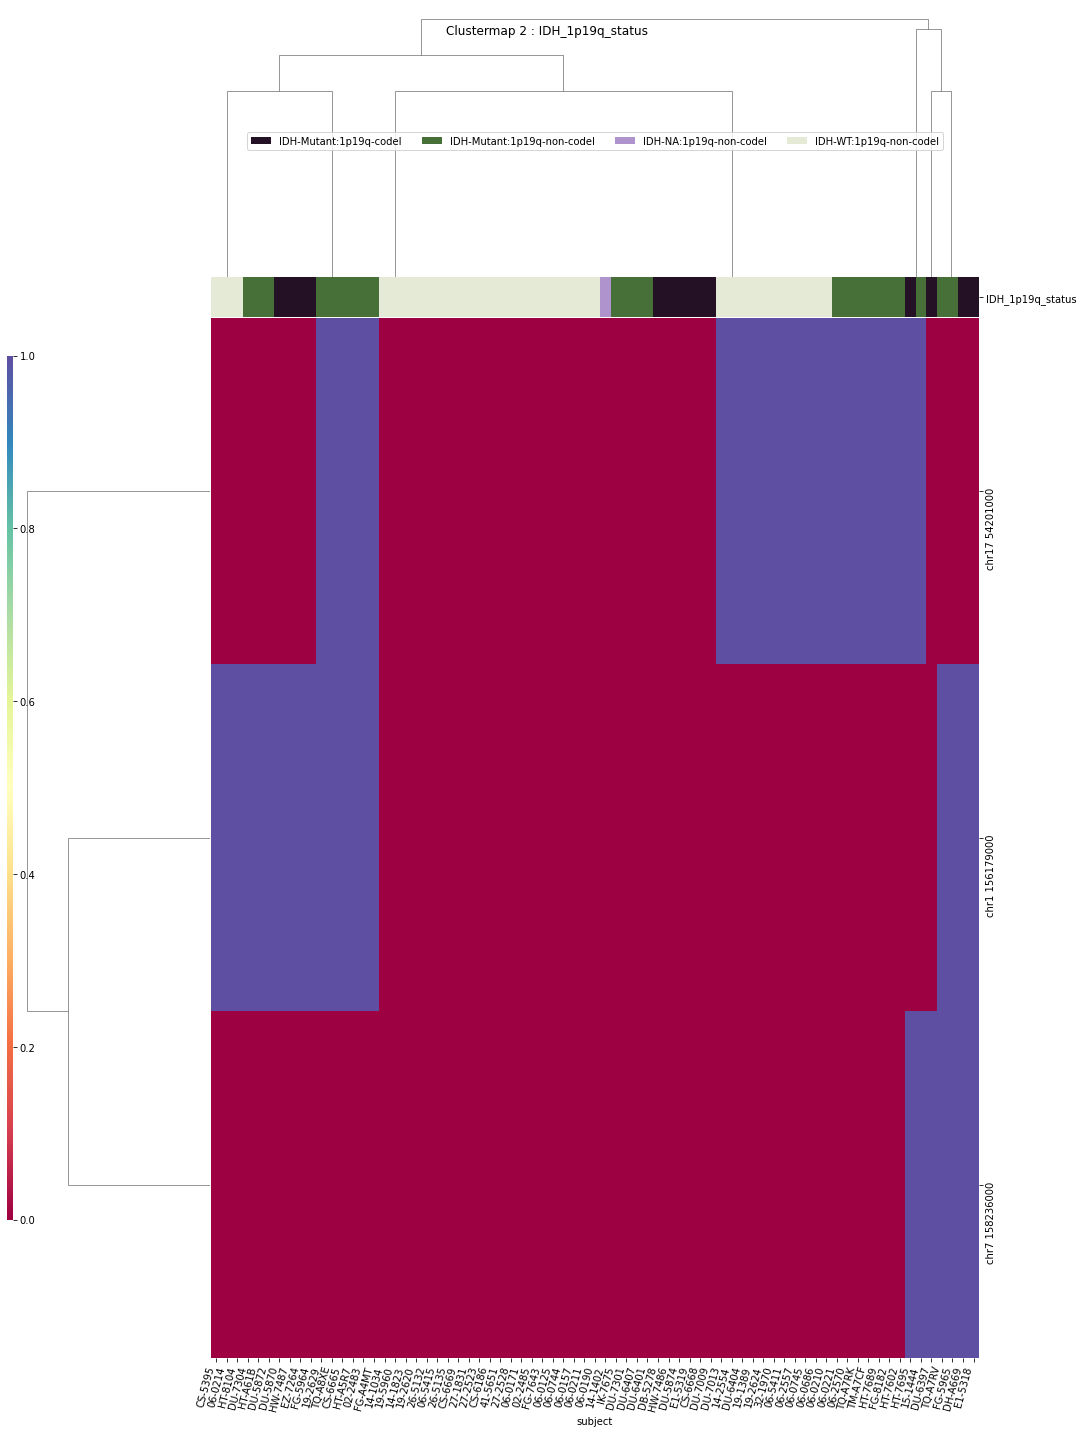

WHO_groups
T-Testing
Boxplotting
Clustermapping
['WHO_groups' 'chr1 104135000' 'chr1 1410000' 'chr1 144451000'
 'chr1 147240000' 'chr1 156179000' 'chr1 224339000' 'chr1 246082000'
 'chr1 99836000' 'chr10 41713000' 'chr10 43337000' 'chr10 6165000'
 'chr11 118721000' 'chr11 55431000' 'chr11 60714000' 'chr11 62195000'
 'chr11 62859000' 'chr12 123492000' 'chr12 56401000' 'chr12 58336000'
 'chr12 73009000' 'chr13 95268000' 'chr14 20268000' 'chr14 22725000'
 'chr14 38118000' 'chr14 77662000' 'chr15 101860000' 'chr15 65227000'
 'chr16 23599000' 'chr16 35204000' 'chr16 35955000' 'chr17 17610000'
 'chr17 54201000' 'chr18 31811000' 'chr18 68106000' 'chr18 69043000'
 'chr19 20157000' 'chr19 21568000' 'chr19 22283000' 'chr19 23724000'
 'chr19 28130000' 'chr19 28131000' 'chr19 29364000' 'chr19 36799000'
 'chr19 37320000' 'chr19 387000' 'chr19 39479000' 'chr19 48889000'
 'chr19 51958000' 'chr19 51960000' 'chr19 52044000' 'chr19 52698000'
 'chr19 52742000' 'chr19 52873000' 'chr19 54951000' 'chr2 1052

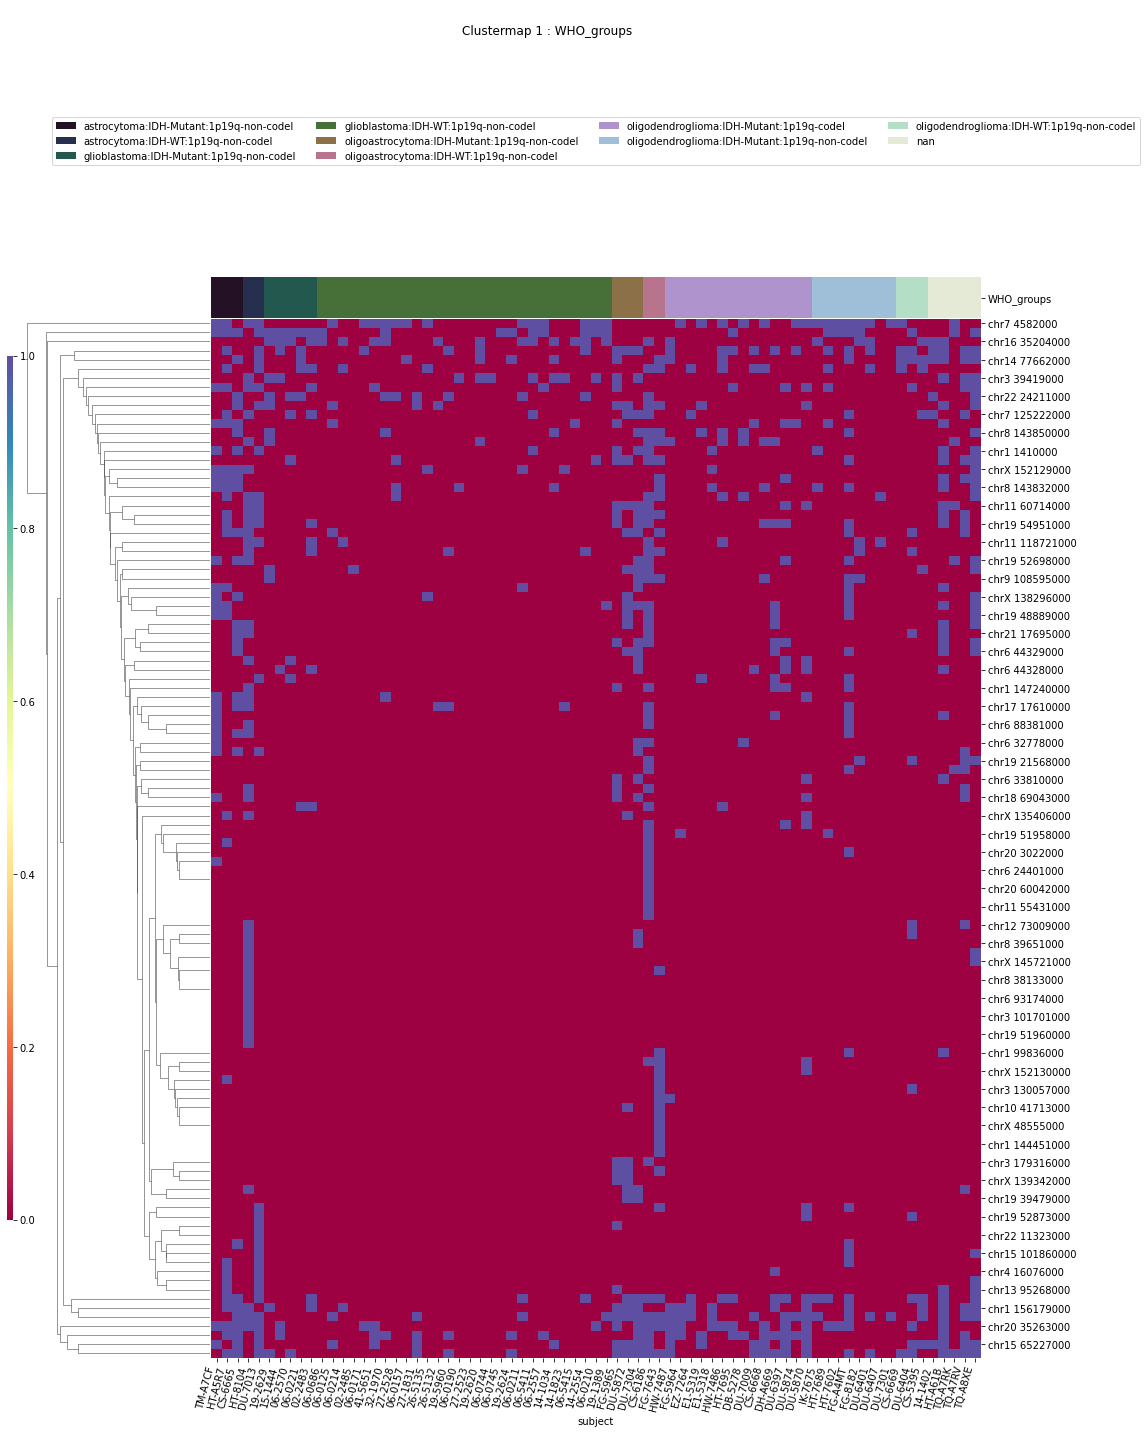

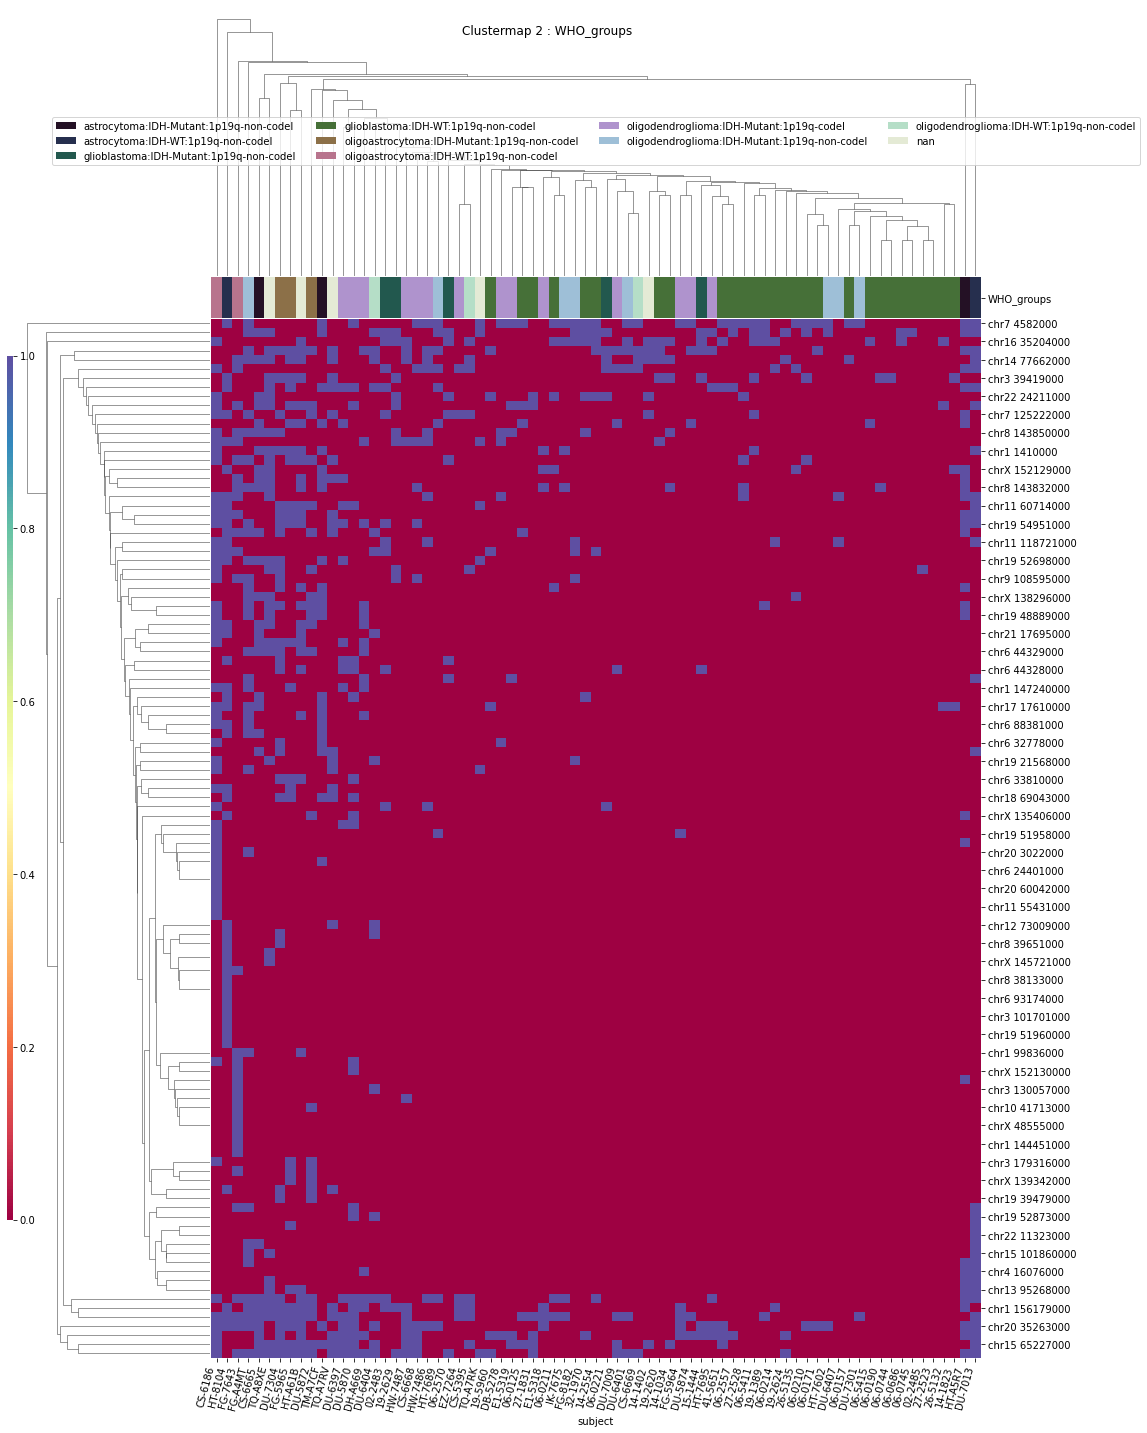

Triple_group
T-Testing
Boxplotting
Clustermapping
['Triple_group' 'chr1 156179000' 'chr1 73129000' 'chr10 97416000'
 'chr12 10572000' 'chr12 123581000' 'chr12 32099000' 'chr14 20084000'
 'chr18 31810000' 'chr19 51905000' 'chr19 52873000' 'chr20 18495000'
 'chr3 130057000' 'chr3 5081000' 'chr5 122913000' 'chr5 4925000'
 'chr7 158236000' 'chr9 137117000' 'subject']


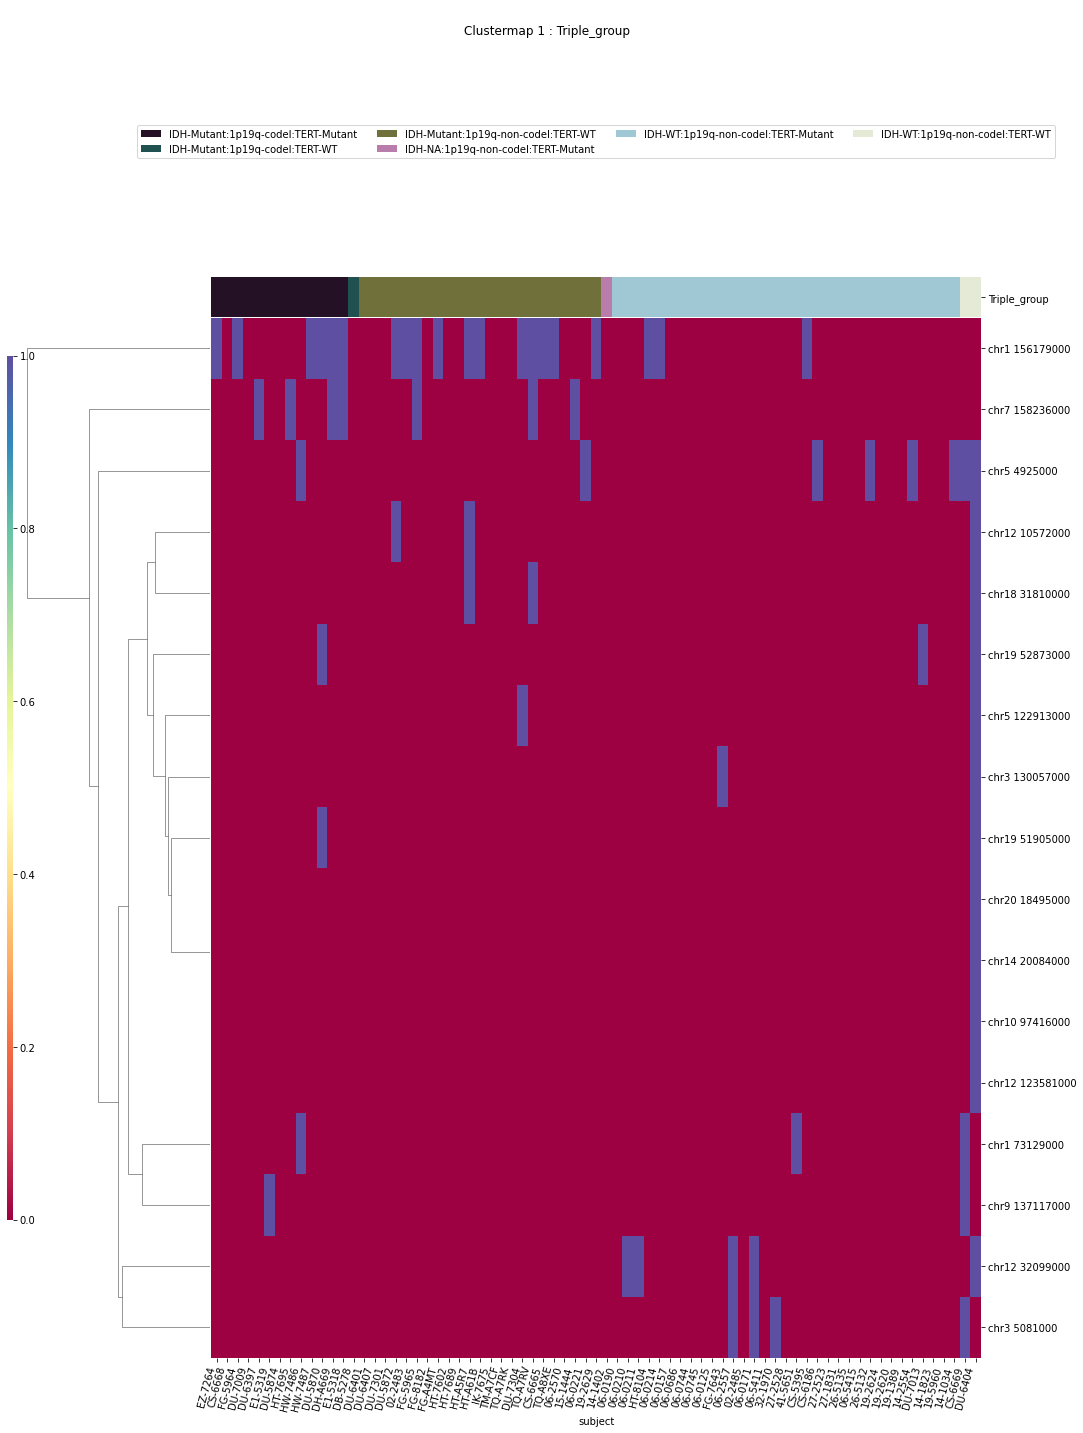

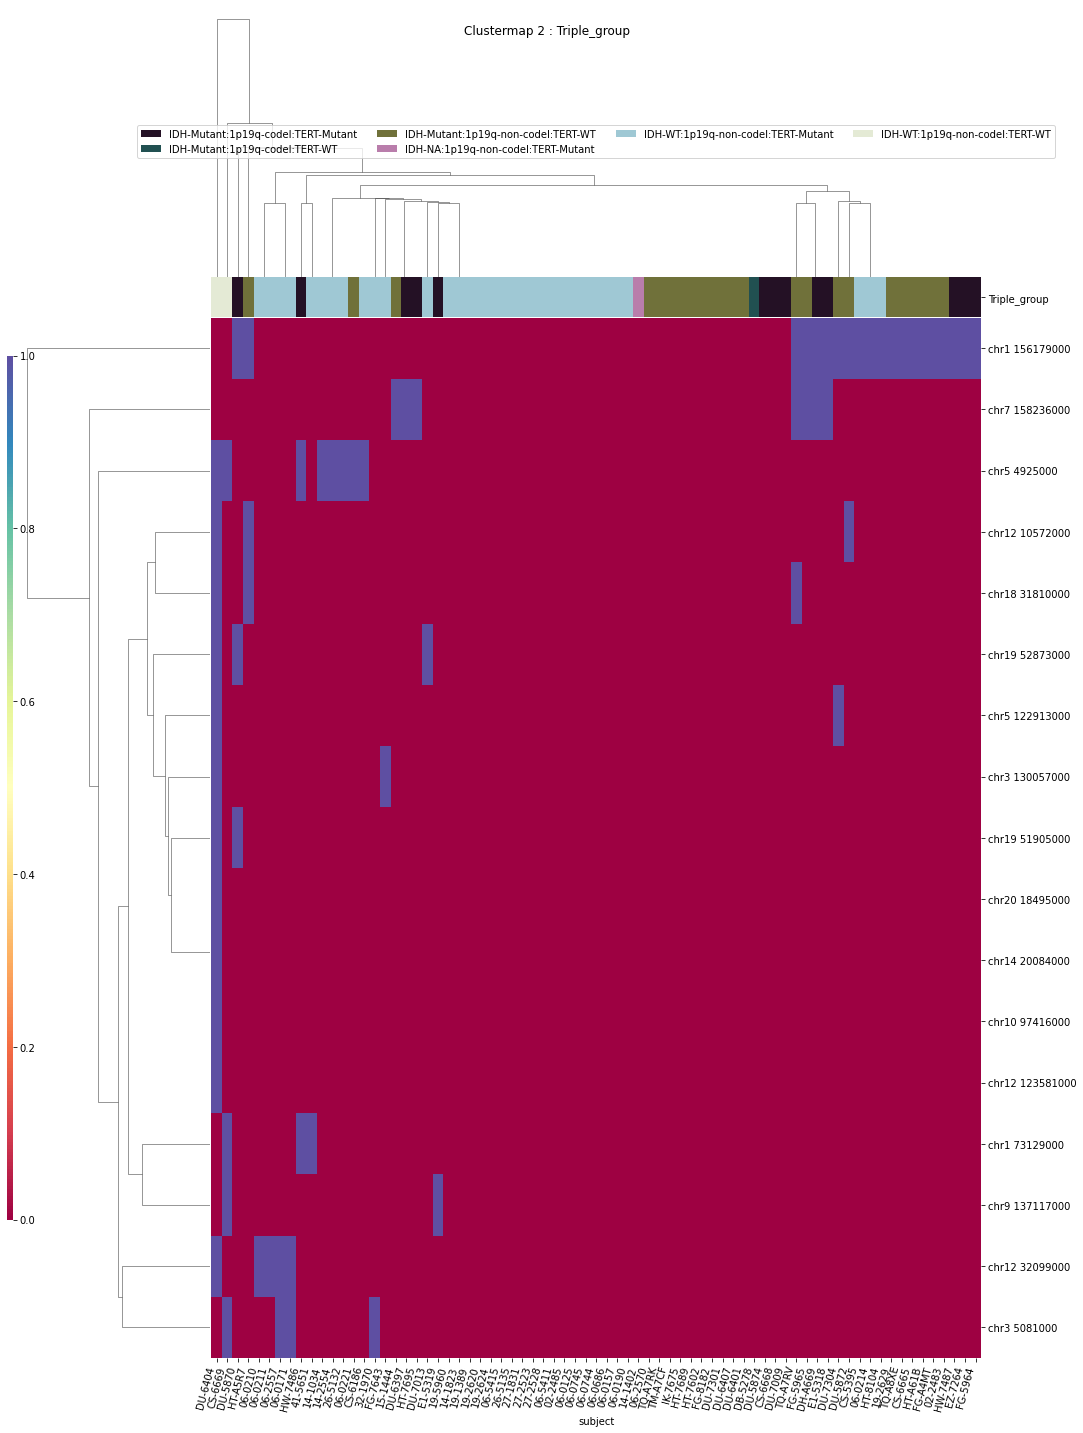

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'chr3 47259000' 'subject']
Not enough data to produce cluster maps
gender1
T-Testing
Boxplotting
Clustermapping
['chrX 125780000' 'chrX 17115000' 'gender1' 'subject']


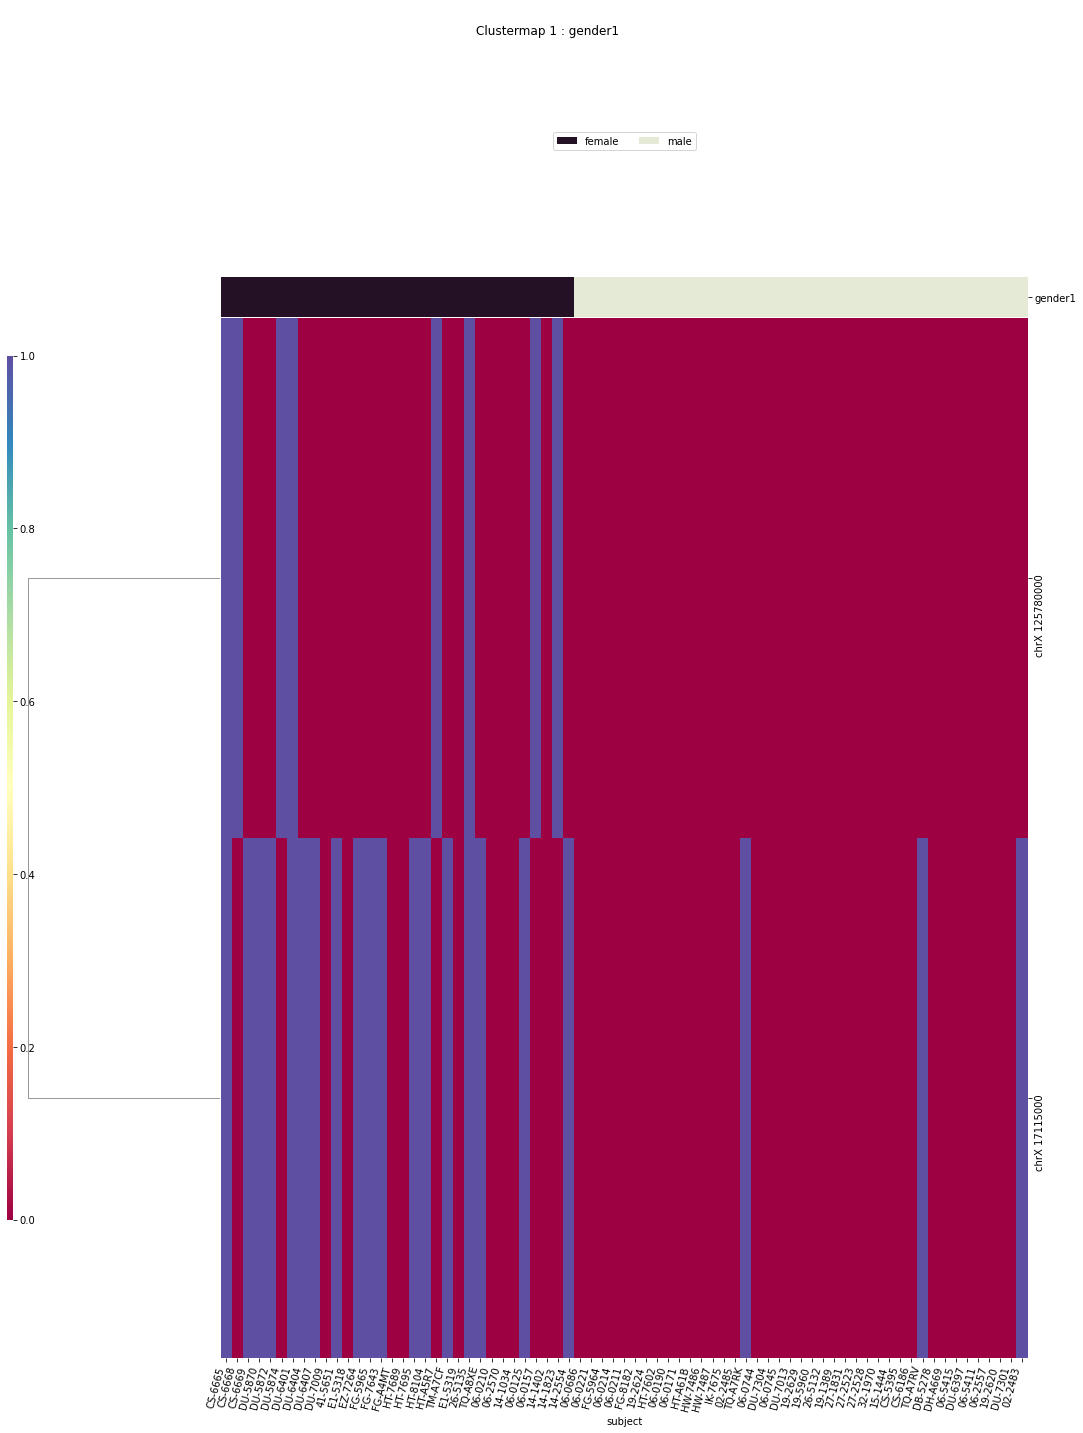

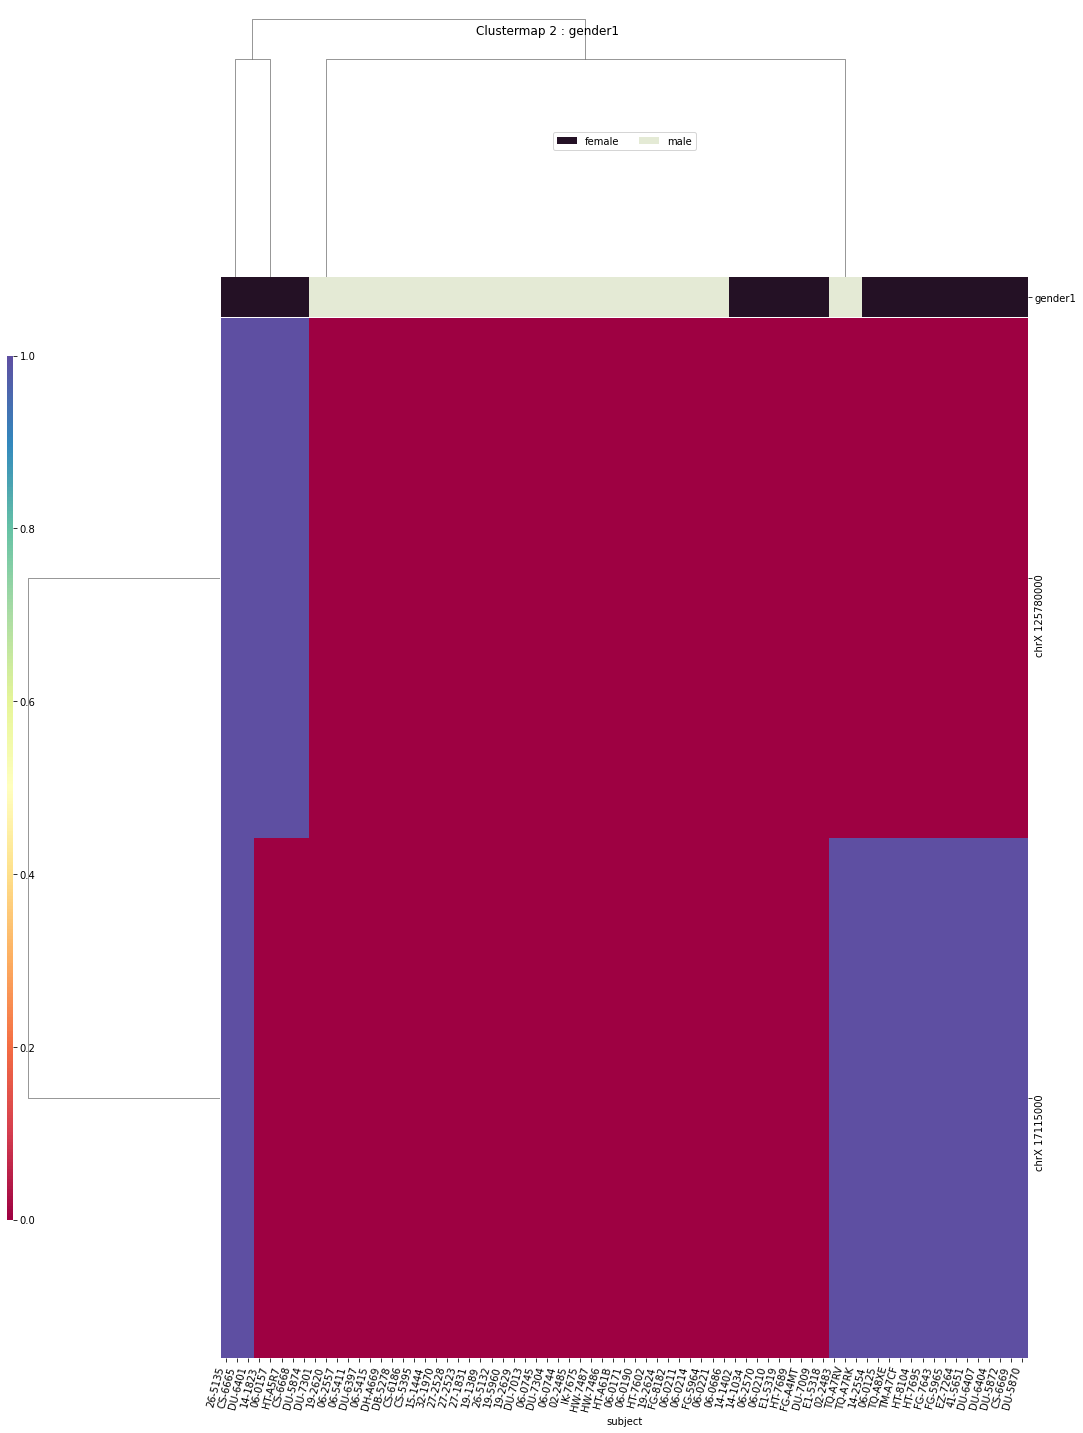

In [121]:
for column in ['race','ethnicity','primary_diagnosis','IDH','x1p19q','TERT','disease_type',
               'IDH_1p19q_status','WHO_groups','Triple_group','MGMT','gender1']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)

In [122]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210526 09:01:01'

In [123]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [124]:
pd.set_option('display.max_columns', default_max_columns)

In [125]:
pd.set_option('display.max_rows',default_max_rows)

In [126]:
pd.set_option('display.precision', default_precision)